# **Project Description**
<!DOCTYPE html>
<html lang="id">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        .container {
            display: flex;
            justify-content: center; /* Membuat gambar rata tengah */
            gap: 50px; /* Jarak antar gambar */
        }
        .container img {
            width: 400px; /* Ukuran gambar disamakan */
            height: auto; /* Menjaga proporsi gambar */
        }
    </style>
</head>
<body>

<div class="container">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjX98UjVYvXDrRnw0caxlGyzVgHSW9JYJ_Vw&s">
    <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjvnMeBV7QG7wIrSSIQ-ijcs9qF4Pby9QCGePJxenQsdOca8YP5OYfAWOHumLBTWsxDUuqKLKo43Ch6vJMNnDXtjRANIMVYhTYBspzGujFjzjBY1-3NQMHDb_t-b-y9CrFKu-p3hqpQMIpAKUJgBzGBL-_8M4cSXGrYPZA856iiq3CU25OvNhWGKe2o/s320/GKL11_BTPN%20Syariah%20-%20Koleksilogo.com.jpg">
</div>

</body>
</html>

## **This Final Project is part of the Project-Based Internship by Rakamin Academy x BTPN Syariah Banking Company**

- **Project Background**
  - The bank’s management has observed an increasing number of customers discontinuing their credit card services, which has raised significant concerns.
  - Customer attrition not only impacts the bank's revenue but also affects its reputation and market position.
  - This trend has become a pressing issue that requires immediate attention to mitigate the negative impact on the business.
  - The manager is particularly concerned about the lack of insights into why customers are leaving and how to prevent this trend.
  - Understanding the factors driving customer churn is critical to developing effective strategies to enhance customer satisfaction and retention.
<br>
<br>

- **Project Objective**
  - The primary goal of this project is to analyze customer data and identify profiles of clients who are likely to discontinue their credit card services
  - By leveraging data-driven insights, the bank aims to proactively address the root causes of customer dissatisfaction.
  - **The objective** is to equip the management team with actionable information, enabling them to reach out to at-risk customers, offer personalized solutions, and improve overall service quality.
  - This initiative seeks to minimize customer churn and foster long-term customer loyalty, ultimately contributing to the bank’s sustained growth and competitive advantage.

# **Step 1: Data Preparation**

## **1.1 Connect Google Colaboratory to Google Drive**

In [1]:
# Mount Google Colab to access dataset in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.2 Import Library**

In [2]:
!pip install catboost

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif #Feature Selection Option 1
from sklearn.feature_selection import SelectKBest, chi2 # Feature Selection Option 2

# Import Model Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **1.3 Load and Inspect Dataset**

In [4]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/data_master_customer.csv', delimiter=';')
total_trans_amt = df[df['status']=='Existing Customer'].Total_Trans_Amt.sum()
# Display dataset form
print('Dataset Description: ')
print('- This Dataset has %d rows dan %d columns.' % df.shape)
print(f'- This Dataset has {df.duplicated().sum()} duplicate data rows')
print(f'- Total Transfer Amount: ${total_trans_amt}')
print(' ')
# Show top 5 rows of the dataset
df.head()

Dataset Description: 
- This Dataset has 10127 rows dan 23 columns.
- This Dataset has 0 duplicate data rows
- Total Transfer Amount: $39564575
 


,CLIENTNUM,idstatus,status,Customer_Age,Gender,Dependent_count,Educationid,Education_Level,Maritalid,Marital_Status,...,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,1,Existing Customer,45,Male,3,1,High School,1,Married,...,39,5,1,3,12691,777,11914,1144,42,0.061
1,818770008,1,Existing Customer,49,Female,5,2,Graduate,2,Single,...,44,6,1,2,8256,864,7392,1291,33,0.105
2,713982108,1,Existing Customer,51,Male,3,2,Graduate,1,Married,...,36,4,1,0,3418,0,3418,1887,20,0.000
3,769911858,1,Existing Customer,40,Female,4,1,High School,3,Unknown,...,34,3,4,1,3313,2517,796,1171,20,0.760
4,709106358,1,Existing Customer,40,Male,3,3,Uneducated,1,Married,...,21,5,1,0,4716,0,4716,816,28,0.000


**Dataset Description**
- **CLIENTNUM**: Unique identification number for each customer.
- **idstatus**: The status ID of the customer, possibly referring to a specific status (e.g. active and inactive).
- **Status**: The status of the customer (e.g. Existing Customer and Attrited Customer).
- **Customer_Age** : The age of the customer.
- **Gender**: The gender of the customer (e.g Male and Female).
- **Dependent_count** : The number of dependents of the customer (The number of family members who are dependents).
- **Educationid**: The customer's education level ID, which can refer to a specific education category.
- **Education_Level**: The customer's education level (e.g. High School, Undergraduate, Graduate, etc).
- **Maritalid**: The customer's marital status ID, usually indicating the marital status (e.g. Married, Single, etc).
- **Marital_Status**: The marital status of the customer (e.g Married, Single, etc).
- **Income_Category**: The income category of the customer divided by income range .
- **card_categoryid**: The customer's card category ID, which indicates the type of card they have (e.g., credit card, debit card).
- **Card_Category**: The type of card owned by the customer (e.g., Blue, Silver, Gold and Platinum).
- **Months_on_book**: The length of time (in months) the customer has been registered or a customer (e.g., duration since joining).
- **Total_Relationship_Count**: The number of customer relationships with the company, which can refer to the number of products or services owned.
- **Months_Inactive_12_mon**: Number of months in the last 12 months
- **Contacts_Count_12_mon**: Number of contacts with the bank in the last 12 months.
- **Credit_Limit**: The credit limit given to the customer.
- **Total_Revolving_Bal**: The total unpaid balance on the credit card.
- **Avg_Open_To_Buy**: The average limit available for use on the credit card.
- **Total_Trans_Amt**: The total amount of money the customer transferred.
- **Total_Trans_Ct**: The total number of transactions made by the customer.
- **Avg_Utilization_Ratio**: Utilization Ratio in banking companies refers to a metric that calculates how much of the total available credit is actually used by a customer at a given time. It is an important measure that helps banks in evaluating the way credit is utilized by their customers. In general, this ratio is calculated as the percentage of credit used compared to the total credit approved.

In [5]:
# Inspect the Dataset
print('Dataset Information: ')
print(' ')
df.info()

Dataset Information: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  int64  
 2   status                    10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Educationid               10127 non-null  int64  
 7   Education_Level           10127 non-null  object 
 8   Maritalid                 10127 non-null  int64  
 9   Marital_Status            10127 non-null  object 
 10  Income_Category           10127 non-null  object 
 11  card_categoryid           10127 non-null  int64  
 12  Card_Category             10127 non-null  object 
 13  Months_on_book            10127 non-n

In [6]:
# Number of Unique Data Values in Each Column in the Dataset
unique_counts_df = df.nunique().reset_index()
unique_counts_df.columns = ['Column', 'Unique Count']
unique_counts_df

,Column,Unique Count
0,CLIENTNUM,10127
1,idstatus,2
2,status,2
3,Customer_Age,45
4,Gender,2
5,Dependent_count,6
6,Educationid,7
7,Education_Level,7
8,Maritalid,4
9,Marital_Status,4


**Conclusion: This Dataset doesn't have duplicate values**

In [7]:
# Number of Null Data Values in Each Column in the Dataset (This Step to Ensure that the Data actually does not have null value)
null_df = df.isna().sum().reset_index()
null_df.columns = ['Column', 'Null Values']
null_df

,Column,Null Values
0,CLIENTNUM,0
1,idstatus,0
2,status,0
3,Customer_Age,0
4,Gender,0
5,Dependent_count,0
6,Educationid,0
7,Education_Level,0
8,Maritalid,0
9,Marital_Status,0


**Conclusion: This Dataset doesn't have null (empty) values**

# **Step 2: Exploratory Data Analysis (EDA)**

## **1.1 Distribution of Customer Status**

In [8]:
cust_status = df.groupby(by = ['idstatus','status']).agg(cnt_client=('CLIENTNUM','count')).reset_index()
cust_status

,idstatus,status,cnt_client
0,1,Existing Customer,8500
1,2,Attrited Customer,1627


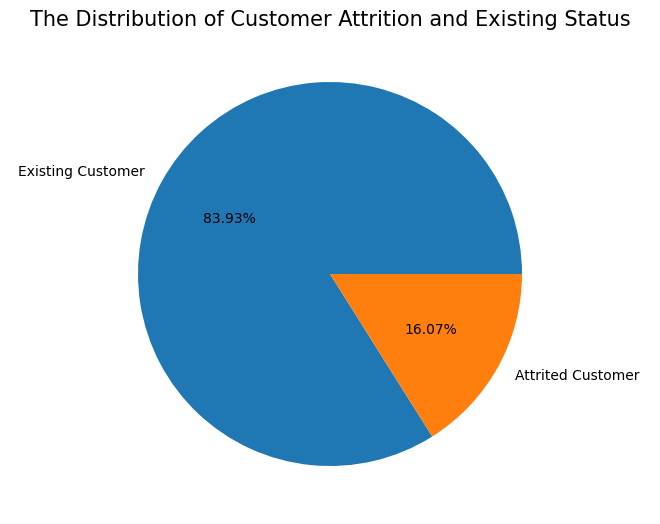

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Existing Customer','Attrited Customer']
churn = df.status.value_counts()
ax.pie(churn, labels=labels, autopct= '%.2f%%')
plt.title(label = 'The Distribution of Customer Attrition and Existing Status',
          size = 15,
          color = 'black')
plt.show()

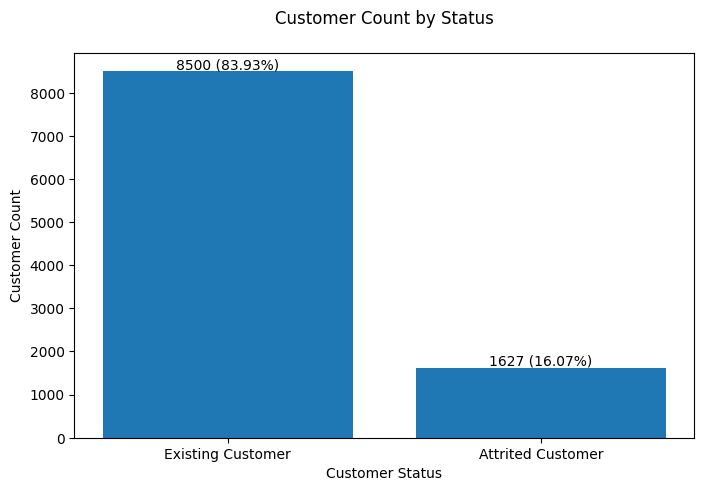

In [10]:
# Calculate percentages
total_customers = sum(cust_status['cnt_client'])
percentages = [cnt / total_customers * 100 for cnt in cust_status['cnt_client']]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(cust_status['status'], cust_status['cnt_client'])

# Annotate each bar with the number and percentage
for bar, count, percentage in zip(bars, cust_status['cnt_client'], percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{count} ({percentage:.2f}%)', ha='center')

plt.xlabel('Customer Status')
plt.ylabel('Customer Count')
plt.title('Customer Count by Status\n')
plt.show()

**Customer Status Distribution Conclusion:**

- **Customer Attrition** (Also Known as **Customer Churn**) is defined as the loss of customers by a business for whatever reason. As customers will not remain active indefinitely, customer attrition is a key indicator of business health over time.

- Based on the data above, **1627 customers are in the the "Attrited Customer" category** and **8500 customers are in the "Existing Customer" category**. Therefore, **16.07% of customers loss for whatever reason**.

## **1.2 Detail Exploration of Customer Status**

Distribution of Customer Status by:
*   Gender
*   Marital Status
*   Education Level
*   Income Type
*   Card Category

### **1.2.1 Customer Status Distribution by Gender, Marital Status, Education Level, Income Type and Card Category**

##### **Customer Status Exploration**

<Axes: title={'center': 'Clients Status By Income Type'}, xlabel='Income_Category', ylabel='count'>

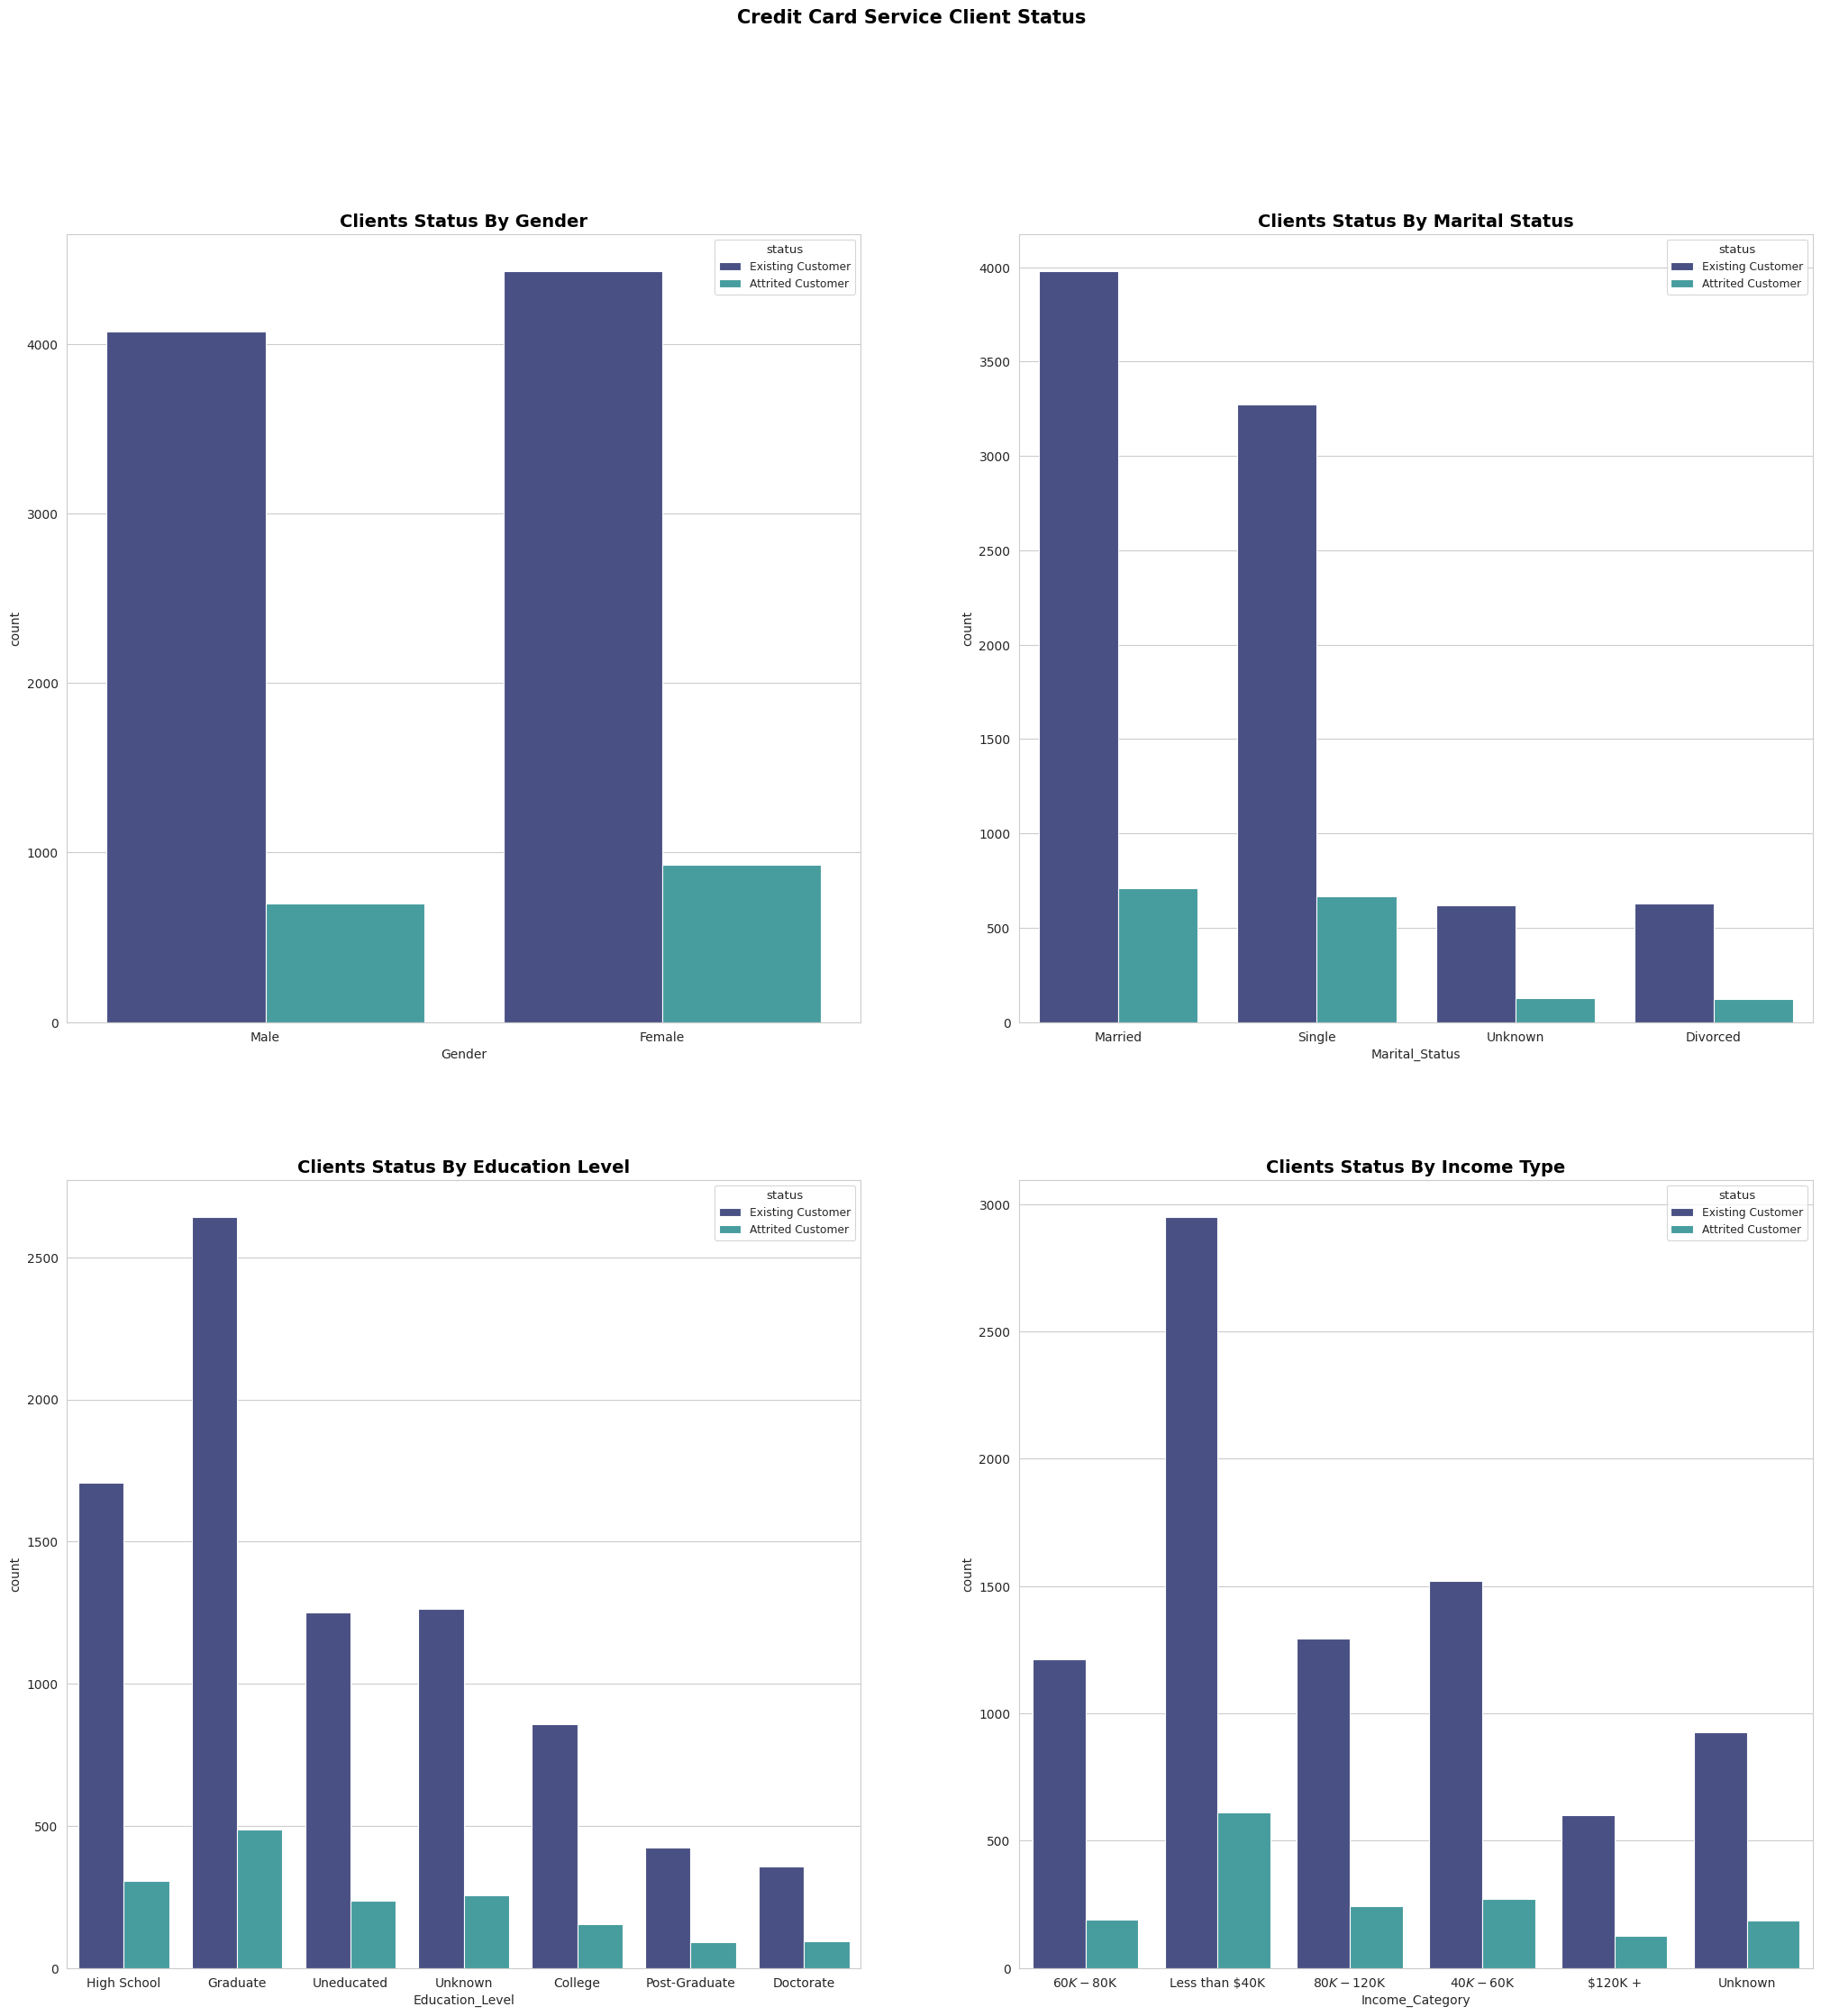

In [11]:
# Data Visualization of Customer Status
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2 , figsize=(25,25))
sns.set_context('paper', font_scale=1)

#Give Title
fig.suptitle('Credit Card Service Client Status',color = 'black', fontweight= 'bold',fontsize = 15)

ax[0][0].set_title('Clients Status By Gender', fontweight='bold', fontsize=14, color='black')
sns.countplot(x='Gender', data = df, hue = 'status', palette = 'mako', ax=ax[0][0])

ax[0][1].set_title('Clients Status By Marital Status', fontweight='bold', fontsize=14, color='black')
sns.countplot(x='Marital_Status', data = df, hue = 'status', palette = 'mako', ax=ax[0][1])

ax[1][0].set_title('Clients Status By Education Level', fontweight='bold', fontsize=14, color='black')
sns.countplot(x='Education_Level', data = df, hue = 'status', palette = 'mako', ax=ax[1][0])

ax[1][1].set_title('Clients Status By Income Type', fontweight='bold', fontsize=14, color='black')
sns.countplot(x='Income_Category', data = df, hue = 'status', palette = 'mako', ax=ax[1][1])

Text(0.5, 0, '\nCard Category')

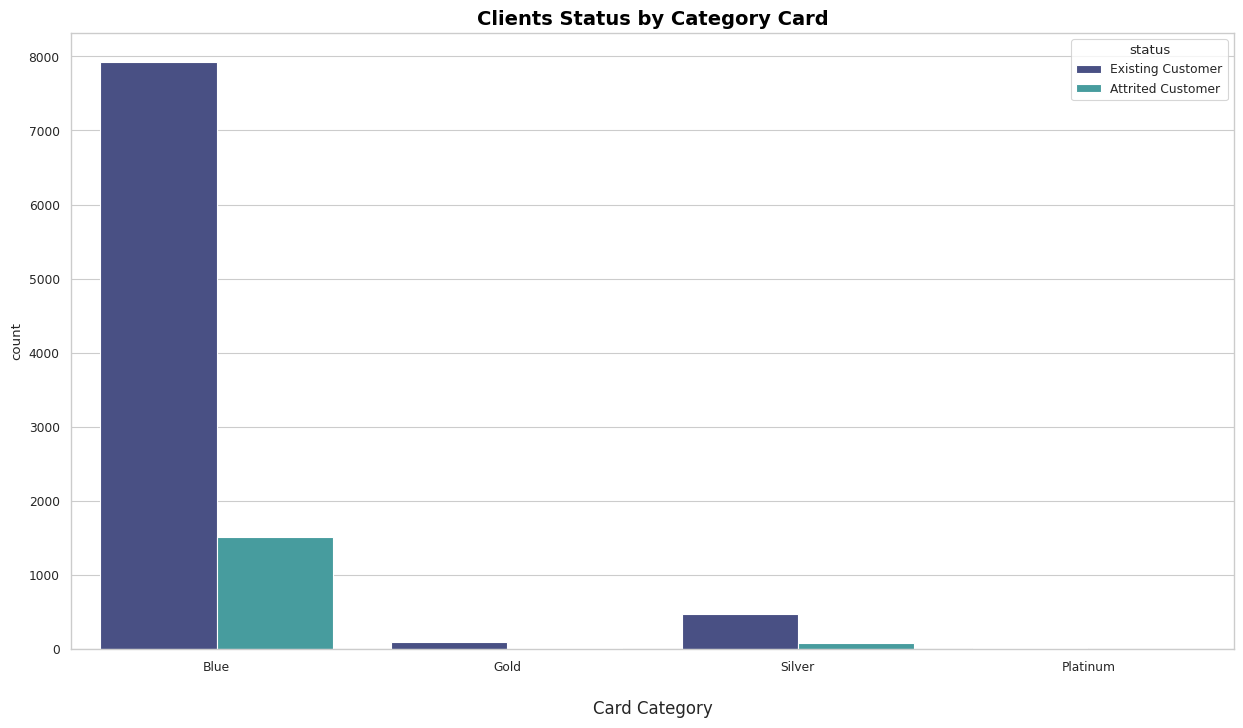

In [12]:
#Data Visualization of Customer Status
plt.figure(figsize=(15,8))
fig = sns.countplot(x='Card_Category', data = df, hue = 'status', palette = 'mako')
plt.title('Clients Status by Category Card', fontweight='bold', fontsize=14, color='black')
plt.xlabel('\nCard Category', fontsize=12)

In [13]:
# Client Status by Gender
df_gender = df.groupby(by=['Gender', 'status']).agg(cnt_client=('CLIENTNUM', 'count')).reset_index()

# Pivot the 'status' to become columns
df_gender_pivot = df_gender.pivot(index='Gender', columns='status', values='cnt_client')

# Calculate percentage for each gender and status
df_gender_pivot_percentage = df_gender_pivot.div(df_gender_pivot.sum(axis=1), axis=0) * 100

# Combine counts and percentages into one dataframe
df_gender_combined = df_gender_pivot.join(df_gender_pivot_percentage, rsuffix='_percentage')

# Style the dataframe with a background gradient
df_gender_combined.style.background_gradient(cmap='BuGn')

status,Attrited Customer,Existing Customer,Attrited Customer_percentage,Existing Customer_percentage
Gender,,,,
Female,930,4428,17.357223,82.642777
Male,697,4072,14.615223,85.384777


In [14]:
# Client Status by Marital Status
df_marital = df.groupby(by=['Marital_Status','status']).agg(cnt_client=('CLIENTNUM','count')).sort_values(by=['Marital_Status','status'],ascending=True).reset_index()

# Pivot the 'status' to become columns
df_marital_pivot = df_marital.pivot(index='Marital_Status', columns='status', values='cnt_client')

# Calculate percentage for each marital and status
df_marital_percentage = df_marital_pivot.div(df_marital_pivot.sum(axis=1), axis=0) * 100

# # Combine counts and percentages into one dataframe
df_marital_combined = df_marital_pivot.join(df_marital_percentage, rsuffix='_percentage')

# Style the dataframe with a background gradient
df_marital_combined.style.background_gradient(cmap='BuGn')

status,Attrited Customer,Existing Customer,Attrited Customer_percentage,Existing Customer_percentage
Marital_Status,,,,
Divorced,121,627,16.176471,83.823529
Married,709,3978,15.126947,84.873053
Single,668,3275,16.941415,83.058585
Unknown,129,620,17.222964,82.777036


In [15]:
# Client Status by Education Level
df_education = df.groupby(by=['Education_Level','status']).agg(cnt_client=('CLIENTNUM','count')).sort_values(by=['Education_Level','status'],ascending=True).reset_index()

# Pivot 'status' to become columns
df_education_pivot = df_education.pivot(index='Education_Level', columns='status', values='cnt_client')

# Calculate percentage for each education and status
df_education_percentage = df_education_pivot.div(df_education_pivot.sum(axis=1), axis=0) * 100

# Combine counts and percentages into one dataframe
df_education_combined = df_education_pivot.join(df_education_percentage, rsuffix='_percentage')

df_education_combined.style.background_gradient(cmap='BuGn')

status,Attrited Customer,Existing Customer,Attrited Customer_percentage,Existing Customer_percentage
Education_Level,,,,
College,154,859,15.202369,84.797631
Doctorate,95,356,21.064302,78.935698
Graduate,487,2641,15.569054,84.430946
High School,306,1707,15.201192,84.798808
Post-Graduate,92,424,17.829457,82.170543
Uneducated,237,1250,15.938130,84.061870
Unknown,256,1263,16.853193,83.146807


In [16]:
# Client Status by Income Category (Type)
df_income = df.groupby(by=['Income_Category','status']).agg(cnt_client=('CLIENTNUM','count')).sort_values(by=['Income_Category','status'],ascending=True).reset_index()

# Pivot 'status' to become columns
df_income_pivot = df_income.pivot(index='Income_Category', columns='status', values='cnt_client')

# Calculate percentage for each education and status
df_income_percentage = df_income_pivot.div(df_income_pivot.sum(axis=1), axis=0) * 100

# Combine counts and percentages into one dataframe
df_income_combined = df_income_pivot.join(df_income_percentage, rsuffix='_percentage')

df_income_combined.style.background_gradient(cmap='BuGn')

status,Attrited Customer,Existing Customer,Attrited Customer_percentage,Existing Customer_percentage
Income_Category,,,,
$120K +,126,601,17.331499,82.668501
$40K - $60K,271,1519,15.139665,84.860335
$60K - $80K,189,1213,13.480742,86.519258
$80K - $120K,242,1293,15.765472,84.234528
Less than $40K,612,2949,17.186184,82.813816
Unknown,187,925,16.816547,83.183453


In [17]:
#Client Status by Card Category
df_card = df.groupby(by=['Card_Category','status']).agg(cnt_client=('CLIENTNUM','count')).sort_values(by=['Card_Category','status'],ascending=True).reset_index()

# Pivot 'status' to become columns
df_card_pivot = df_card.pivot(index='Card_Category', columns='status', values='cnt_client')

# Calculate percentage for each card and status
df_card_percentage = df_card_pivot.div(df_card_pivot.sum(axis=1), axis=0) * 100

# Combine counts and percentages into one dataframe
df_card_combined = df_card_pivot.join(df_card_percentage, rsuffix='_percentage')

df_card_combined.style.background_gradient(cmap='BuGn')

status,Attrited Customer,Existing Customer,Attrited Customer_percentage,Existing Customer_percentage
Card_Category,,,,
Blue,1519,7917,16.097923,83.902077
Gold,21,95,18.103448,81.896552
Platinum,5,15,25.000000,75.000000
Silver,82,473,14.774775,85.225225


##### **Conclusion: Exploration Customer Status**

**Attrited Customers** are most likely to occur in customers with a background of :
- **Gender**: Attrited Customer is dominated by **Female** customers *(57.16% of the total Attrited Customer)*.
- **Education**: Attrited Customer is dominated by Customers with **Graduate** Education Level *(43.57% of the overall Total Attrited Customer)*.
- **Income**: Attrited Customers are dominated by Customers with Income Level **less than $40K** *(29.93% of the overall Total Attrited Customers)*.
- **Card**: Attrited Customers are dominated by Customers with **Blue** Card *(93.36% of the overall Total Attrited Customers)*

### **1.2.2 Bivariate Analysis**


In [18]:
# Function to calculate boxplot statistics values
def boxplot_values(group):
    # Calculate Q1, Q3, and IQR (Interquartile Range)
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower whisker and upper whisker
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Maximum and minimum values based on the whiskers (excluding outliers)
    max_value = group[group <= upper_whisker].max()  # Maximum value within the upper whisker limit
    min_value = group[group >= lower_whisker].min()  # Minimum value within the lower whisker limit

    # Return the calculated values as a pandas Series
    return pd.Series({'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower_Whisker': lower_whisker, 'Upper_Whisker': upper_whisker,
                      'Max_Value': max_value, 'Min_Value': min_value})

#### **A. Credit Limit vs Target**

##### **Credit Limit vs Target Interpretation**

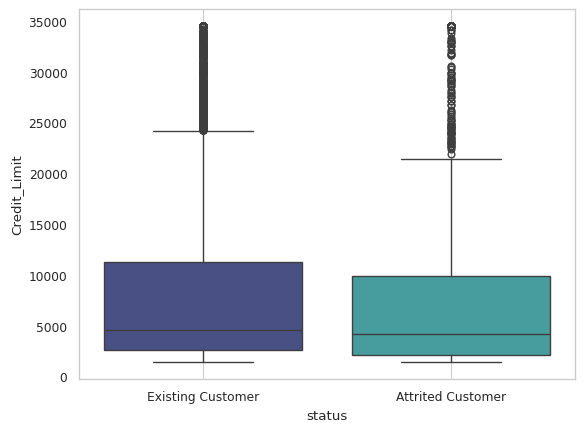

In [19]:
sns.boxplot(x='status', y='Credit_Limit', data=df, palette = 'mako')
plt.grid()
plt.show()

In [20]:
# Use groupby to separate by 'status' and apply the boxplot_values function to each group
cc_boxplot_stats = df.groupby('status')['Credit_Limit'].apply(boxplot_values)

# Display the results
round(cc_boxplot_stats, 2).T

status                          
Attrited Customer  Q1                2114.00
                   Q3                9933.50
                   IQR               7819.50
                   Lower_Whisker    -9615.25
                   Upper_Whisker    21662.75
                   Max_Value        21398.00
                   Min_Value         1438.00
Existing Customer  Q1                2602.00
                   Q3               11252.75
                   IQR               8650.75
                   Lower_Whisker   -10374.12
                   Upper_Whisker    24228.88
                   Max_Value        24221.00
                   Min_Value         1438.00
Name: Credit_Limit, dtype: float64

##### **Conclusion: Credit Limit vs Target**
- **Attrited Customer:**
  * 25% of Attrited Customer have Credit Limit more than $9,993.50
  
  * 75% of Attrited Customer have Credit Limit less than $9,993.50

  * Median of Attrited Customer Credit Limit: $7,819.50

- **Existing Customer:**
  * 25% of Existing Customer have Credit Limit more than $11,252.75
  
  * 75% of Existing Customer have Credit Limit less than $11,252.75

  * Median of Existing Customer Credit Limit: $8,650.75

#### **B. Inactive Month Since Last 12 Months vs Target**

##### **Inactive Month Since Last 12 Months vs Target Interpretation**

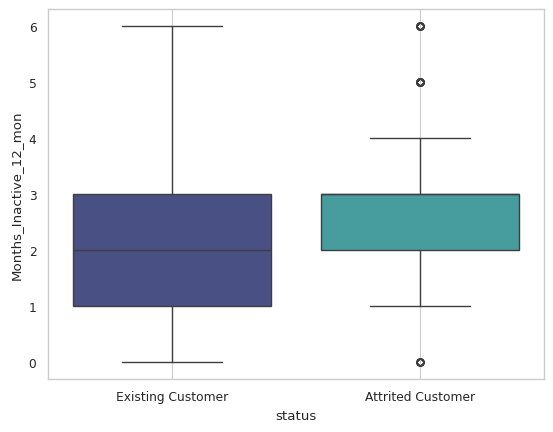

In [21]:
sns.boxplot(x='status', y='Months_Inactive_12_mon', data=df, palette = 'mako')
plt.grid()
plt.show()

In [22]:
# Use groupby to separate by 'status' and apply the boxplot_values function to each group
inactive_boxplot_stats = df.groupby('status')['Months_Inactive_12_mon'].apply(boxplot_values)

# Display the results
inactive_boxplot_stats.T

status                          
Attrited Customer  Q1               2.0
                   Q3               3.0
                   IQR              1.0
                   Lower_Whisker    0.5
                   Upper_Whisker    4.5
                   Max_Value        4.0
                   Min_Value        1.0
Existing Customer  Q1               1.0
                   Q3               3.0
                   IQR              2.0
                   Lower_Whisker   -2.0
                   Upper_Whisker    6.0
                   Max_Value        6.0
                   Min_Value        0.0
Name: Months_Inactive_12_mon, dtype: float64

##### **Conclusion: Inactive Month Since Last 12 Months vs Target**
- **Attrited Customer:**
  * 25% of Attrited Customer are inactive more than 3 months
  
  * 75% of Attrited Customer are inactive less than 3 months

  * Median of Attrited Customer Inactive : 1 Month

- **Existing Customer:**
  * 25% of Existing Customer are inactive more than 3 months
  
  * 75% of Existing Customer are inactive less than 3 months

  * Median of Attrited Customer Inactive : 2 Month

#### **C. Distribution of Customer Age**

##### **Distribution of Customer Age Interpretation**

In [23]:
attrited_age = df[df['status']=='Attrited Customer']['Customer_Age']
existing_age = df[df['status']=='Existing Customer']['Customer_Age']

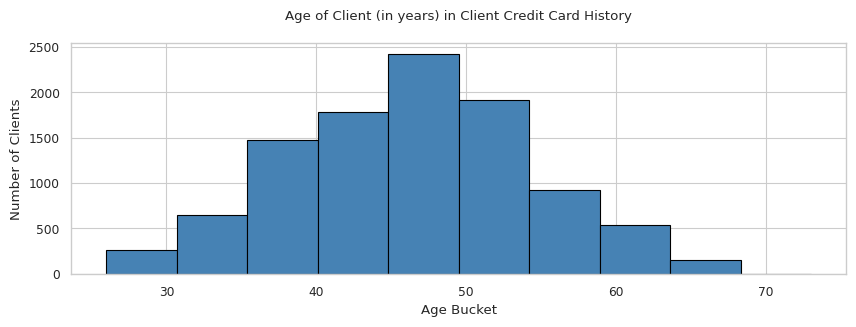

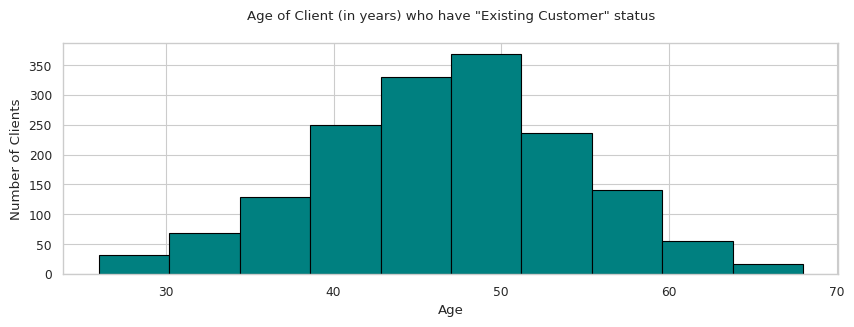

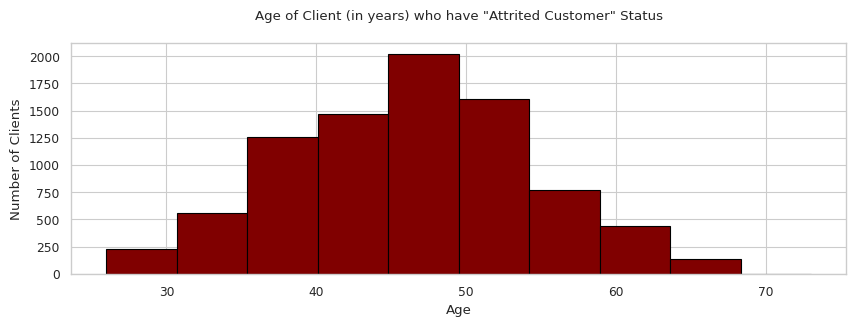

In [24]:
plt.figure(figsize=(10,3))
plt.hist(df['Customer_Age'], bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) in Client Credit Card History\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(attrited_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have "Existing Customer" status\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(existing_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have "Attrited Customer" Status\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

##### **Conclusion: Distribution of Client Age**

**Attrited Customer**'s Age dominated by 40 to 55 Years Old as sames as **Existing Customer** that dominated by 40 to 55 Years Old

### **1.2.3 Multivariate Analysis**

- **Income Type**, **Education Level**, and **Marital Status** provide deeper insights into financial behavior, spending priorities, and product or service usage. These three indicators are more able to describe broader consumption behavior and financial decisions compared to **Gender**, **Customer Age**, and **Card Type**.
- While other factors such as **Age** and **Gender** are still relevant, they do not provide as much depth and complete information as these three main factors, making them more important in consumer behavior analysis and market segmentation.

#### **A. Grouped By Education Level vs Marital Status**

##### **1. Education Level, Dependent Count, Marital Status, Card Category, Customer Status**

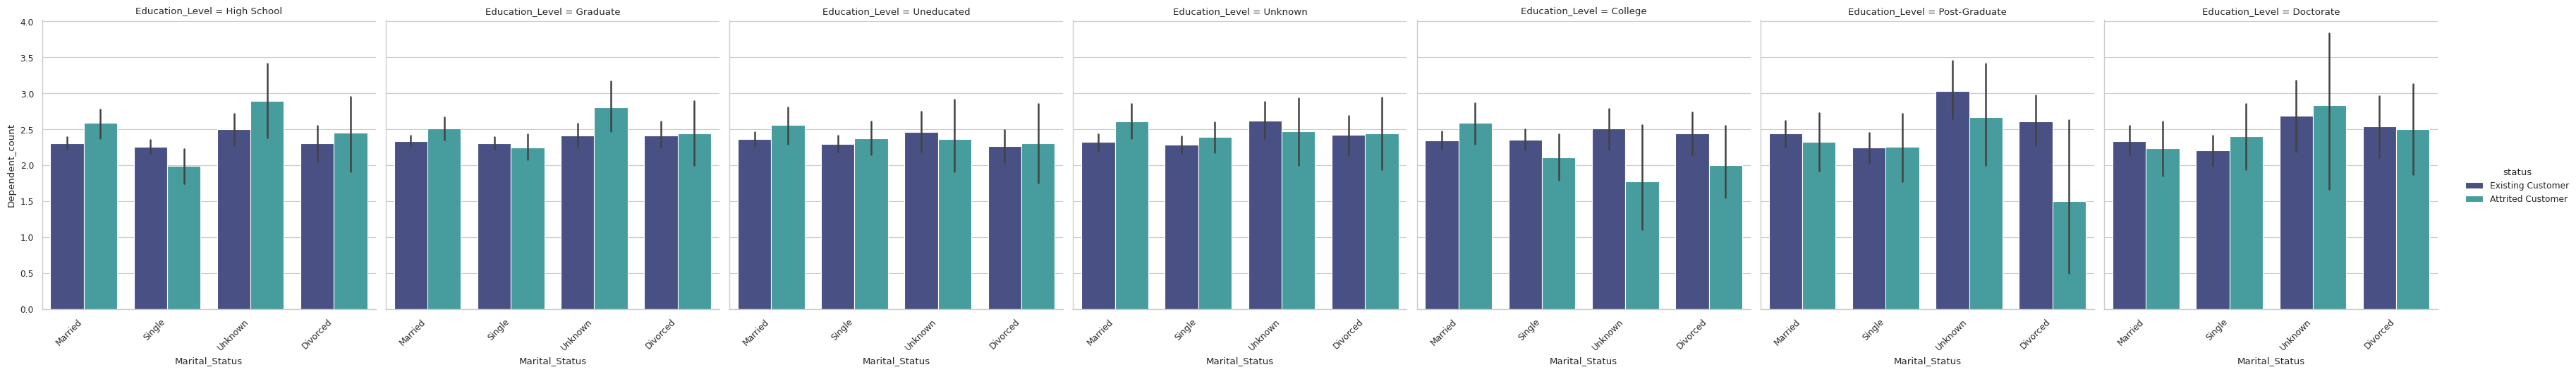

In [25]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Dependent_count',
            hue = 'status',
            col = 'Education_Level',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [26]:
df_edu1 = df.groupby(by=['Education_Level','Marital_Status','status']).agg(cnt_client=('Dependent_count','mean')).sort_values(by=['Education_Level','Marital_Status','status','cnt_client'],ascending=True).reset_index()

# Create Pivot 'status' to become columns
df_edu1_pivot = df_edu1.pivot(index=['Education_Level', 'Marital_Status'], columns='status', values='cnt_client')

df_edu1_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. At the College Education Level, Customers with Divorced status have a higher average number of dependents in the Existing Customer group (2.44) compared to Attrited Customers (2.00). In general, Attrited customers tend to have fewer dependents than Existing customers, especially in the Unknown status (1.78 for Attrited vs. 2.51 for Existing).

2. In Doctorate, Attrited customers have slightly more dependents than Existing customers in the Single category (2.40 for Attrited vs. 2.20 for Existing). However, the differences between Attrited and Existing customers in the Divorced and Married categories are nearly insignificant, with Existing customers slightly lower in the number of dependents in most categories.

3. At the Graduate education level, Attrited customers tend to have more dependents, especially in the Married status (2.51 for Attrited vs 2.33 for Existing). In the Unknown category, Attrited customers also have more dependents (2.81 vs 2.41).

4. At the High School education level, Attrited customers have more dependents compared to Existing customers in the Married category (2.58 for Attrited vs 2.31 for Existing). However, for the Single category, Existing customers have more dependents (2.26 for Existing vs 1.99 for Attrited).

5. At the Post-Graduate education level, Existing customers have more dependents in most categories, especially in Divorced (2.61 for Existing vs 1.50 for Attrited) and Unknown (3.03 for Existing vs 2.67 for Attrited) status.

6. Customers with Uneducated education level have relatively similar number of dependents between Attrited and Existing, although in Married category, Attrited customers are slightly more (2.56 vs 2.37). In Divorced and Single categories, the difference between Attrited and Existing is not too big.

7. At the Unknown education level, Attrited customers have slightly more dependents compared to Existing customers, especially in the Married category (2.61 for Attrited vs 2.32 for Existing).



**Conclusion:**

- Attrited vs. Existing Customers:

  - Attrited customers tend to have more dependents at some education levels, especially in the Married category (such as Graduate, High School, and Unknown). However, in some categories such as Divorced and Single, Existing customers tend to have more dependents.
  - At higher education levels such as Post-Graduate, Existing customers have a higher number of dependents compared to Attrited customers.

- Education Level and Marital Status:

  - Attrited customers with Married status tend to have more dependents compared to Existing customers at lower and middle education levels such as High School and Graduate.
  - At higher education levels such as Doctorate and Post-Graduate, Existing customers more often have more dependents than Attrited customers, especially in Divorced and Unknown statuses.

- Business Implications:

  - Strategies to increase retention of Attrited customers may need to consider the number of dependents, as this may affect their financial priorities. Customers with more dependents may be more likely to need offers that focus on managing family finances.
  - Tailoring promotions and products to customers’ needs based on marital and educational status can help personalize the approach and increase the chances of converting Attrited customers back to Existing.

- Final Conclusion: Customers with more dependents, especially those with Married status, may be more vulnerable to losing their status as Existing customers. Therefore, understanding the pattern of number of dependents based on education and marital status can help in designing offers that better suit customer needs.

##### **2. Education Level, Average Utilization Ratio, Marital Status, Customer Status**

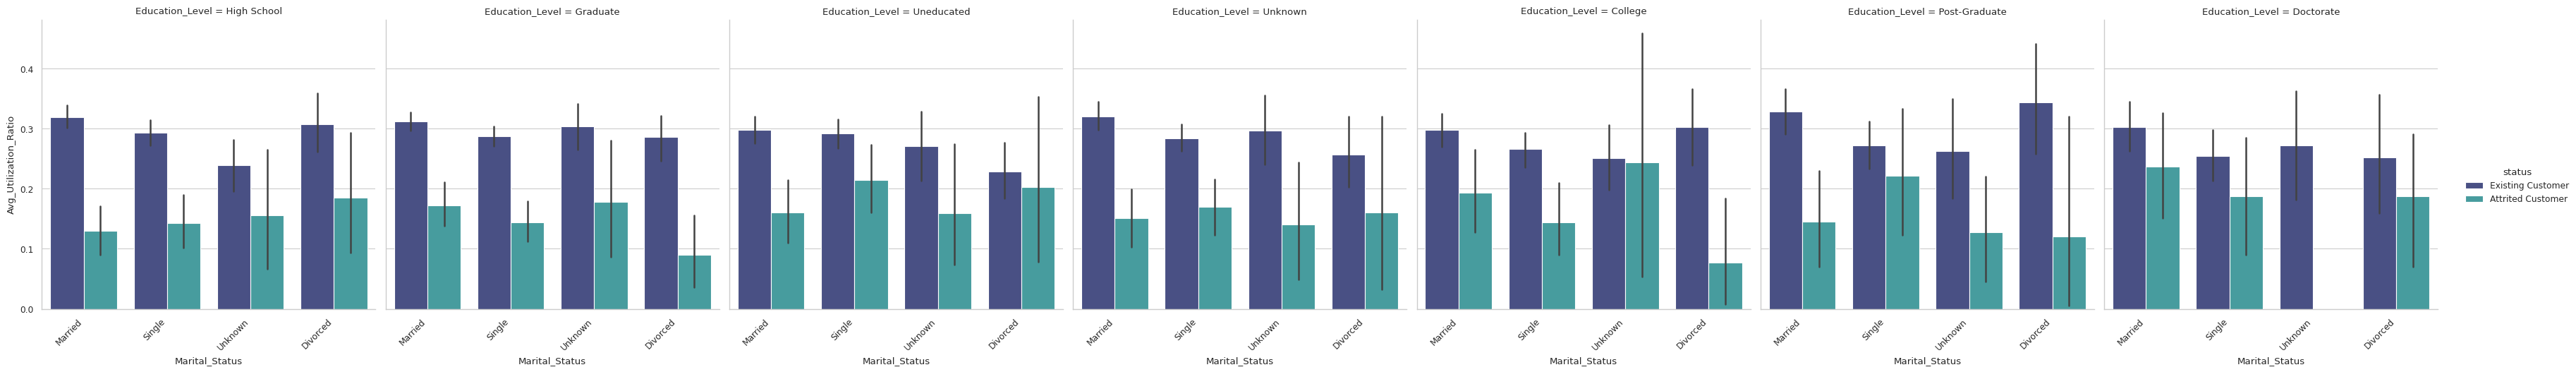

In [27]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Avg_Utilization_Ratio',
            hue = 'status',
            col = 'Education_Level',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [28]:
df_edu2 = df.groupby(by=['Education_Level','Marital_Status','status']).agg(avg_utilization_ratio=('Avg_Utilization_Ratio','mean')).sort_values(by=['Education_Level','Marital_Status','status','avg_utilization_ratio'],ascending=True).reset_index()

# Create Pivot 'status' to become Columns
df_edu2_pivot = df_edu2.pivot(index=['Education_Level', 'Marital_Status'], columns='status', values='avg_utilization_ratio')

df_edu2_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. Existing Customers with Divorced status from College education level have a significantly higher Utilization Ratio (0.3033) compared to Attrited customers (0.0766). This shows that Existing Customers with Divorced status are more likely to use their credit significantly more. In general, Existing Customers have a higher Utilization Ratio compared to Attrited Customers in almost all categories, especially in Divorced and Married status.

2. Existing customers with Doctorate education level have higher Utilization Ratio in all categories compared to Attrited customers, especially in Married category (0.3024 vs 0.2364). The biggest difference is in Unknown status which has no Utilization Ratio for Attrited customers. Existing customers with Doctorate education level who have Unknown status tend to have moderate Utilization Ratio (0.2717).

3. At the Graduate education level, Existing customers have a higher Utilization Ratio compared to Attended customers, especially in Married status (0.3122 vs 0.1727). This indicates that Existing customers are more likely to use their credit in full. Overall, Existing customers have a more significant credit usage pattern across categories.

4. Existing customers with High School education level showed higher Utilization Ratio in Married (0.3196 vs 0.1299) and Divorced (0.3073 vs 0.1855) status. In the Unknown category, Attrited customers tend to have a slightly higher Utilization Ratio compared to Existing.

5. Existing customers with Post-Graduate education level consistently show higher Utilization Ratio compared to Attrited customers, especially in the Divorced (0.3445 vs 0.1210) and Married (0.3289 vs 0.1447) categories. In the Single category, Attrited customers have a higher Utilization Ratio than Existing customers (0.2211 vs 0.2723), but overall, Existing customers tend to use more credit.

6. At the Uneducated education level, Existing customers with Married status have a higher Utilization Ratio (0.2983 vs 0.1603), and Attended customers have slightly more credit utilization at Divorced status (0.2034 vs 0.2292).

7. At the Unknown education level, Existing customers show higher credit usage compared to Attrited customers, especially in the Married (0.3209 vs 0.1505) and Divorced (0.2571 vs 0.1601) categories. However, in the Unknown category, Attrited and Existing customers have relatively balanced credit usage patterns (0.1406 vs 0.2972).

**Conclusion:**
- Existing vs. Attrited Customers: In general, Existing Customers show higher Utilization Ratios compared to Attrited Customers, especially across most marital status and education level categories.
Existing Customers with Married or Divorced statuses at almost all education levels tend to use their credit more than Attrited customers.

- Education Level: Customers with higher education levels such as Doctorate and Post-Graduate show a tendency to have higher Utilization Ratios, especially among Existing customers. Attrited customers at these education levels tend to use less credit.

- Marital Status: Married and Divorced are the marital statuses that show higher credit utilization, especially among Existing customers. Single and Unknown customers have lower Utilization Ratios.

- Business Implications:

  - Attrited Customers tend to use credit less than Existing customers. Therefore, strategies designed to increase retention of Attrited customers may need to include incentives to increase their credit utilization.

  - Customers with higher levels of education tend to use more credit, which could be a target for larger or more flexible credit offers.

##### **3. Education Level, Credit Limit, Marital Status, Customer Status**

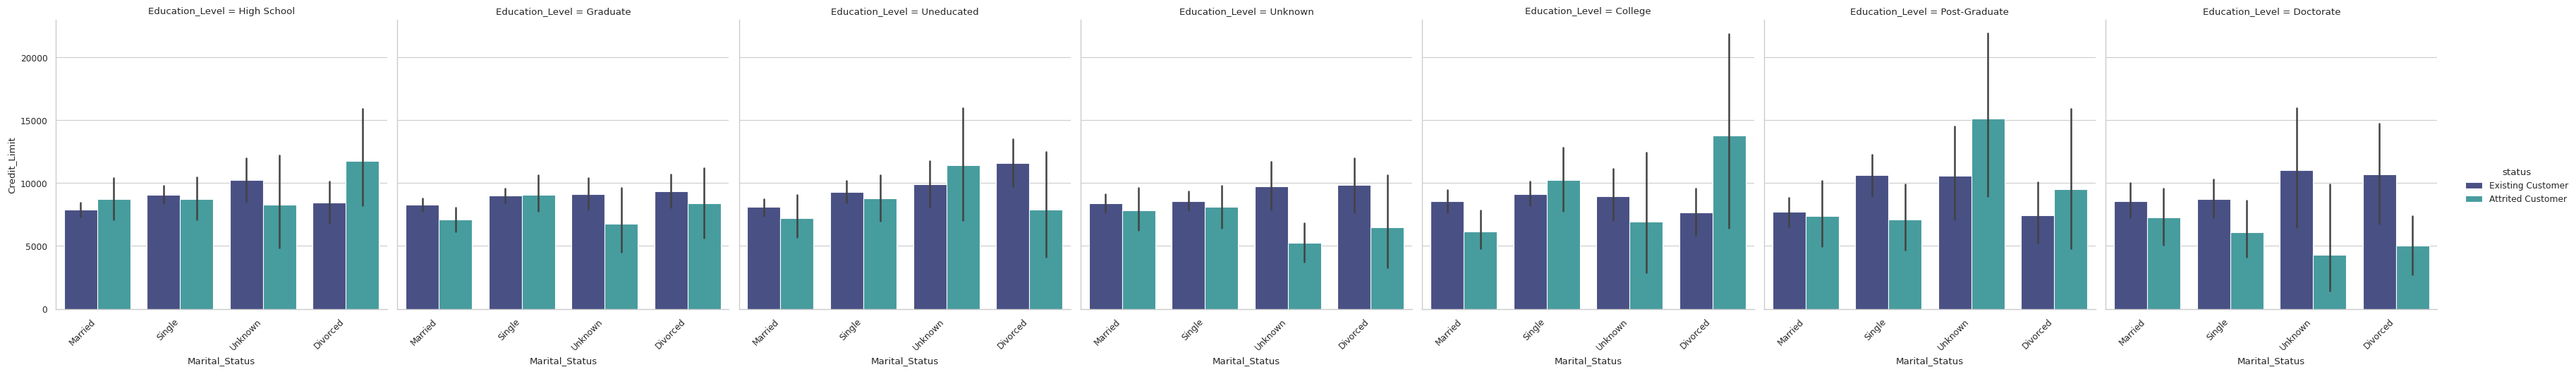

In [29]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Credit_Limit',
            hue = 'status',
            col = 'Education_Level',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [30]:
df_edu3 = df.groupby(by=['Education_Level','Marital_Status','status']).agg(avg_credit_limit=('Credit_Limit','mean')).sort_values(by=['Education_Level','Marital_Status','status','avg_credit_limit'],ascending=True).reset_index()

# Create Pivot 'status' to become column
df_edu3_pivot = df_edu3.pivot(index=['Education_Level', 'Marital_Status'], columns='status', values='avg_credit_limit')

df_edu3_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. Customers with a college education who are divorced have the largest difference between Attrited and Existing Customers. Attrited customers have a significantly higher average credit limit (13778.45) compared to Existing customers (7645.65). For Married and Single statuses, Existing Customers tend to have higher credit limits, with Single being the category with the smaller difference. In general, more Existing Customers have higher credit limits than Attrited Customers.

2. Customers with Doctorate education show a significant difference between Attrited Customer and Existing Customer. Existing customers tend to have higher credit limits across all categories. Especially in Divorced status, the difference between Attrited and Existing Customer is very large, where Existing Customer has a higher credit limit (10678.11) compared to Attrited Customer (4996.00). In the Unknown category, the Existing Customer has a very high credit limit (11050.09), far exceeding the Attrited Customer.

3. For customers with Graduate education, the difference in Credit Limit between Attrited Customer and Existing Customer is quite small across all categories. On Divorced status, Existing Customer customers have a slightly higher Credit Limit compared to Attrited Customer customers. However, on Single status, Attrited Customer has a slightly higher credit limit compared to Existing Customer.

4. Customers with high school education show a considerable difference in credit limit, especially in Divorced status, where Attrited Customer has a much higher credit limit (11780.32) compared to Existing Customer (8466.23). In Married and Single status, the difference is not too big, although Existing Customer in Single status has a higher credit limit.

5. Attrited customers with Post-Graduate education show higher Credit Limit values compared to Existing Customers in several categories, especially in Divorced (9488.50 vs. 7442.76) and Unknown (15100.58 vs. 10596.26) statuses. However, on Single status, Existing Customer has a much higher Credit Limit (10620.38) compared to Attrited Customer (7084.83).

6. Customers with Uneducated education show a similar trend to other categories, where Existing Customers have higher Credit Limits compared to Attributed Customers, especially in Divorced status, where the difference is very large (11598.82 vs. 7891.70). However, in Single and Unknown status, the difference is smaller.

7. For customers with the Unknown education category, Existing customers are more likely to have a higher Credit Limit than Attributed customers, especially in the Divorced and Unknown categories.

**Conlusion:**

- Overall, Existing Customers have higher Credit Limits compared to Attrited Customers, especially in the Single, Unknown, and Married categories across several education levels. There is a more significant difference between the two statuses at higher education levels (such as Doctorate and Post-Graduate), where active customers tend to have larger credit limits.

- However, for some categories, such as High School and College education, Attrited customers may have higher Credit Limits, especially in the Divorced category.

- Business Implications: This could indicate that customers with higher credit limits tend to be more loyal and more likely to remain active customers. Meanwhile, customers with lower credit limits may be more likely to discontinue use of the service. Therefore, companies may want to consider other factors, such as marital status and education level, in designing customer retention strategies.



##### **4. Education Level, Average Open To Buy, Marital Status, Customer Status**

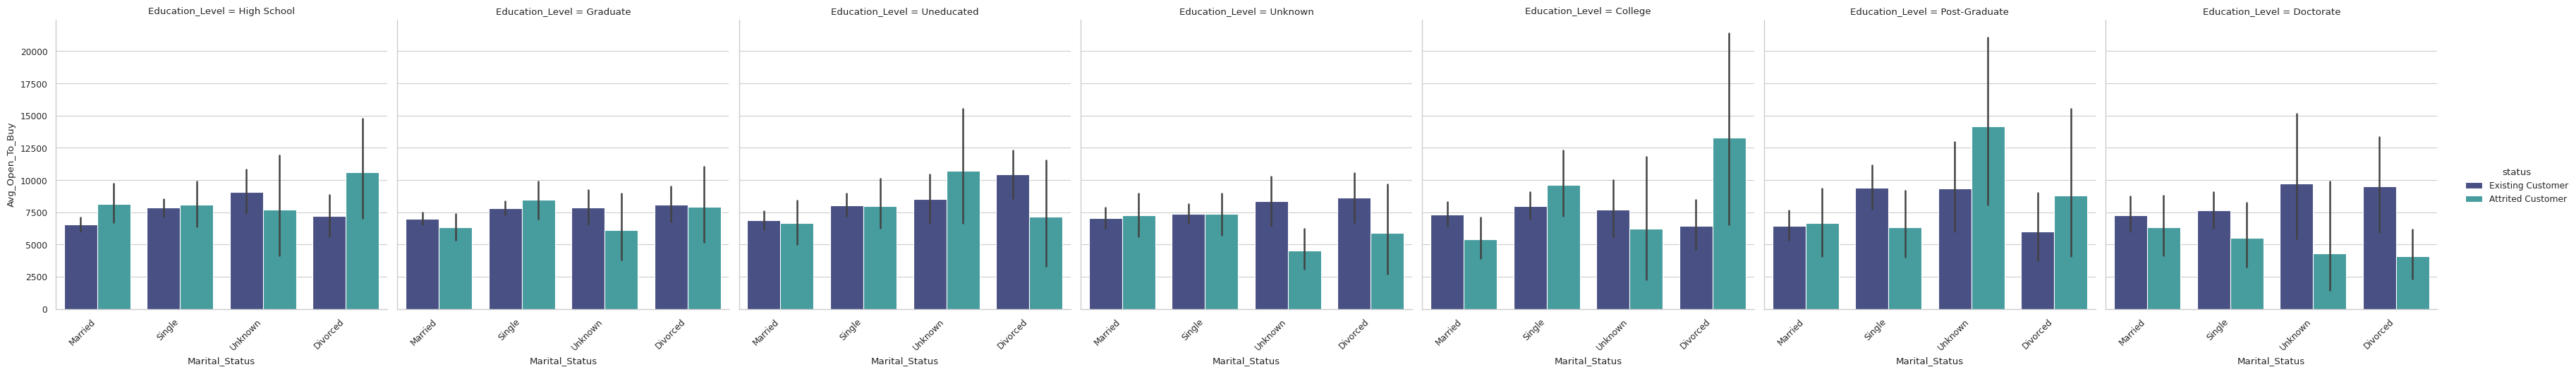

In [31]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Avg_Open_To_Buy',
            hue = 'status',
            col = 'Education_Level',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [32]:
df_edu5 = df.groupby(by=['Education_Level','Marital_Status','status']).agg(avg_opentobuy=('Avg_Open_To_Buy','mean')).sort_values(by=['Education_Level','Marital_Status','status','avg_opentobuy'],ascending=True).reset_index()

# Create Pivot 'status' to become column
df_edu5_pivot = df_edu5.pivot(index=['Education_Level', 'Marital_Status'], columns='status', values='avg_opentobuy')

df_edu5_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. College Attrited customers have a higher Average Open to Buy compared to Existing customers in the Divorced and Single categories. However, Existing customers have a higher Average Open to Buy in the Married and Unknown categories.

2. At the Doctorate education level, Existing customers have a higher Average Open to Buy than Attended customers, especially in the Divorced, Unknown, and Single categories.

3. Existing Graduate customers have a slightly higher Average Open to Buy than Attended customers in almost every category, although the differences are not significant.

4. Attended High School educated customers have a higher Average Open to Buy than Existing customers in the Divorced and Married categories. However, for the Single and Unknown categories, Existing customers have a higher Average Open to Buy.

5. At the Post-Graduate education level, Existing Customers have a much higher Average Open to Buy in the Single category. Attrited customers actually have a very high Average Open to Buy in the Unknown category, while for the Divorced and Married categories, Attrited customers have a higher Average Open to Buy, although not as large as in the other categories.

6. Pelanggan yang tidak terdidik (Uneducated) yang Existing memiliki Average Open to Buy yang lebih tinggi dibandingkan pelanggan yang Attrited, terutama pada kategori Divorced dan Unknown. Namun, perbedaan di kategori Single sangat kecil.

7. Customers with the Existing Unknown education category have a higher Average Open to Buy compared to Attributed customers, especially in the Divorced and Unknown categories.

**Conclusion:**
- Existing vs. Attrited Customers: In general, Existing customers have a higher Average Open to Buy than Attrited customers, especially in the Divorced, Single, and Unknown categories. Attrited customers tend to have a higher Average Open to Buy in the Married category at certain education levels, such as College, High School, and Post-Graduate.

- Education Level and Marital Status:

  - At higher education levels, such as Doctorate and Post-Graduate, the difference between Existing and Attrited customers in Average Open to Buy is significant, with Existing customers having higher scores.

  - At lower education levels, such as High School and Uneducated, Attrited customers have a higher Average Open to Buy in certain categories (e.g., Divorced and Married).

- Business Implications:

  - Customers with a higher Average Open to Buy threshold may be more likely to remain active in using the service, while customers with lower remaining credit may be more likely to churn or lose interest in continuing to use the service.
  - To increase customer retention, companies can consider the Average Open to Buy factor in their marketing strategy, paying special attention to customers who have lower remaining credit but with high loyalty potential based on their educational and marital status.

##### **5. Education Level, Total Transaction Amount, Marital Status, Customer Status**

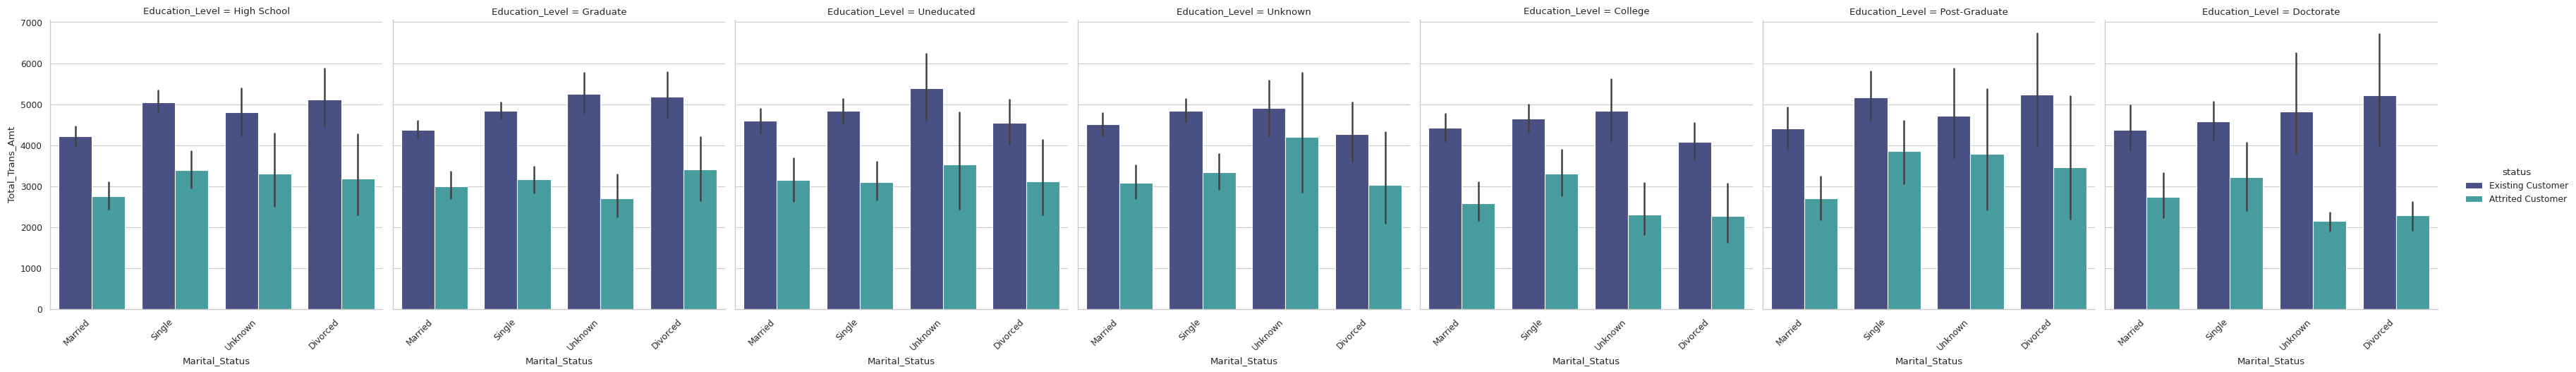

In [33]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Total_Trans_Amt',
            hue = 'status',
            col = 'Education_Level',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [34]:
df_edu6 = df.groupby(by=['Education_Level','Marital_Status','status']).agg(avg_trans_amt=('Total_Trans_Amt','mean')).sort_values(by=['Education_Level','Marital_Status','status','avg_trans_amt'],ascending=True).reset_index()

# Create Pivot 'status' to become column
df_edu6_pivot = df_edu6.pivot(index=['Education_Level', 'Marital_Status'], columns = 'status', values='avg_trans_amt')

df_edu6_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. Existing customers in the College category have higher average transactions than Attended customers in each marital status category (Divorced, Married, Single, and Unknown). The largest differences occur in the Divorced and Single categories, with Existing customers having higher average transactions.

2. Existing customers with a Doctorate degree have significantly higher average transactions compared to Attributed customers, especially in the Divorced and Unknown categories, where the difference is very significant.

3. Similar to the Doctorate education level, Existing customers in the Graduate category also have higher average transactions compared to Attended customers, especially in the Divorced and Unknown categories.

4. Existing customers with High School education also have higher average transactions compared to Attended customers, especially in the Divorced and Single categories. However, the difference is smaller compared to higher education levels such as Doctorate or Graduate.

5. Existing customers with Post-Graduate education have higher average transactions in the Divorced, Single, and Unknown categories compared to Attributed customers. The difference is quite large, especially in the Divorced category.

6. Existing customers with Uneducated education level also showed higher average transactions compared to Attrited customers, especially in the Unknown category. Although the difference is not too big, Existing customers tend to be more active in making transactions.

7. Existing customers in the Unknown category have higher average transactions compared to Attributed customers in each marital status category, although the differences are relatively small in the Married and Unknown categories.


**Conclusion:**
- Existing vs. Attrited Customers: Overall, Existing customers have a higher Average Transaction Amount compared to Attrited customers in almost all Education Level and Marital Status categories. The largest differences are found in higher education levels such as Doctorate, Graduate, and Post-Graduate, where Existing customers tend to transact more.

- Education Level and Marital Status:

  - Customers with higher education levels (such as Doctorate, Graduate, and Post-Graduate) tend to have higher average transactions, especially if they are Existing customers.

  - Customers with lower education levels (such as High School and Uneducated) still show the same pattern, although the differences are smaller.

- Business Implications:

  - Customer Retention: This data suggests that customers with higher transaction volumes (usually Existing customers) are more likely to remain active users of the service. Therefore, companies may consider providing greater offers or incentives to Existing customers with higher transaction potential, based on their education and marital status analysis.

  - Importance of Customer Category: Attrited customers with high education levels still have quite high transaction potential, even if they stop using the service. Therefore, companies can use marketing strategies to attract these customers back, by providing more specific incentives or relevant offers.

#### B. **Grouped By Income Category vs Marital Status**

##### **1. Income Category, Dependent Count, Marital Status, Customer Status**

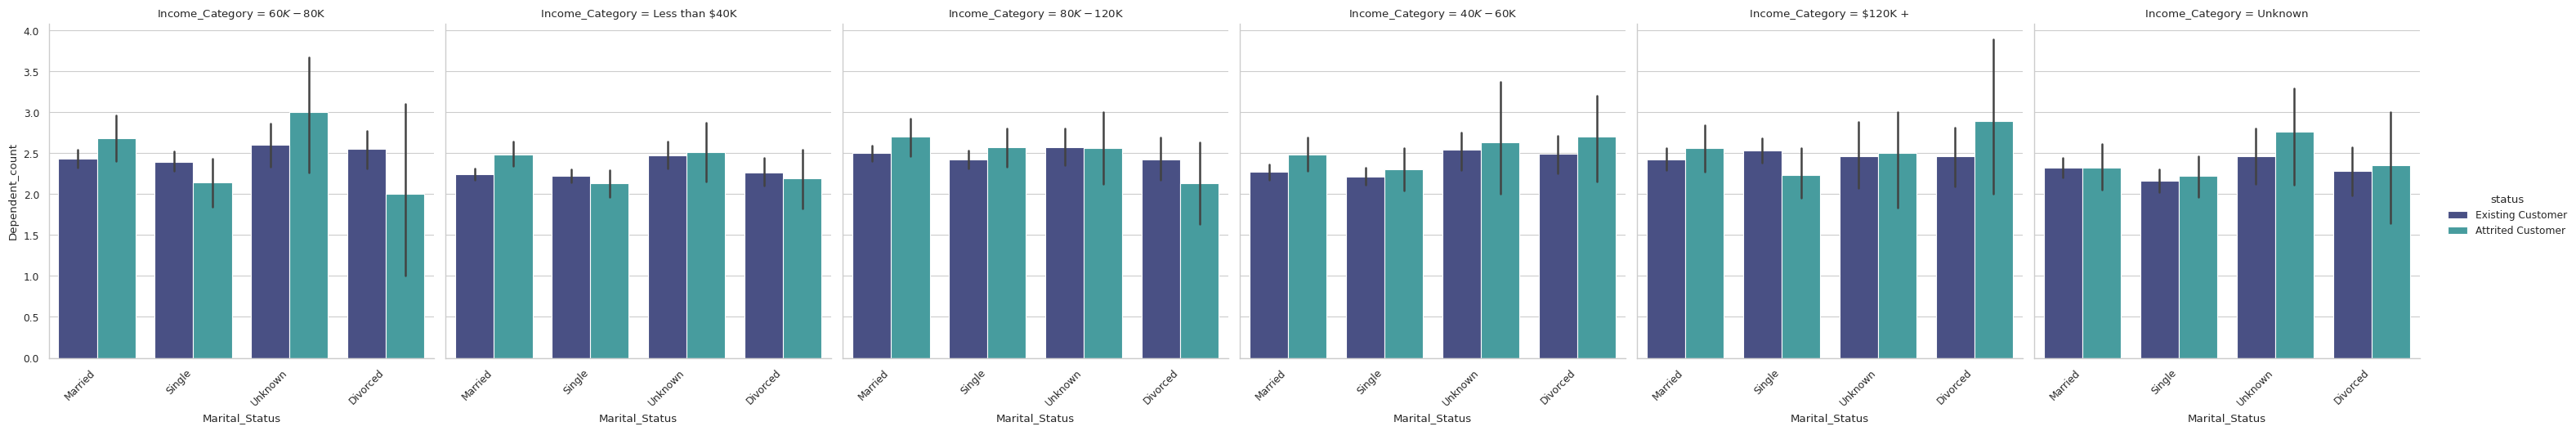

In [35]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Dependent_count',
            hue = 'status',
            col = 'Income_Category',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [36]:
df_income1 = df.groupby(by=['Income_Category','Marital_Status','status']).agg(avg_dependent_cnt=('Dependent_count','mean')).sort_values(by=['Income_Category','Marital_Status','status','avg_dependent_cnt'],ascending=True).reset_index()

# Create Pivot 'status' to become columns
df_income1_pivot = df_income1.pivot(index=['Income_Category', 'Marital_Status'], columns='status', values='avg_dependent_cnt')

df_income1_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. Attrited customers with incomes `over $120K` have a higher average number of dependents than Existing customers. The largest difference is seen in Divorced status, where Attrited customers have an average of 2.89 dependents, while Existing customers have 2.47.

2. In the `$40K - $60K` income category, Attrited customers tend to have a higher number of dependents compared to Existing customers, especially in Divorced status (2.70 for Attrited vs 2.49 for Existing). In the Married and Single categories, the difference is still there, but smaller.

3. Existing customers with income between `$60K - $80K` tend to have higher number of dependents than Attrited customers, especially in Divorced status (2.55 for Existing vs 2.00 for Attrited). However, in both Married and Single categories, Attrited customers have higher number of dependents, especially in Married (2.69 for Attrited vs 2.43 for Existing).

4. In the `$80K - $120K` category, Existing customers have a higher number of dependents in Divorced status (2.42 for Existing vs. 2.14 for Attrited). However, in both the Married and Single categories, Attrited customers have more dependents than Existing customers.

5. Customers earning less than $40K show a small difference in the number of dependents between Attrited and Existing customers. In the Married category, Attrited customers have slightly more dependents than Existing, while in the Single category, Existing customers have more dependents, although the difference is very small.

6. In the Unknown category, Attrited customers have a higher number of dependents compared to Existing customers in almost all marital status categories, especially in the Unknown category (2.76 for Attrited vs 2.46 for Existing).

**Conclusion:**
- Attrited vs. Existing Customers:
  - In general, Attrited customers tend to have more dependents than Existing customers, especially in the lower and middle income brackets (such as `$40K - $60K` and `$80K - $120K`). The biggest difference is seen in Divorced status, where Attrited customers have a higher number of dependents.

- Income Level and Marital Status:

  - In the higher income brackets (such as `$120K+`), the difference in the number of dependents between Attrited and Existing customers is smaller, with Existing customers tending to have fewer dependents across most marital statuses.
  - In the lower income brackets (such as `$40K - $60K` and `Less than $40K`), Attrited customers are more likely to have more dependents than Existing customers, especially in the Married category.

- Business Implications:

  - Customer Retention: Given that Attrited customers have more dependents, they may face greater financial challenges. Companies may need to tailor offers and incentives for these customers, especially in the lower income category, to increase their chances of returning as active customers.
  - Market Segmentation: For marketing strategies, understanding the number of dependents can help in tailoring promotions and offers based on customer status. Customers with more dependents may be more responsive to promotions that focus on savings or offers that provide family benefits.

- Final Conclusion: Overall, Attrited customers with more dependents tend to face greater financial stress, which may contribute to their downgrade. Strategies to retain or re-engage them should include a deeper understanding of the challenges they face with dependents, as well as offerings that can ease their burden.

##### **2. Income Category, Average Utilization Ratio, Marital Status, Customer Status**

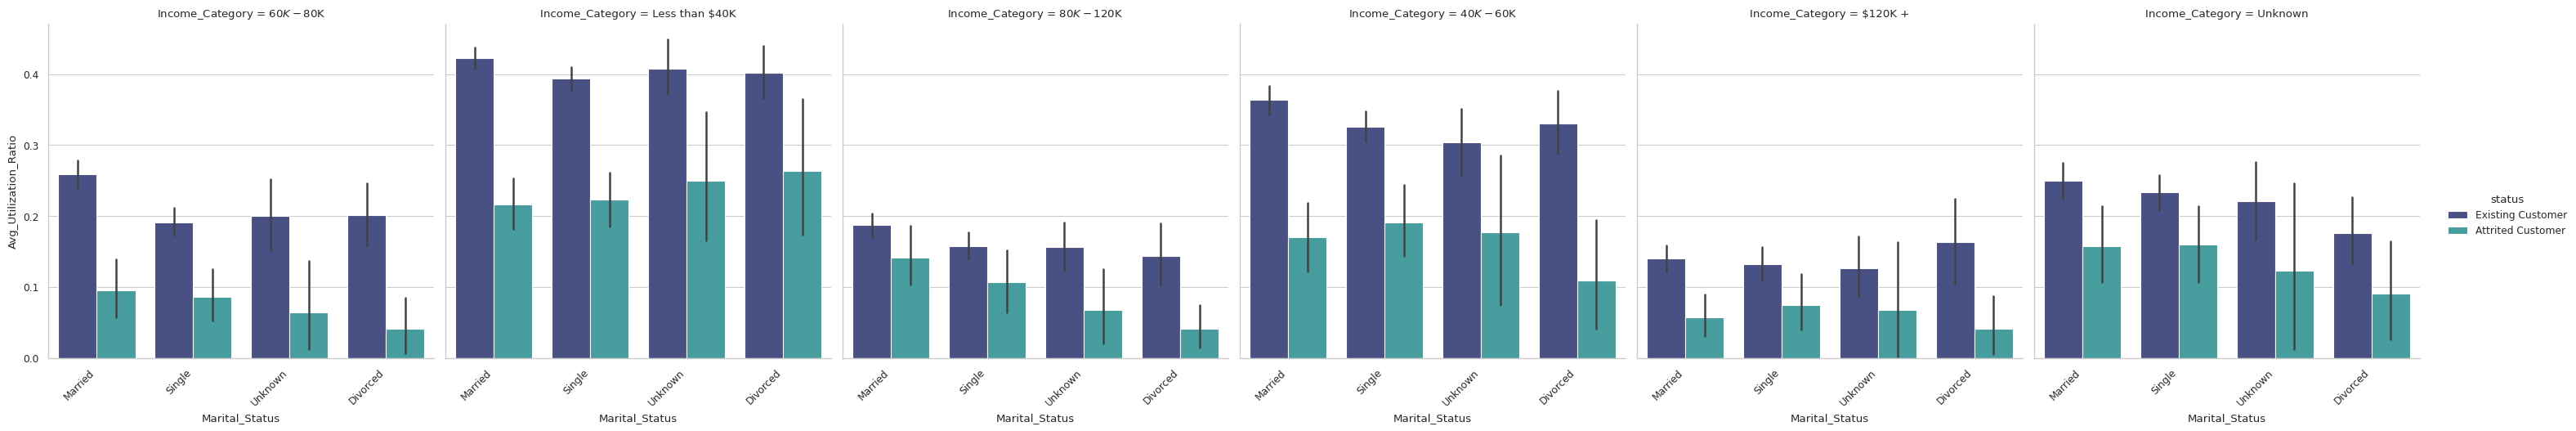

In [37]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Avg_Utilization_Ratio',
            hue = 'status',
            col = 'Income_Category',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [38]:
df_income2 = df.groupby(by=['Income_Category','Marital_Status','status']).agg(avg_util_ratio=('Avg_Utilization_Ratio','mean')).sort_values(by=['Income_Category','Marital_Status','status','avg_util_ratio'],ascending=True).reset_index()

# Create Pivot 'status' to become column
df_income2_pivot = df_income2.pivot(index=['Income_Category', 'Marital_Status'], columns='status', values='avg_util_ratio')
df_income2_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. Existing Divorced Customers in the Income `$120K+` category have a significantly higher Utilization Ratio (0.1632) compared to Attrited Customers (0.0410). Similar things happen for Married and Single status, where Existing customers use more credit than Attrited customers. Customers with higher income such as `$120K+` tend to have a higher Utilization Ratio, but it is still lower for Attrited customers.

2. In the `$40K - $60K` income category, the difference between Attrited and Existing Customers in terms of Utilization Ratio becomes more pronounced. Existing Customers with Divorced status show a significantly higher Utilization Ratio (0.3303) compared to Attrited Customers (0.1092). The same is true for Married and Single status, where Existing customers tend to use more credit. Overall, customers with lower incomes, such as `$40K - $60K`, have a higher tendency to use credit, especially Existing customers.

3. Existing Divorced Customers in the `$60K - $80K` category have a higher Utilization Ratio (0.2017) compared to Attrited Customers (0.0408). Likewise, Existing Married and Single customers have higher credit utilization rates compared to Attrited Customers. Despite these differences, Existing customers with incomes in the `$60K - $80K` range still show relatively moderate credit utilization rates.

4. In the `$80K - $120K` income category, Existing Divorced customers have a higher Utilization Ratio (0.1434) compared to Attrited Customers (0.0414). Existing Married and Single customers also show higher credit utilization compared to Attrited Customers. The overall Utilization Ratio for customers in the $80K - $120K income category is lower when compared to lower income categories (such as `$40K - $60K`), but is still higher for Existing customers.

5. Existing Customers with income `Less than $40K` tend to have a higher Utilization Ratio compared to Attended customers, with the most significant differences in Divorced (0.4024 vs 0.2633) and Married (0.4231 vs 0.2158) statuses.
Customers with lower incomes, especially those with income `Less than $40K`, show a higher tendency to use credit, especially among Existing Customers.

6. In the Unknown Income category, Existing customers have a higher Utilization Ratio compared to Attributed Customers, especially in the Married (0.2500 vs 0.1580) and Single (0.2336 vs 0.1596) statuses. Overall, customers with Unknown income status tend to use less credit compared to those with clearer income categories, although Existing customers still show higher credit utilization.

**Conclusion:**
- Existing vs. Attrited Customers:

  - Existing customers show higher Utilization Ratios than Attrited Customers in almost every income and marital status category. This suggests that retained customers are more likely to utilize their credit more.

- Low Income Customers:

  - In the lower income category (`Less than $40K`), Existing customers show higher Utilization Ratios, meaning they are more actively using their credit compared to Attrited customers. This could be an indicator that low income customers who remain active may be more reliant on credit facilities.

- High Income Customers:

  - In the high income category (`$120K+`), despite the difference in Utilization Ratios, Existing customers still show higher credit utilization compared to Attrited customers. This suggests that despite their higher income, retained customers are more likely to be actively using their credit.

- Business Implications:

  - Attrited Customers may not be utilizing their credit to its full potential, which could be a focus for increasing their retention by offering incentives or changing credit policies to increase their utilization.

  - Customers with lower income (`Less than $40K`) have great potential to be used in credit utilization improvement campaigns, especially Existing customers who show a higher Utilization Ratio.

##### **3. Income Category, Credit Limit, Marital Status, Customer Status**

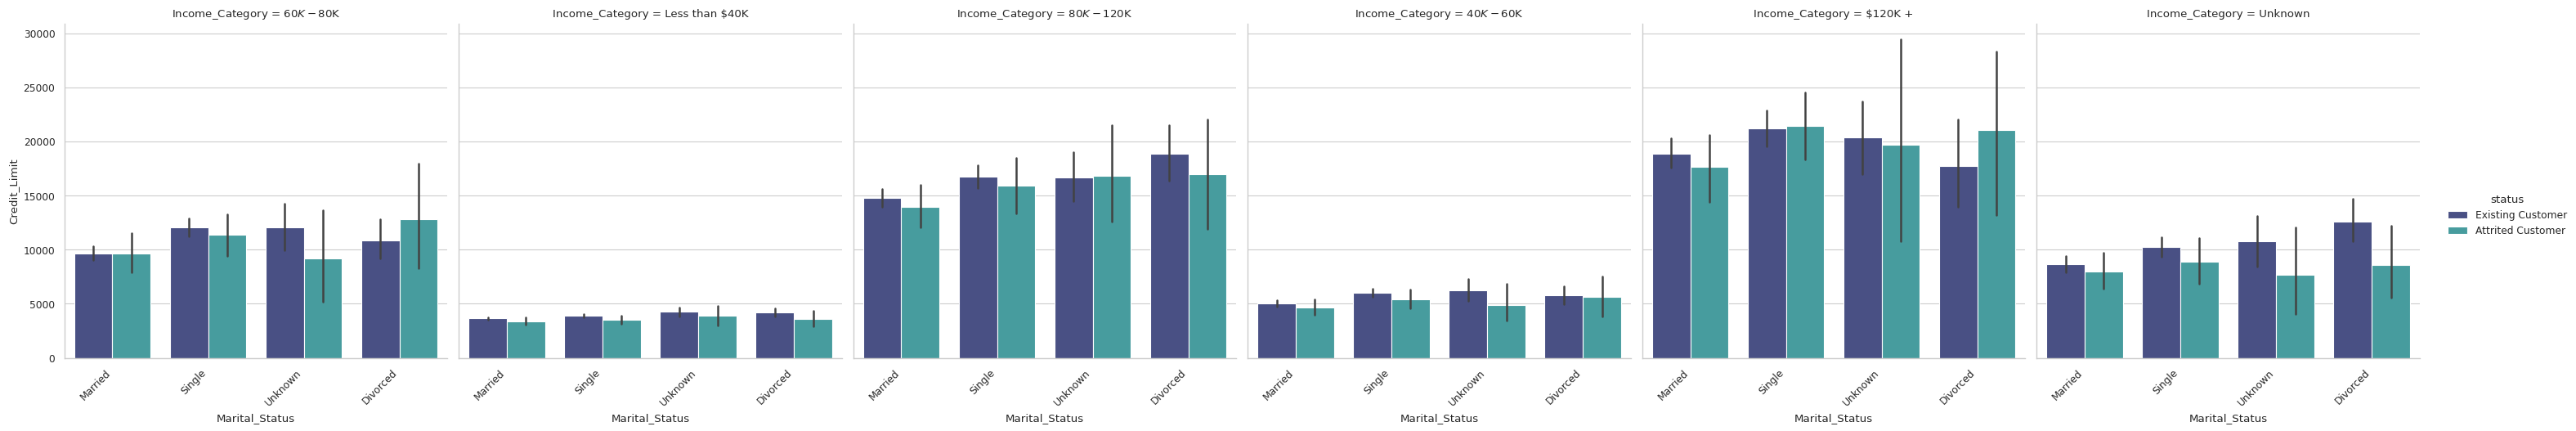

In [39]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Credit_Limit',
            hue = 'status',
            col = 'Income_Category',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [40]:
df_income3 = df.groupby(by=['Income_Category','Marital_Status','status']).agg(avg_credit_limit=('Credit_Limit','mean')).sort_values(by=['Income_Category','Marital_Status','status','avg_credit_limit'],ascending=True).reset_index()

# Create Pivot 'status' to become columns
df_income3_pivot = df_income3.pivot(index=['Income_Category', 'Marital_Status'], columns='status', values='avg_credit_limit')
df_income3_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. In general, Attrited customers with incomes of `$120K+` have a higher Average Credit Limit than Existing customers, especially in Divorced and Single statuses. However, Existing Married customers have a higher Credit Limit compared to Attrited customers (18,869.99 vs. 17,625.38). This suggests that while Attrited customers have higher credit limits in some categories, Existing customers tend to be given more credit in certain statuses.

2. In the `$40K - $60K` income category, Existing customers generally have a higher Average Credit Limit than Attrited customers, with significant differences across Single and Unknown statuses. Existing customers with Single and Unknown statuses have significantly higher credit limits than Attrited customers. Existing customers also have more credit available despite their lower incomes than those in the $120K+ category, indicating that credit may be more heavily channeled to more active customers over the long term.

3. In the `$60K - $80K` category, Attrited customers with Divorced status have higher credit limits than Existing customers (12,823.60 vs. 10,851.33), but the opposite is true for Single and Unknown statuses, where Existing customers have higher credit limits. This suggests that while Attrited customers may have higher credit limits in some statuses, Existing customers are still given more credit in different statuses, particularly those associated with higher credit usage activity.

4. Existing Divorced, Married, and Single customers in the `$80K - $120K` income category have higher credit limits compared to Attributed customers. The difference is especially significant for Divorced and Single statuses, indicating that Attributed customers are given more credit even in higher income categories.

5. In the Less than `$40K` income category, Existing customers have a higher Average Credit Limit than Attributed customers across all marital statuses. This suggests that despite lower incomes, customers who remain active receive more credit.

6. Existing customers with Divorced, Single, and Unknown status in the Unknown Income category have higher credit limits compared to Attributed customers. This reflects that customers who are actively retained are more likely to be granted higher credit limits even though their income status is unknown.

**Conclusion:**
- Existing vs. Attrited Customers:
  - In general, Existing customers have higher Average Credit Limits than Attrited customers in almost every income and marital status category.
  - This suggests that retained customers are more likely to be granted higher credit limits, which may reflect their greater use or reliability in paying credit.

- High Income Customers ($120K+):

  - Attrited customers in the highest income category ($120K+) tend to have higher credit limits than Existing customers. However, Existing customers are still granted more credit in certain statuses, most notably Married and Single.

- Middle Income Customers (Less than $40K):

  - In the lower income category (Less than $40K), Existing customers consistently have higher credit limits than Attrited customers. This suggests that retained customers are granted more credit even at lower income levels.

- Business Implications:

  - Existing customers tend to be granted higher credit limits because they are more active in using credit products. Marketing or service strategies that encourage customers to stay active can be a way to retain and extend more credit to them.
  - Attrited customers may need more attention in terms of increasing activity or managing their credit limits. This can be an opportunity to design offers that encourage them to return to use their credit more.

##### **4. Income Category, Average Open To Buy, Marital Status, Customer Status**

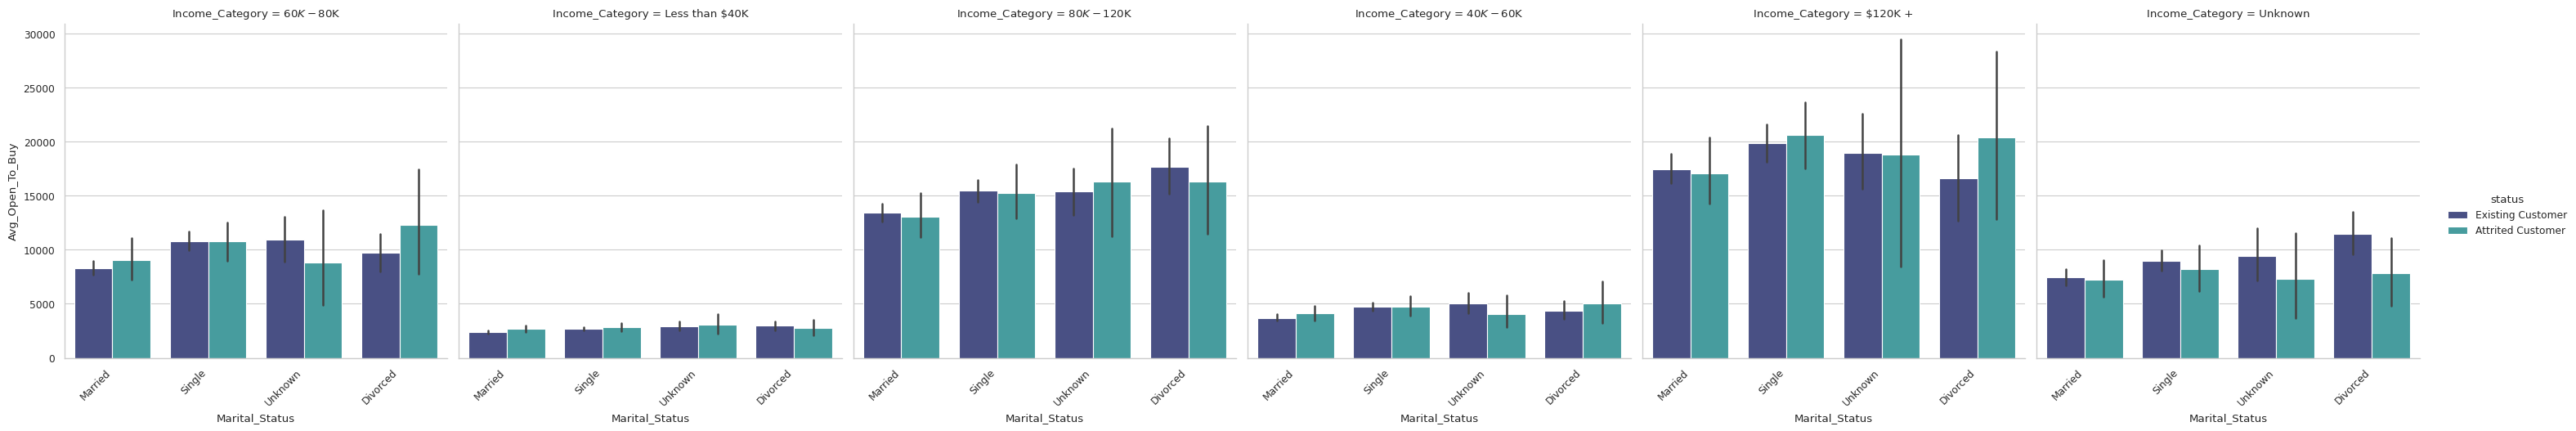

In [41]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Avg_Open_To_Buy',
            hue = 'status',
            col = 'Income_Category',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [42]:
df_income4 = df.groupby(by=['Income_Category','Marital_Status','status']).agg(avg_opentobuy=('Avg_Open_To_Buy','mean')).sort_values(by=['Income_Category','Marital_Status','status','avg_opentobuy'],ascending=True).reset_index()

# Create Pivot 'status' to become columns
df_income4_pivot = df_income4.pivot(index=['Income_Category', 'Marital_Status'], columns='status', values='avg_opentobuy')
df_income4_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. In the `$120K+` income category, Attrited customers had a higher Average Open to Buy than Existing customers in both Divorced and Single statuses. However, Existing Married customers had slightly more Open to Buy than Attrited customers (17,483.50 vs. 17,093.50). Attrited customers in Single status also had more Open to Buy than Existing customers, indicating that even though they have left the service, they still have more available credit.

2. In the `$40K - $60`K income category, Attrited customers have a higher Average Open to Buy in both Divorced and Married statuses compared to Existing customers. The largest difference occurs in Married status, where Attrited customers have more Open to Buy than Existing customers (4,117.47 vs 3,703.55). However, Existing customers with Single and Unknown statuses have more Open to Buy than Attrited customers. This suggests that despite their lower income, Attrited customers are using their credit more.

3. In the `$60K - $80K` category, Attrited customers have a higher Average Open to Buy than Existing customers across all marital statuses except Single.
Existing Single and Unknown customers have more Open to Buy than Attrited customers, indicating that Attrited customers use more credit despite being in the middle income category.

4. In the `$80K - $120K` income category, Existing customers generally have a higher Average Open to Buy than Attrited customers in Divorced, Married, and Unknown statuses. Existing customers with Single status have a slightly higher Open to Buy than Attrited customers, but the difference is not too large.

5. In the `Less than $40K` income category, Existing customers with Divorced status had a higher Average Open to Buy than Attrited customers (2,956.03 vs 2,781.57). However, in Married status, Attrited customers had a higher Open to Buy than Existing customers (2,711.90 vs 2,370.25), indicating that Attrited customers are more likely to have more available credit even though they are no longer active. Overall, Existing customers in this category tend to have more Open to Buy, except for Married and Unknown statuses.

6. In the Unknown income category, Existing customers have a higher Average Open to Buy compared to Attrited customers across all marital statuses. Existing customers with Divorced, Single, and Unknown statuses have more Open to Buy than Attrited customers, indicating that active customers are using more credit.

**Conclusion:**
- Existing vs. Attrited Customers:

  - In general, Existing customers have a higher Average Open to Buy than Attrited customers across most income and marital status categories. This suggests that active customers are using their credit more frequently and are given more room to transact.
  - However, in some categories, such as `$120K+` and `$40K-$60K`, Attrited customers who are Single or Divorced tend to have more Open to Buy than Existing customers, which could be an indication that even though they have stopped transacting, they still have more available credit.

- High Income (`$120K+`) Customers:

  - Attrited customers with income of `$120K+` are more Open to Buy than Existing customers across Divorced and Single statuses, but Married Existing customers are more Open to Buy than Attrited customers.

- Middle and Low Income (`Less than $40K`) Customers:

  - In the Less than $40K income category, Existing customers tend to be more Open to Buy than Attrited customers across most marital statuses.
  - In this category, Attrited customers with Married and Unknown statuses are more Open to Buy than Existing customers.

- Business Implications:

  - While Attrited customers may have higher Open to Buy across some segments, Existing customers are more likely to utilize their credit, and therefore are given more room to transact.
  - To improve customer retention, companies may consider providing more incentives or credit space for returning Attrited customers.

##### **5. Income Category, Total Transaction Amount, Marital Status, Customer Status**

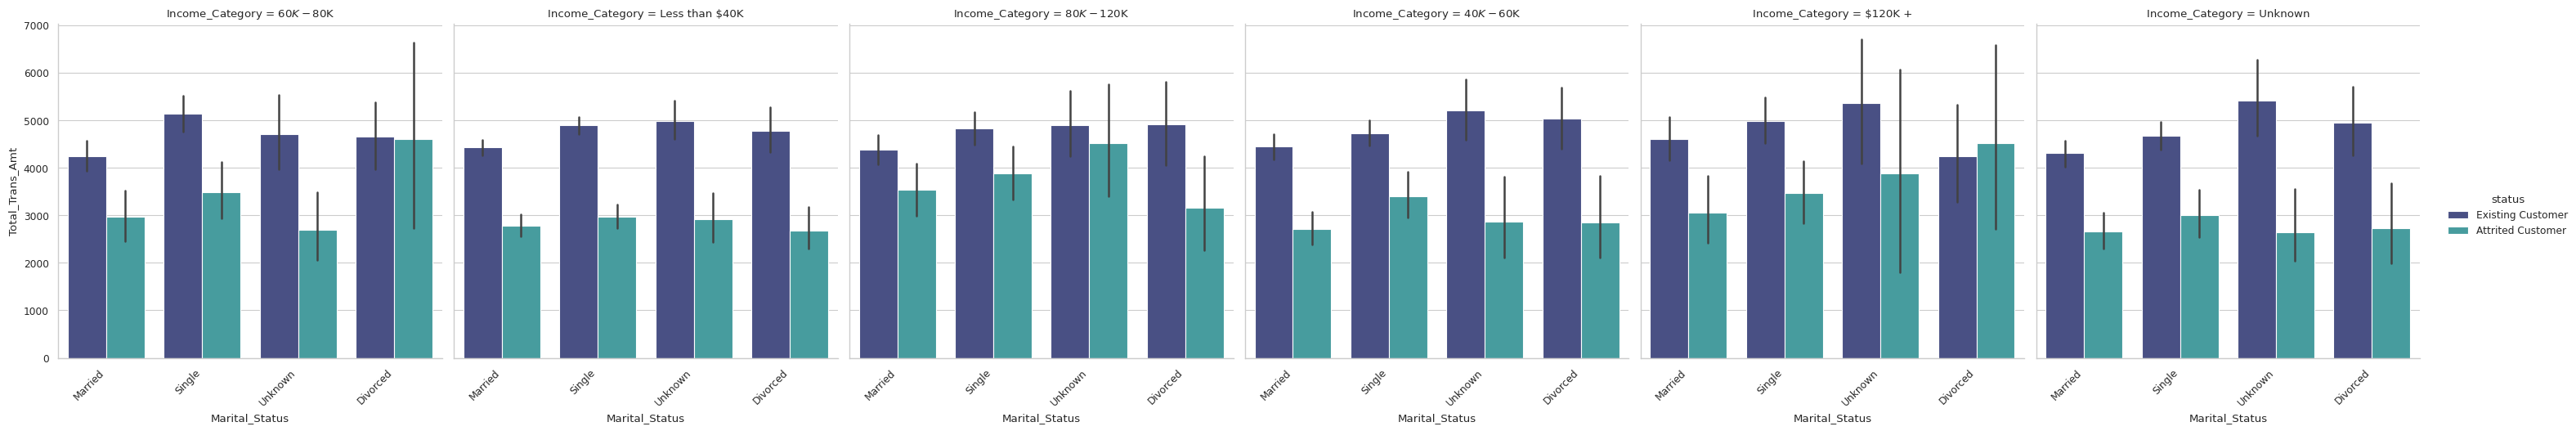

In [43]:
fig = sns.catplot(x = 'Marital_Status',
            y = 'Total_Trans_Amt',
            hue = 'status',
            col = 'Income_Category',
            kind = 'bar', palette = 'mako',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [44]:
df_income5 = df.groupby(by=['Income_Category','Marital_Status','status']).agg(avg_trans_amt=('Total_Trans_Amt','mean')).sort_values(by=['Income_Category','Marital_Status','status','avg_trans_amt'],ascending=True).reset_index()

# Create Pivot 'status' to become columns
df_income5_pivot = df_income5.pivot(index=['Income_Category', 'Marital_Status'], columns='status', values='avg_trans_amt')
df_income5_pivot.style.background_gradient(cmap='BuGn')

**Explanation:**
1. In the `$120K+` income category, Existing customers overall had higher transactions than Attrited customers.
Existing customers with Single and Unknown statuses had significantly higher total transactions compared to Attrited customers, indicating that active customers in the high income category transact more frequently and for higher amounts. The largest difference was seen in Existing customers with Single status (4,979.99 vs 3,465.95), indicating that these customers make purchases more frequently and in larger amounts.

2. In the `$40K - $60K` income category, Existing customers again showed higher total transactions compared to Attrited customers across almost all marital statuses.  The most striking difference was in Divorced (5,027.22 vs. 2,843.65), indicating that active customers made more purchases than customers who had left the service.  Single and Unknown customers also transacted more frequently, although the differences were not as large as in Divorced.

3. In the `$60K - $80K` income category, Existing customers transact more frequently and for larger amounts than Attrited customers. The largest difference is in Single status (5,130.00 vs 3,477.46), indicating that Existing customers with Single status are more active and transact more.
Existing customers in all marital statuses have higher total transactions compared to Attrited customers, except for Divorced status, where the difference is not as large.

4. In the `$80K - $120K` income category, Existing customers again showed higher total transactions than Attrited customers across almost all marital statuses. The largest difference was seen in Divorced (4,909.80 vs 3,161.18), indicating that Divorced Existing customers transacted more frequently and at higher values ​​than Attrited customers.

5. In the `Less than $40K` income category, Existing customers transact more frequently and at higher values ​​than Attrited customers across all marital statuses. The largest difference is in Divorced (4,772.30 vs. 2,672.85), indicating that Divorced Existing customers transact more frequently and at higher values.

6. In the Unknown income category, Existing customers tend to make larger transactions compared to Attributed customers across all marital statuses. Existing customers with Unknown status have the highest total transactions (5,420.42 vs 2,634.47), indicating that active customers with unknown income status make larger transactions.

**Conclusion:**
- Existing vs. Attrited Customers:

  - Overall, Existing customers make higher value transactions than Attrited customers. This suggests that customers who are actively engaged in the service program shop more frequently and with higher transaction values.
  - Existing customers with Single and Unknown status tend to have significantly higher transaction totals than Attrited customers, especially in the middle to high income categories.

- Income Category:

  - Customers with higher incomes (`$120K+`) have higher transaction values ​​than customers in the lower income category (`Less than $40K`). However, the difference between Existing and Attrited customers remains consistent across all income categories.

- Business Implications:

  - To increase customer engagement and retention, companies need to encourage Attrited customers to return to active transactions, perhaps by offering incentives or special offers that can encourage them to make more purchases.
  - Given that Existing customers have higher transaction totals, companies may want to consider strategies to increase purchases from customers who make fewer transactions or increase transaction frequency from existing customers.

# **Step 3: Data Cleaning**

## **3.1 Dropping Unnecessary Columns**

In [45]:
# Drop unecessary column
df_train = df.drop(columns=['idstatus','Educationid','Maritalid','card_categoryid'])
df_train.set_index('CLIENTNUM', inplace=True)
df_train.head()

,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1144,42,0.061
818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1291,33,0.105
713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,1887,20,0.000
769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1171,20,0.760
709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,816,28,0.000


In [46]:
# Inspect the Dataset after Dropped Certain Columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   status                    10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  int64  
 13  Total_Revolving_Bal       10127 non-null  int64  
 14 

In [47]:
# Dataset that only consist numerical features [1]
int_features = df_train[['Customer_Age','Dependent_count', 'Months_on_book', 'Total_Relationship_Count']]

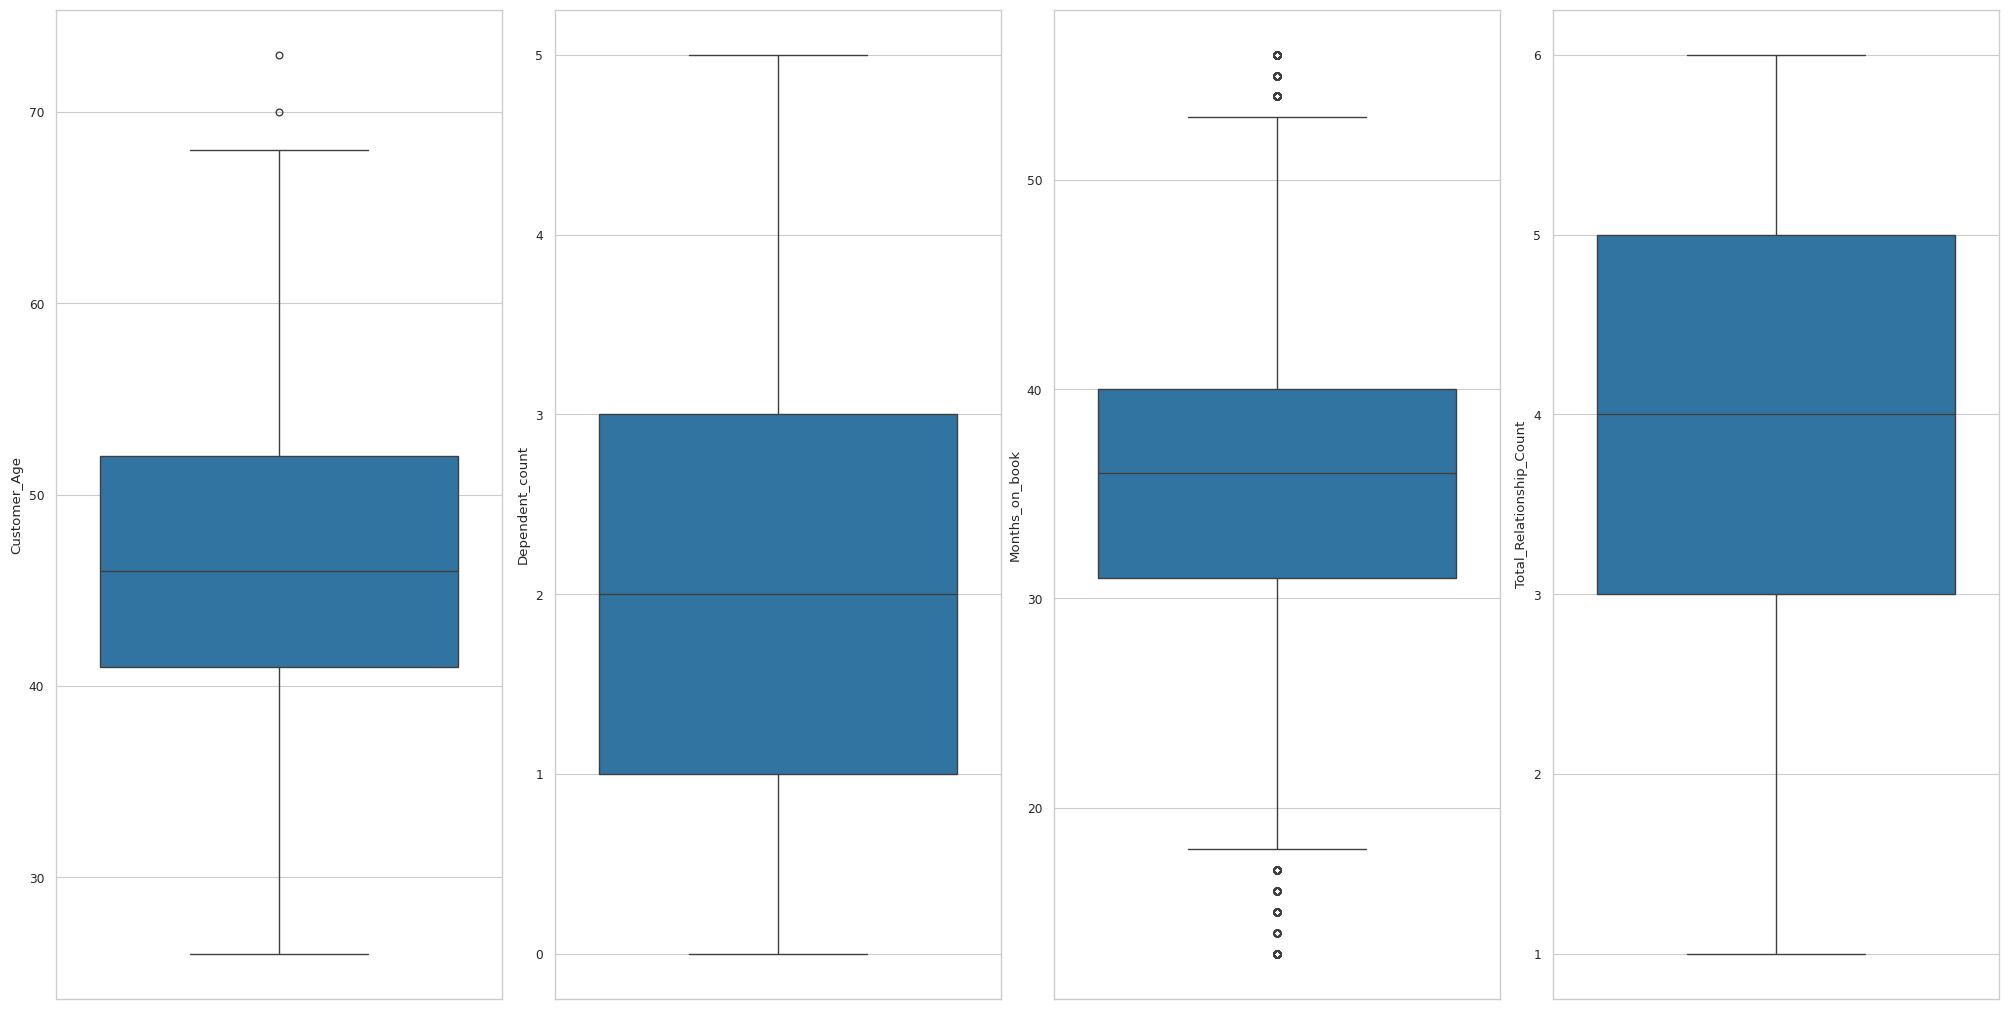

In [48]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [49]:
# Dataset that only consist numerical features [2]
int_features = df_train[['Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal', 'Months_Inactive_12_mon']]

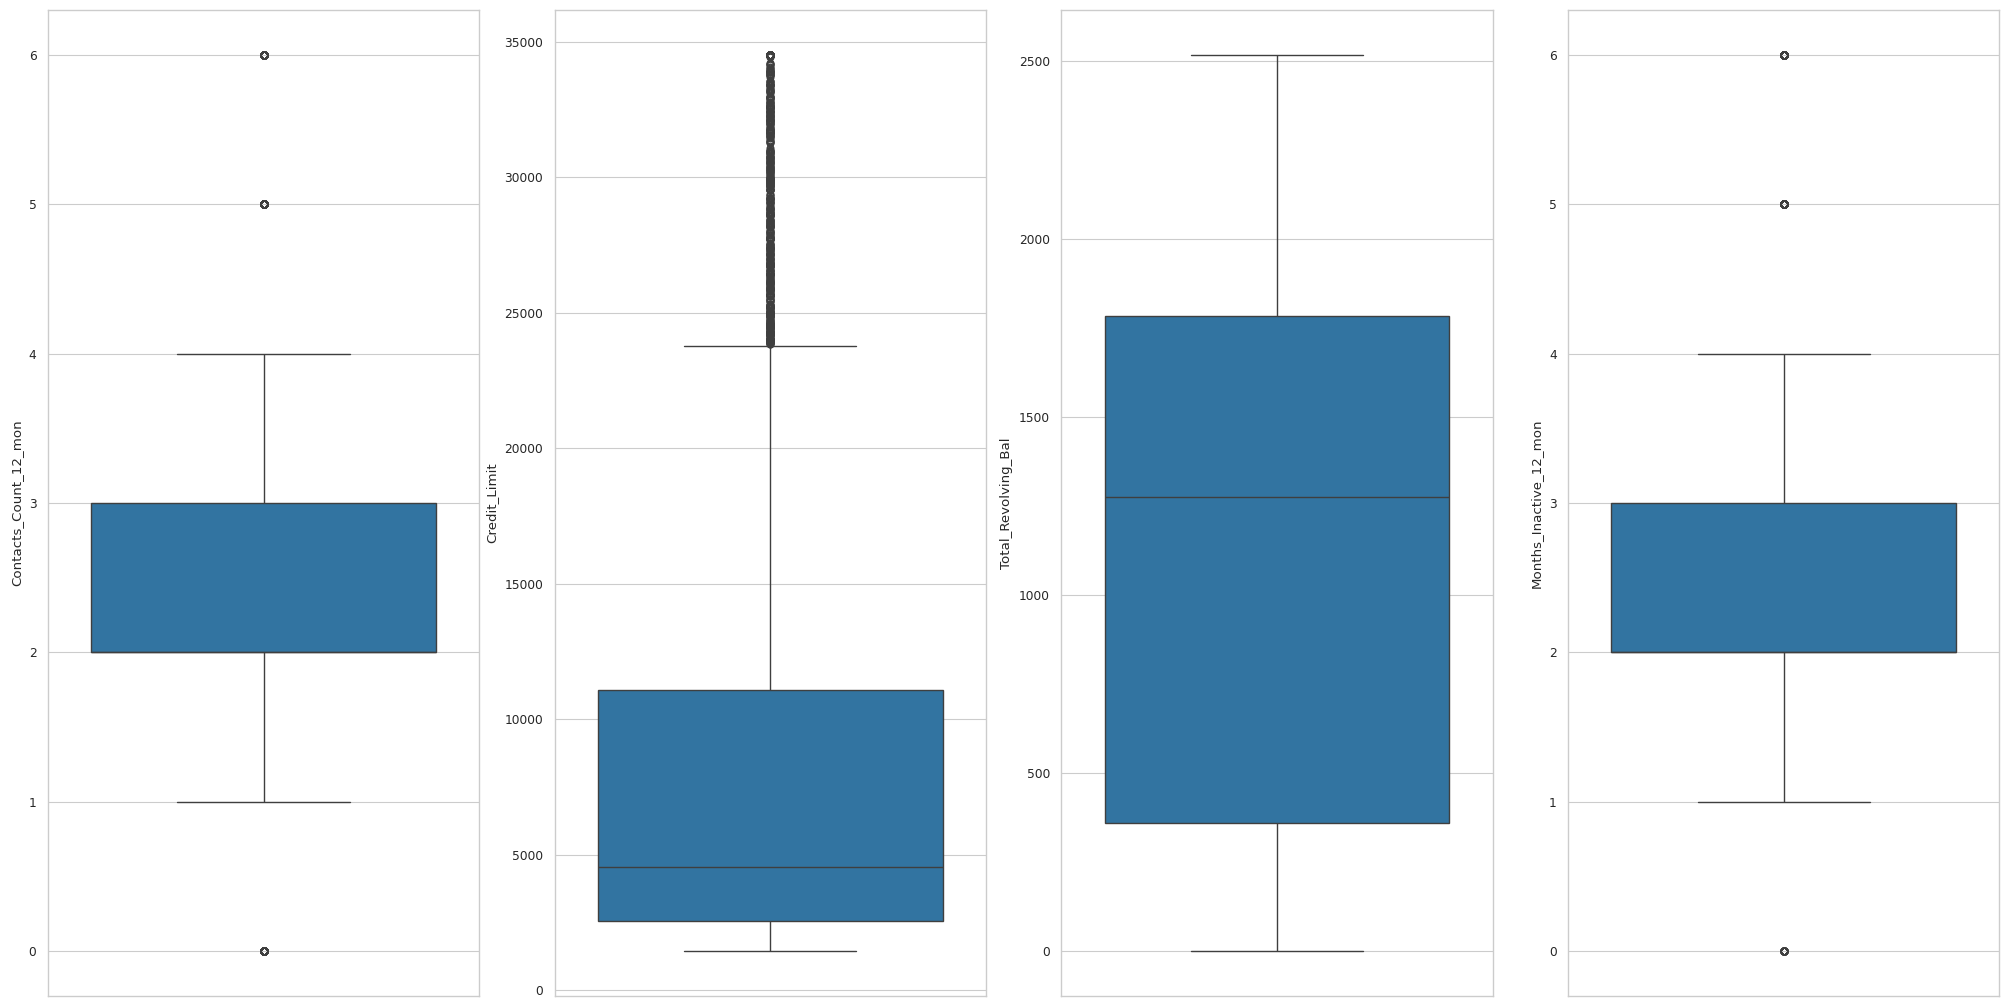

In [50]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [51]:
# Dataset that only consist numerical features [3]
int_features = df_train[['Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']]

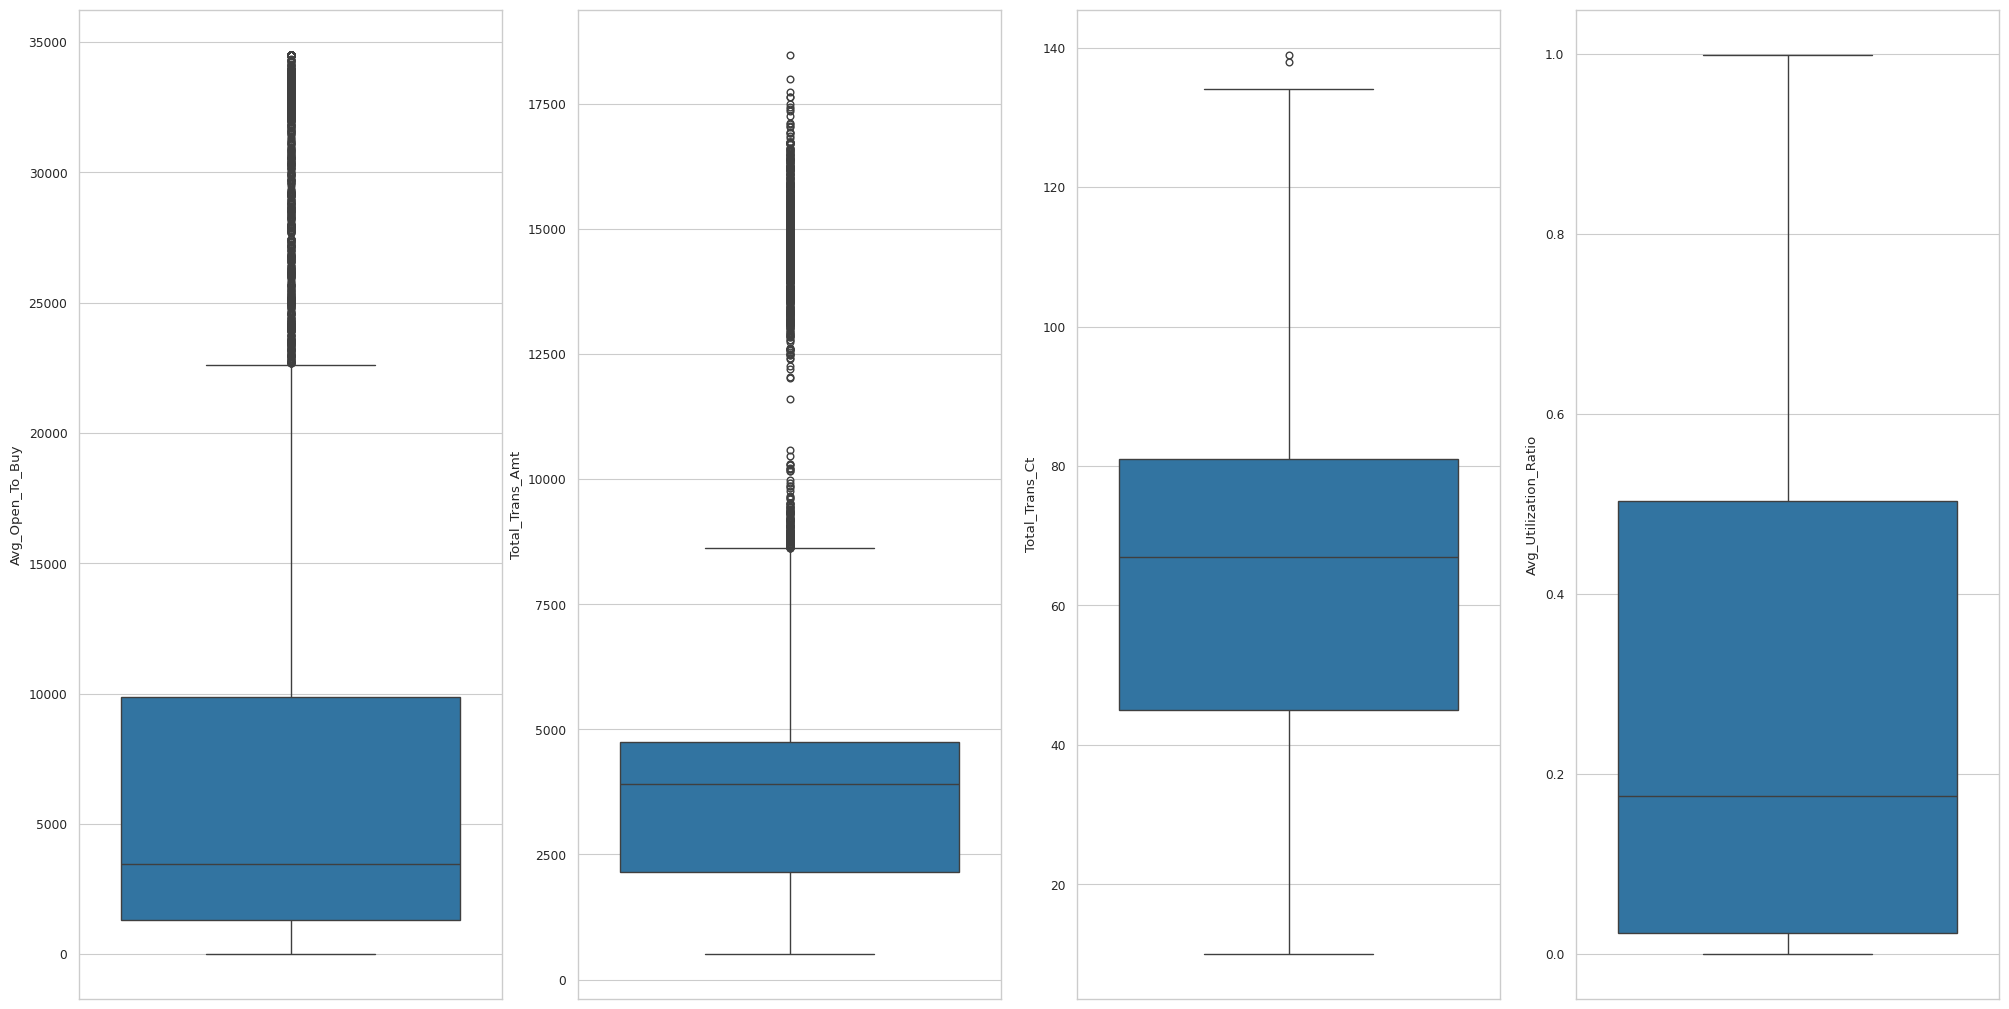

In [52]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [53]:
df_train.select_dtypes(include=['int','float']).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

## **3.2 Distribution of Numerical Features**

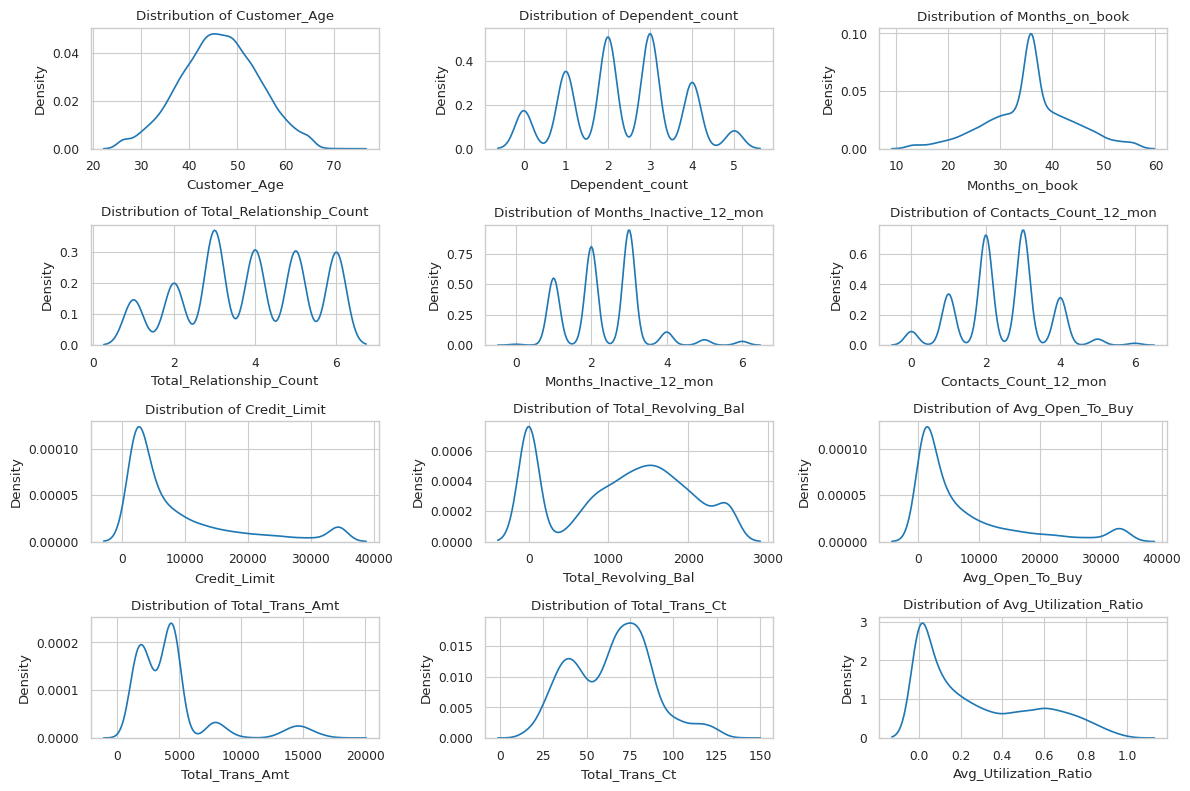

In [54]:
# Create Histogram to find distribution in numerical features
int_features = df_train.select_dtypes(include=['int','float'])

# Plot histogram
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(int_features.columns):
    sns.kdeplot(int_features[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## **3.3 Categorical & Numerical Features Description**

In [55]:
# Describe NUmerical Features
int_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.938679,9088.788539,1438.0,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.124617,9090.695763,3.0,1324.500,3474.000,9859.000,34516.000
Total_Trans_Amt,10127.0,4404.086304,3397.129254,510.0,2155.500,3899.000,4741.000,18484.000


In [56]:
# Describe Categorical Features
df_train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
status,10127,2,Existing Customer,8500
Gender,10127,2,Female,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [57]:
# Count Values in each Categorical Features
for col in df_train.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for status:
status
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Value counts for Gender:
Gender
Female    5358
Male      4769
Name: count, dtype: int64

Value counts for Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Value counts for Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Value counts for Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Value counts for Card_Category:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64



# **Step 4: Data Preprocessing & Data Splitting**

## **4.1 Encode Categorical Features**

In [58]:
#Convert all the non-numeric columns to numerical data types
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])

# Describe df_train After Encoded
df_train.describe()

,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.938679,1162.814061,7469.124617,4404.086304,64.858695,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.788539,814.987335,9090.695763,3397.129254,23.472570,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [59]:
# Top 5 Rows of the Dataset after Encoded
df_train.head()

,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,
768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691,777,11914,1144,42,0.061
818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256,864,7392,1291,33,0.105
713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418,0,3418,1887,20,0.000
769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313,2517,796,1171,20,0.760
709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716,0,4716,816,28,0.000


## **4.2 Data Splitting & Features Selection**

In [60]:
X = df_train.drop(['status'], axis=1)
y = df_train['status']

In [61]:
# Show the Data of X!
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,
768805383,45,1,3,3,1,2,0,39,5,1,3,12691,777,11914,1144,42,0.061
818770008,49,0,5,2,2,4,0,44,6,1,2,8256,864,7392,1291,33,0.105
713982108,51,1,3,2,1,3,0,36,4,1,0,3418,0,3418,1887,20,0.000
769911858,40,0,4,3,3,4,0,34,3,4,1,3313,2517,796,1171,20,0.760
709106358,40,1,3,5,1,2,0,21,5,1,0,4716,0,4716,816,28,0.000


In [62]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Gender,10127.0,0.470919,0.499178,0.0,0.000,0.000,1.000,1.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Education_Level,10127.0,3.096574,1.834812,0.0,2.000,3.000,5.000,6.000
Marital_Status,10127.0,1.463415,0.737808,0.0,1.000,1.000,2.000,3.000
Income_Category,10127.0,2.863928,1.504700,0.0,2.000,3.000,4.000,5.000
Card_Category,10127.0,0.179816,0.693039,0.0,0.000,0.000,0.000,3.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000


In [63]:
# Show the Data of y!
y.head()

,status
CLIENTNUM,
768805383,1
818770008,1
713982108,1
769911858,1
709106358,1


In [64]:
# Features Selection with Chi-Square
# Normalize data (Chi-Square requires non-negative values, so ensure all features are positive)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection using SelectKBest and Chi-Square
selector = SelectKBest(score_func=chi2, k=8)  # Select the top 8 best features
X_new = selector.fit_transform(X_scaled, y)

# Get the mask of selected features (True for selected, False for unselected)
selected_features_mask = selector.get_support()

# Retrieve the names of the selected features
selected_features_names = X.columns[selected_features_mask]

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,  # Original feature names
    'Score': selector.scores_  # Chi-Square scores
})

# Display feature scores sorted in descending order
print("Feature Scores:")
print(feature_scores_df.sort_values(by='Score', ascending=False))

# Display the names of the selected features
print("\nSelected Features:")
selected_features_names.tolist()

Feature Scores:
                     Feature       Score
12       Total_Revolving_Bal  159.012873
15            Total_Trans_Ct  108.746218
16     Avg_Utilization_Ratio   89.206097
14           Total_Trans_Amt   47.458997
8   Total_Relationship_Count   39.147656
10     Contacts_Count_12_mon   35.173241
9     Months_Inactive_12_mon   17.111187
1                     Gender    7.443223
11              Credit_Limit    2.003412
2            Dependent_count    0.525214
5            Income_Category    0.495034
4             Marital_Status    0.434252
6              Card_Category    0.328707
0               Customer_Age    0.225728
7             Months_on_book    0.122718
3            Education_Level    0.056539
13           Avg_Open_To_Buy    0.000265

Selected Features:


['Gender',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

In [65]:
# The Dataset after Feature Selection
X = X[selected_features_names]
X.head()

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,
768805383,1,5,1,3,777,1144,42,0.061
818770008,0,6,1,2,864,1291,33,0.105
713982108,1,4,1,0,0,1887,20,0.000
769911858,0,3,4,1,2517,1171,20,0.760
709106358,1,5,1,0,0,816,28,0.000


In [66]:
# Inspect the Dataset after Feature Selection
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    10127 non-null  int64  
 1   Total_Relationship_Count  10127 non-null  int64  
 2   Months_Inactive_12_mon    10127 non-null  int64  
 3   Contacts_Count_12_mon     10127 non-null  int64  
 4   Total_Revolving_Bal       10127 non-null  int64  
 5   Total_Trans_Amt           10127 non-null  int64  
 6   Total_Trans_Ct            10127 non-null  int64  
 7   Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 712.1 KB


In [67]:
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Print according to the expected result
print('Number of Rows and Column in the x_train:', x_train.shape,', however number of Rows and Column in the y_train:', y_train.shape)
print(' ')
print('Churn Percentage in the Train Data:')
print(y_train.value_counts(normalize=True))

print(' ')
print(' ')

print('Number of Rows and Columns in the x_test:', x_test.shape,', however number of Rows and Columns in the y_test is:', y_test.shape)
print('')
print('Churn Percentage in the Testing Data:')
print(y_test.value_counts(normalize=True))

Number of Rows and Column in the x_train: (7088, 8) , however number of Rows and Column in the y_train: (7088,)
 
Churn Percentage in the Train Data:
status
1    0.836343
0    0.163657
Name: proportion, dtype: float64
 
 
Number of Rows and Columns in the x_test: (3039, 8) , however number of Rows and Columns in the y_test is: (3039,)

Churn Percentage in the Testing Data:
status
1    0.846331
0    0.153669
Name: proportion, dtype: float64


In [68]:
# Show Data of x_train!
x_train.head()

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,
717578358,0,5,1,1,1704,4334,80,0.209
828281733,1,3,3,3,848,1408,23,0.057
804840033,1,4,6,4,0,1960,48,0.000
717477783,0,1,2,2,2389,1563,36,0.234
716396358,1,5,3,0,1910,1531,35,0.619


In [69]:
# Show Data of x_test!
x_test.head()

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,
716093133,0,5,2,2,2137,3831,68,0.175
770662383,1,6,3,2,1158,1399,36,0.079
714622833,1,5,3,2,1664,3489,58,0.064
711336033,0,3,3,2,1032,4080,72,0.136
715848408,1,6,6,1,0,1257,36,0.000


## **4.4 Standardize the Data**

In [70]:
# Standardize the Data

# Function to fit the scaler
def fit_scaler(data: pd.DataFrame):
    """
    Fit a MinMaxScaler on the input data.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        MinMaxScaler: The fitted scaler object.
    """
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler: MinMaxScaler):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [71]:
# Fit the scaler! (x_train)
scaler = fit_scaler(x_train)

# Transform the scaler
x_train = transform_scaler(x_train, scaler)
x_test = transform_scaler(x_test, scaler)

In [72]:
# Describe X_train!
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,7088.0,0.467974,0.499008,0.0,0.000000,0.000000,1.000000,1.0
Total_Relationship_Count,7088.0,0.558550,0.311960,0.0,0.400000,0.600000,0.800000,1.0
Months_Inactive_12_mon,7088.0,0.389696,0.168158,0.0,0.333333,0.333333,0.500000,1.0
Contacts_Count_12_mon,7088.0,0.409660,0.184444,0.0,0.333333,0.333333,0.500000,1.0
Total_Revolving_Bal,7088.0,0.459642,0.322729,0.0,0.127235,0.505761,0.704112,1.0
Total_Trans_Amt,7088.0,0.223632,0.194511,0.0,0.094767,0.194224,0.242322,1.0
Total_Trans_Ct,7088.0,0.425909,0.181812,0.0,0.271318,0.441860,0.550388,1.0
Avg_Utilization_Ratio,7088.0,0.273135,0.275151,0.0,0.021021,0.173173,0.497497,1.0


In [73]:
# Describe X_test!
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,3039.0,0.477789,0.499589,0.000000,0.000000,0.000000,1.000000,1.000000
Total_Relationship_Count,3039.0,0.571767,0.308203,0.000000,0.400000,0.600000,0.800000,1.000000
Months_Inactive_12_mon,3039.0,0.391357,0.169108,0.000000,0.333333,0.333333,0.500000,1.000000
Contacts_Count_12_mon,3039.0,0.408193,0.184227,0.000000,0.333333,0.333333,0.500000,1.000000
Total_Revolving_Bal,3039.0,0.467448,0.326251,0.000000,0.178983,0.511720,0.718117,1.000000
Total_Trans_Amt,3039.0,0.220560,0.193782,0.004804,0.093137,0.193137,0.241321,1.027967
Total_Trans_Ct,3039.0,0.423750,0.182318,0.000000,0.271318,0.441860,0.542636,0.930233
Avg_Utilization_Ratio,3039.0,0.279912,0.277849,0.000000,0.027027,0.183183,0.512513,0.987988


# **Step 5: Model Building**

Here are some algorithms that will be tested to determine the best model:

1.   Logistic Regression
2.   Gaussian Naive Bayes
3.   Decision Tree
4.   Random Forest
5.   Gradient Boosting Classifier
6.   Support Vector Machine (SVM)
7.   K-Nearest Neighbor (kNN)
8.   XGBoost Classifier
9.   Neural Network (MLP Classifier)
10.  Adaboost Classifier
11.  LightGBM Classifier
12.  Catboost Classifier

## **5.1 Logistic Regression**

In [74]:
lr = LogisticRegression(penalty='l2', C=1.0).fit(x_train, y_train)
print(lr)

LogisticRegression()


In [75]:
# Predict (Training)
y_train_pred_lr = lr.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train,y_train_pred_lr))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      1160
           1       0.91      0.97      0.94      5928

    accuracy                           0.89      7088
   macro avg       0.84      0.73      0.77      7088
weighted avg       0.89      0.89      0.88      7088



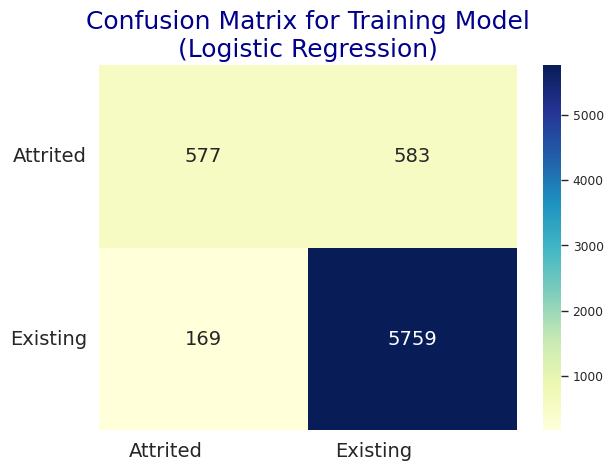

In [76]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [77]:
# Predict
y_test_pred_lr = lr.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test,y_test_pred_lr))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      0.45      0.56       467
           1       0.91      0.97      0.94      2572

    accuracy                           0.89      3039
   macro avg       0.82      0.71      0.75      3039
weighted avg       0.88      0.89      0.88      3039



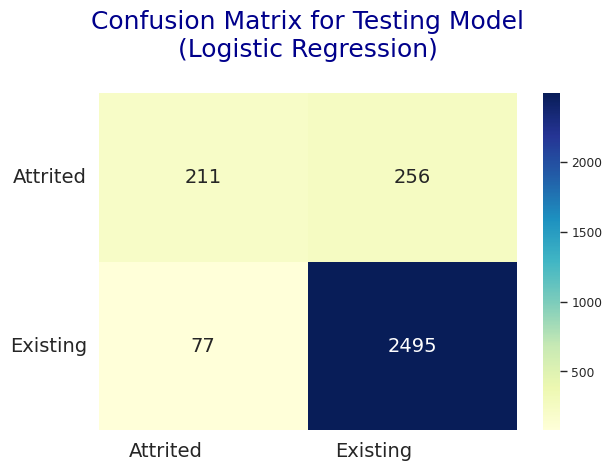

In [78]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_lr)),('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.2 Gaussian Naive Bayes (NB)**

In [79]:
# Train the model
nb = GaussianNB().fit(x_train, y_train)
print(nb)

GaussianNB()


In [80]:
# Predict (Training)
y_train_pred_nb = nb.predict(x_train)

# Print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_nb))

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1160
           1       0.92      0.94      0.93      5928

    accuracy                           0.88      7088
   macro avg       0.78      0.76      0.77      7088
weighted avg       0.88      0.88      0.88      7088



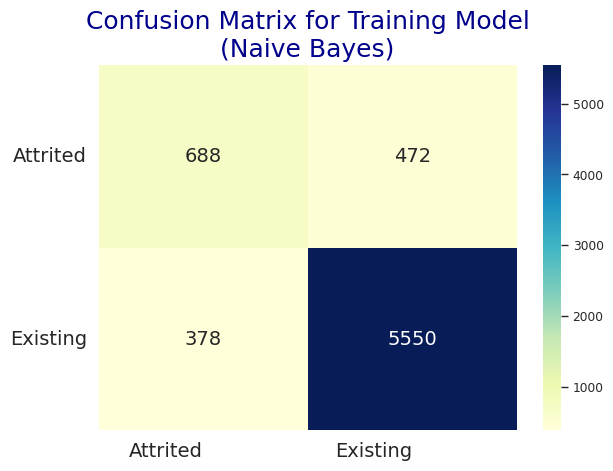

In [81]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_nb), ('Attrited','Existing'), ('Attrited', 'Existing'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Naive Bayes)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [82]:
# Predict (Test)
y_test_pred_nb = nb.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_nb))

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       467
           1       0.93      0.93      0.93      2572

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039



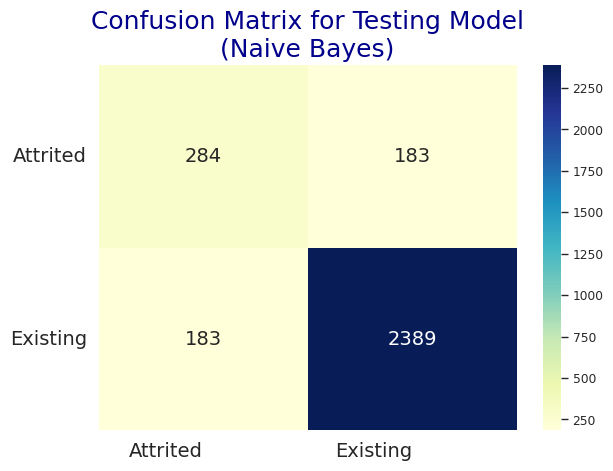

In [83]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_nb), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Naive Bayes)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.3 Decision Tree**

In [84]:
# Train the model
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5).fit(x_train, y_train)
print(dt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)


In [85]:
# Predict (Training)
y_train_pred_dt = dt.predict(x_train)

# Print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1160
           1       0.95      0.98      0.97      5928

    accuracy                           0.94      7088
   macro avg       0.92      0.87      0.89      7088
weighted avg       0.94      0.94      0.94      7088



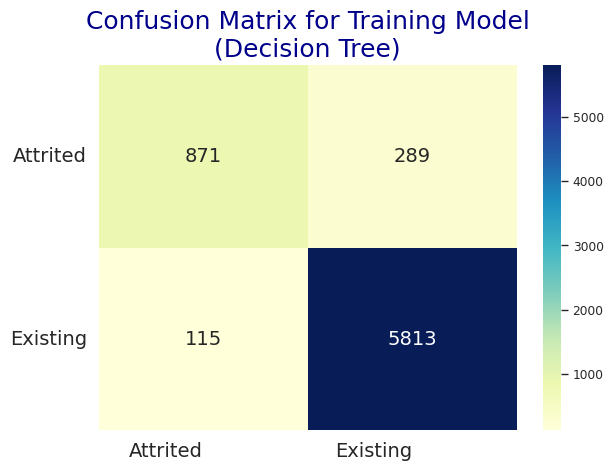

In [86]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_dt), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [87]:
# Predict (Test)
y_test_pred_dt = dt.predict(x_test)

# Print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       467
           1       0.95      0.97      0.96      2572

    accuracy                           0.93      3039
   macro avg       0.89      0.84      0.86      3039
weighted avg       0.93      0.93      0.93      3039



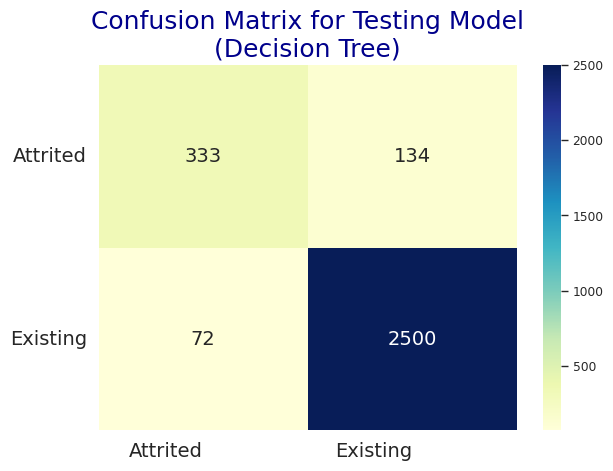

In [88]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_dt), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.4 Random Forest**

In [89]:
#Train the model
rdf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_split=10)
rdf.fit(x_train,y_train)
print(rdf)

RandomForestClassifier(max_depth=10, min_samples_split=10)


In [90]:
# Predict (Training)
y_train_pred_rdf = rdf.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train,y_train_pred_rdf))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1160
           1       0.97      0.99      0.98      5928

    accuracy                           0.97      7088
   macro avg       0.96      0.92      0.94      7088
weighted avg       0.97      0.97      0.97      7088



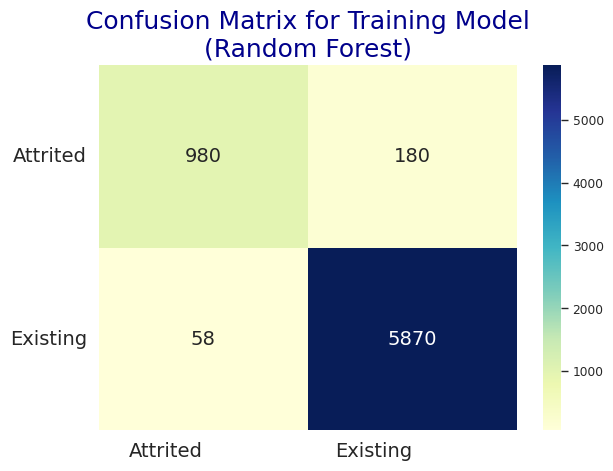

In [91]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_rdf)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [92]:
# Predict (Test)
y_test_pred_rdf = rdf.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test,y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       467
           1       0.96      0.97      0.97      2572

    accuracy                           0.94      3039
   macro avg       0.90      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



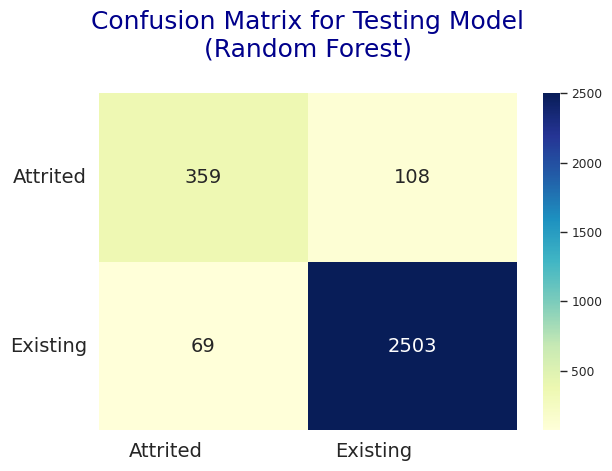

In [93]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_rdf)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.5 Gradient Boosting Classifier**

In [94]:
#Train the model
gbt = GradientBoostingClassifier(max_depth=5, subsample=0.8, n_estimators=100, random_state=42).fit(x_train,y_train)
print(gbt)

GradientBoostingClassifier(max_depth=5, random_state=42, subsample=0.8)


In [95]:
# Predict (Training)
y_train_pred_gbt = gbt.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train,y_train_pred_gbt))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1160
           1       0.98      0.99      0.99      5928

    accuracy                           0.98      7088
   macro avg       0.97      0.95      0.96      7088
weighted avg       0.98      0.98      0.98      7088



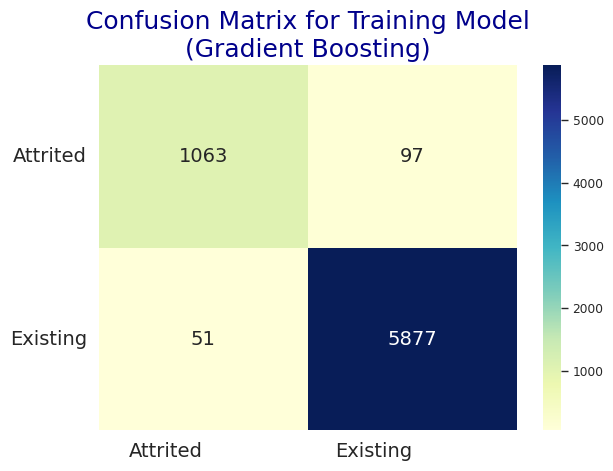

In [96]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_gbt)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [97]:
# Predict (Test)
y_test_pred_gbt = gbt.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test,y_test_pred_gbt))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       467
           1       0.97      0.97      0.97      2572

    accuracy                           0.95      3039
   macro avg       0.90      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



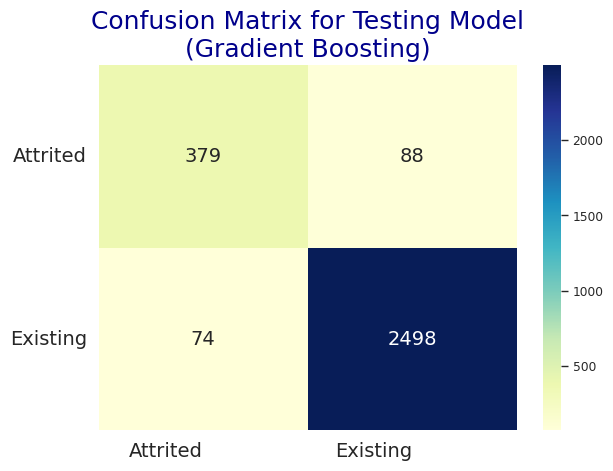

In [98]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_gbt)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.6 Support Vector Machine (SVM)**

In [99]:
# Train the SVM model
svm = SVC(C=1.0, kernel='rbf').fit(x_train, y_train)
print(svm)

SVC()


In [100]:
# Predict (Training)
y_train_pred_svm = svm.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (SVM):')
print(classification_report(y_train, y_train_pred_svm))

Classification Report Training Model (SVM):
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1160
           1       0.93      0.98      0.96      5928

    accuracy                           0.92      7088
   macro avg       0.90      0.82      0.85      7088
weighted avg       0.92      0.92      0.92      7088



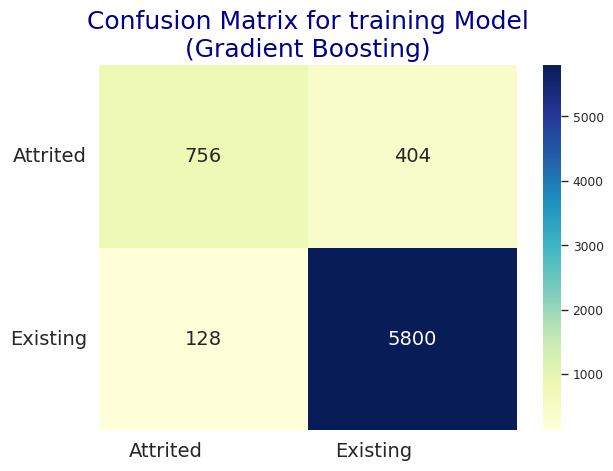

In [101]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_svm)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [102]:
# Predict (Test)
y_test_pred_svm = svm.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (SVM):')
print(classification_report(y_test, y_test_pred_svm))

Classification Report Testing Model (SVM):
              precision    recall  f1-score   support

           0       0.81      0.61      0.69       467
           1       0.93      0.97      0.95      2572

    accuracy                           0.92      3039
   macro avg       0.87      0.79      0.82      3039
weighted avg       0.91      0.92      0.91      3039



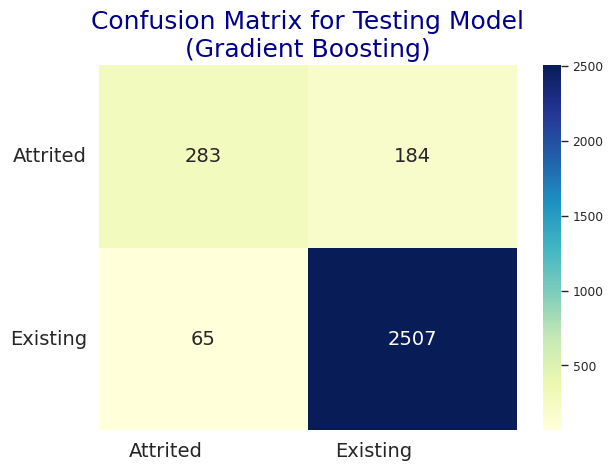

In [103]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_svm)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.7 K-Nearest Neighbors (KNN)**

In [104]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
print(knn)

KNeighborsClassifier(n_neighbors=10)


In [105]:
# Predict (Training)
y_train_pred_knn = knn.predict(x_train)

# Print classification report
print('Classification Report Training Model (KNN):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (KNN):
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1160
           1       0.95      0.97      0.96      5928

    accuracy                           0.93      7088
   macro avg       0.90      0.84      0.87      7088
weighted avg       0.93      0.93      0.93      7088



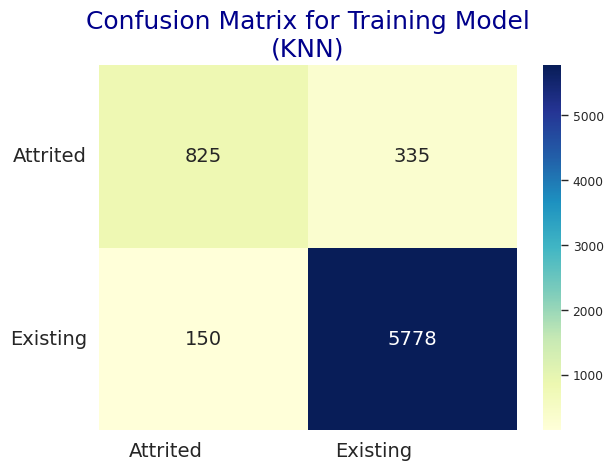

In [106]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_knn), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(KNN)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [107]:
# Predict (Test)
y_test_pred_knn = knn.predict(x_test)

# Print classification report
print('Classification Report Testing Model (KNN):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (KNN):
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       467
           1       0.94      0.96      0.95      2572

    accuracy                           0.91      3039
   macro avg       0.85      0.81      0.83      3039
weighted avg       0.91      0.91      0.91      3039



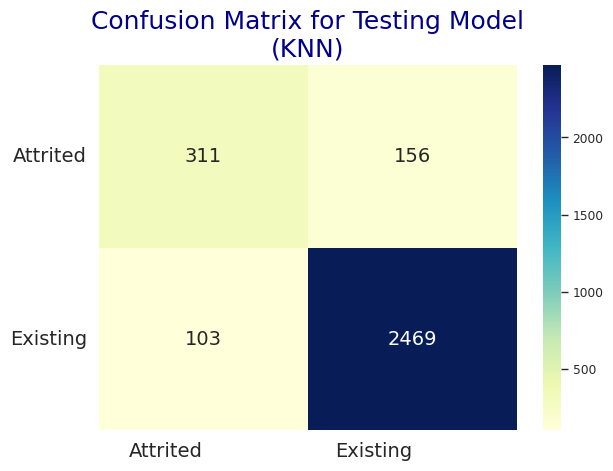

In [108]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_knn), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNN)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.8 XGBoost Classifier**

In [109]:
# Train the XGBoost model
xgb = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, random_state=42).fit(x_train, y_train)
print(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [110]:
# Predict (Training)
y_train_pred_xgb = xgb.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_train, y_train_pred_xgb))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1160
           1       0.98      0.99      0.99      5928

    accuracy                           0.98      7088
   macro avg       0.96      0.95      0.95      7088
weighted avg       0.98      0.98      0.98      7088



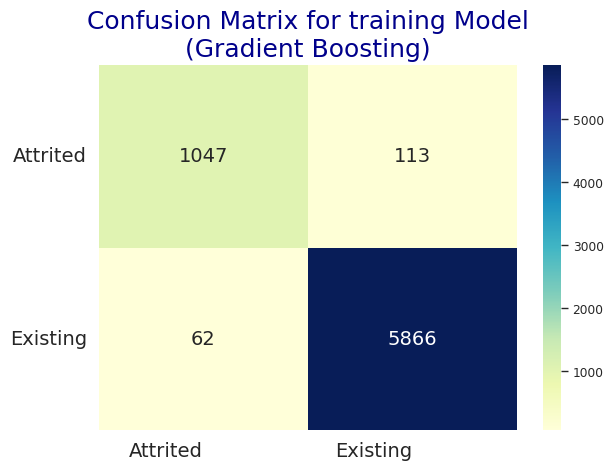

In [111]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_xgb)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [112]:
# Predict (Test)
y_test_pred_xgb = xgb.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (XGBoost):')
print(classification_report(y_test, y_test_pred_xgb))

Classification Report Testing Model (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       467
           1       0.97      0.97      0.97      2572

    accuracy                           0.95      3039
   macro avg       0.90      0.89      0.89      3039
weighted avg       0.94      0.95      0.94      3039



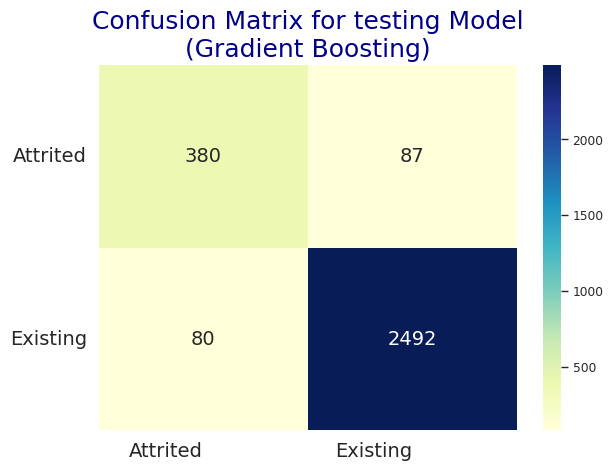

In [113]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred_xgb)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.9 Neural Network (MLP Classifier)**

In [114]:
# Train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), early_stopping=True, max_iter=500, alpha=0.01).fit(x_train, y_train)
print(mlp)

MLPClassifier(alpha=0.01, early_stopping=True, max_iter=500)


In [115]:
# Predict (Trainin)
y_train_pred_mlp = mlp.predict(x_train)
# Print classification report for training data
print('Classification Report Training Model (MLP):')
print(classification_report(y_train, y_train_pred_mlp))

Classification Report Training Model (MLP):
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1160
           1       0.93      0.97      0.95      5928

    accuracy                           0.92      7088
   macro avg       0.87      0.81      0.84      7088
weighted avg       0.92      0.92      0.92      7088



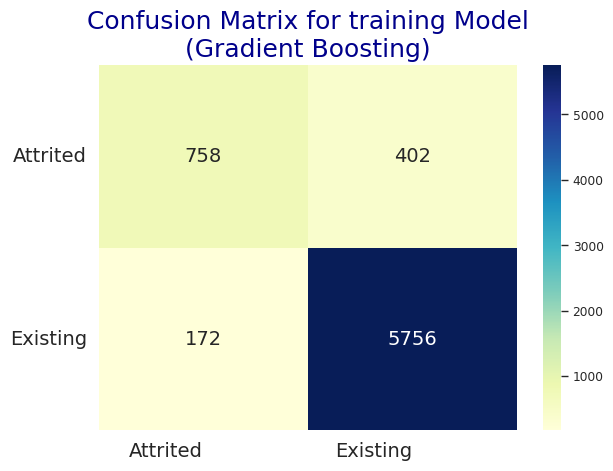

In [116]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred_mlp)), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [117]:
# Predict (Testing)
y_test_pred_mlp = mlp.predict(x_test)
# Print classification report for testing data
print('Classification Report Testing Model (MLP):')
print(classification_report(y_test, y_test_pred_mlp))

Classification Report Testing Model (MLP):
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       467
           1       0.93      0.97      0.95      2572

    accuracy                           0.91      3039
   macro avg       0.85      0.80      0.82      3039
weighted avg       0.91      0.91      0.91      3039



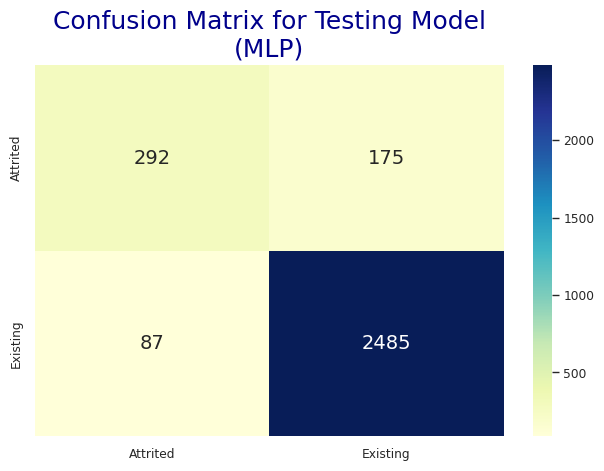

In [118]:
# Form confusion matrix for testing data
confusion_matrix_test_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_mlp), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix for testing data
plt.figure()
sns.heatmap(confusion_matrix_test_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Testing Model\n(MLP)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.10 Adaboost Classifier**

In [119]:
# Train the model
ab = AdaBoostClassifier(n_estimators=50, random_state=42).fit(x_train, y_train)
print(ab)

AdaBoostClassifier(random_state=42)


In [120]:
# Predict (Training)
y_train_pred_ab = ab.predict(x_train)

# Print classification report
print('Classification Report Training Model (AdaBoost):')
print(classification_report(y_train, y_train_pred_ab))

Classification Report Training Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1160
           1       0.95      0.98      0.96      5928

    accuracy                           0.94      7088
   macro avg       0.91      0.86      0.88      7088
weighted avg       0.94      0.94      0.94      7088



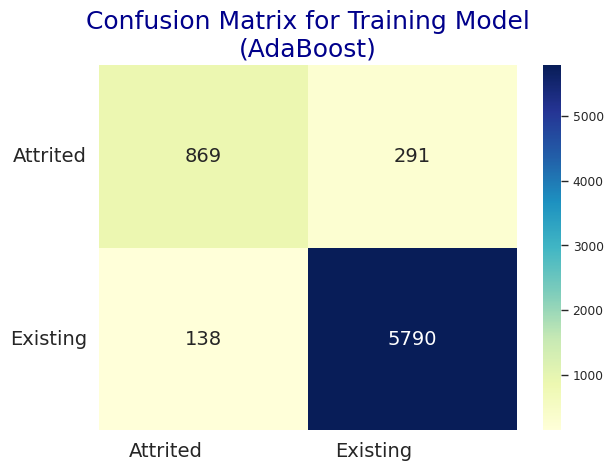

In [121]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_ab), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(AdaBoost)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [122]:
# Predict (Test)
y_test_pred_ab = ab.predict(x_test)

# Print classification report
print('Classification Report Testing Model (AdaBoost):')
print(classification_report(y_test, y_test_pred_ab))

Classification Report Testing Model (AdaBoost):
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       467
           1       0.95      0.97      0.96      2572

    accuracy                           0.93      3039
   macro avg       0.88      0.85      0.86      3039
weighted avg       0.93      0.93      0.93      3039



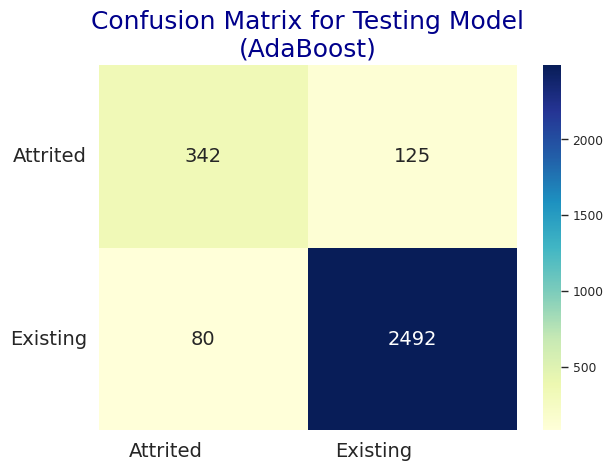

In [123]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_ab), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(AdaBoost)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.11 LightGBM Classifier**

In [124]:
# Train the model
lgbm = lgb.LGBMClassifier(max_depth=10, num_leaves=31, min_data_in_leaf=20, random_state=42).fit(x_train, y_train)
print(lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 5928, number of negative: 1160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 7088, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.836343 -> initscore=1.631267
[LightGBM] [Info] Start training from score 1.631267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMClassifier(max_depth=10, min_data_in_leaf=20, random_state=42)


In [125]:
# Predict (Training)
y_train_pred_lgbm = lgbm.predict(x_train)

# Print classification report
print('Classification Report Training Model (LightGBM):')
print(classification_report(y_train, y_train_pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Classification Report Training Model (LightGBM):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1160
           1       0.99      0.99      0.99      5928

    accuracy                           0.99      7088
   macro avg       0.98      0.97      0.98      7088
weighted avg       0.99      0.99      0.99      7088



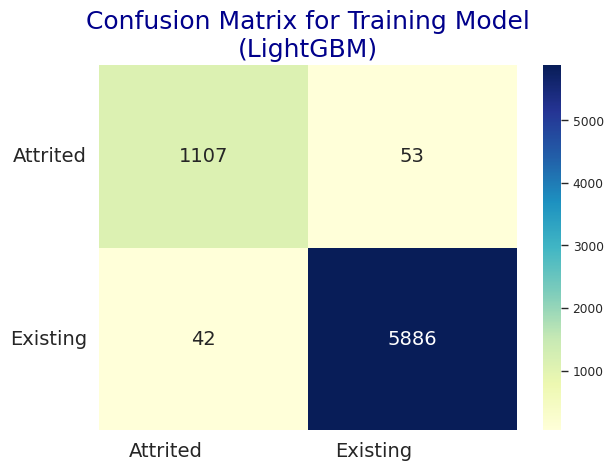

In [126]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_lgbm), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(LightGBM)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [127]:
# Predict (Test)
y_test_pred_lgbm = lgbm.predict(x_test)

# Print classification report
print('Classification Report Testing Model (LightGBM):')
print(classification_report(y_test, y_test_pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Classification Report Testing Model (LightGBM):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       467
           1       0.97      0.97      0.97      2572

    accuracy                           0.95      3039
   macro avg       0.90      0.90      0.90      3039
weighted avg       0.95      0.95      0.95      3039



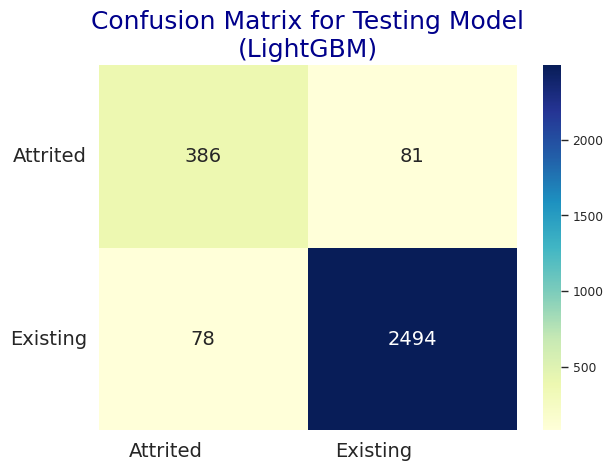

In [128]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_lgbm), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(LightGBM)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

## **5.12 Catboost Classifier**

In [129]:
# Train the model
cat = CatBoostClassifier(iterations=500, depth=6, l2_leaf_reg=3).fit(x_train, y_train)
print(cat)

0:	learn: 0.6521040	total: 50.4ms	remaining: 25.1s
1:	learn: 0.6169111	total: 54.2ms	remaining: 13.5s
2:	learn: 0.5846435	total: 58ms	remaining: 9.61s
3:	learn: 0.5495253	total: 61.3ms	remaining: 7.6s
4:	learn: 0.5272354	total: 64.8ms	remaining: 6.41s
5:	learn: 0.5000351	total: 68.3ms	remaining: 5.62s
6:	learn: 0.4697960	total: 71.8ms	remaining: 5.06s
7:	learn: 0.4498344	total: 75.2ms	remaining: 4.63s
8:	learn: 0.4326341	total: 78.9ms	remaining: 4.31s
9:	learn: 0.4164092	total: 82.1ms	remaining: 4.02s
10:	learn: 0.3947771	total: 85.3ms	remaining: 3.79s
11:	learn: 0.3751334	total: 88.9ms	remaining: 3.61s
12:	learn: 0.3624260	total: 92.5ms	remaining: 3.46s
13:	learn: 0.3508726	total: 96ms	remaining: 3.33s
14:	learn: 0.3381237	total: 99.2ms	remaining: 3.21s
15:	learn: 0.3290724	total: 103ms	remaining: 3.11s
16:	learn: 0.3163441	total: 106ms	remaining: 3.02s
17:	learn: 0.3066211	total: 109ms	remaining: 2.93s
18:	learn: 0.2997670	total: 113ms	remaining: 2.86s
19:	learn: 0.2900112	total: 117

In [130]:
# Predict (Training)
y_train_pred_cat = cat.predict(x_train)

# Print classification report
print('Classification Report Training Model (CatBoost):')
print(classification_report(y_train, y_train_pred_cat))

Classification Report Training Model (CatBoost):
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1160
           1       0.98      0.99      0.98      5928

    accuracy                           0.97      7088
   macro avg       0.96      0.94      0.95      7088
weighted avg       0.97      0.97      0.97      7088



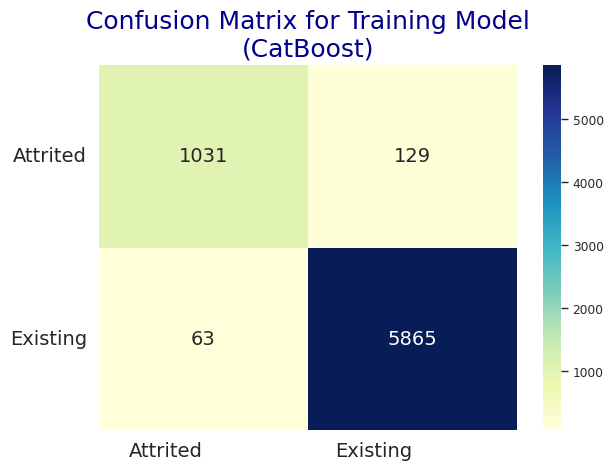

In [131]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred_cat), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(CatBoost)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

In [132]:
# Predict (Test)
y_test_pred_cat = cat.predict(x_test)

# Print classification report
print('Classification Report Testing Model (CatBoost):')
print(classification_report(y_test, y_test_pred_cat))

Classification Report Testing Model (CatBoost):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       467
           1       0.96      0.97      0.97      2572

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



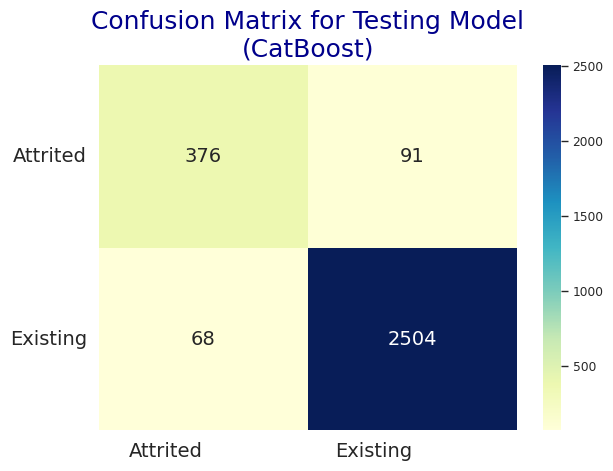

In [133]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred_cat), ('Attrited','Existing'), ('Attrited', 'Existing'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(CatBoost)', fontsize=18, color='darkblue')


plt.tight_layout()
plt.show()

# **Step 6: Model Selection**

In [134]:
print('To Prevent False Negative, Recall is the best Metrics to consider the Best Model')
print(' ')
# Define a dictionary containing the models and their predictions for training and testing
models = {
    "Gradient Boosting": (y_train_pred_gbt, y_test_pred_gbt),
    "Random Forest": (y_train_pred_rdf, y_test_pred_rdf),
    "Logistic Regression": (y_train_pred_lr, y_test_pred_lr),
    "Support Vector Machine (SVM)": (y_train_pred_svm, y_test_pred_svm),
    "K-Nearest Neighbors (KNN)": (y_train_pred_knn, y_test_pred_knn),
    "XGBoost Classifier": (y_train_pred_xgb, y_test_pred_xgb),
    "Neural Network (MLPClassifier)": (y_train_pred_mlp, y_test_pred_mlp),
    "Decision Tree": (y_train_pred_dt, y_test_pred_dt),
    "AdaBoost": (y_train_pred_ab, y_test_pred_ab),
    "LightGBM": (y_train_pred_lgbm, y_test_pred_lgbm),
    "Gaussian Naive Bayes (NB)": (y_train_pred_nb, y_test_pred_nb),
    "CatBoost": (y_train_pred_cat, y_test_pred_cat)
}

# Initialize a dictionary to store the recall results for each class (0 and 1)
recall_results = {
    "Model": [],
    "recall Train (Class 0)": [],
    "recall Train (Class 1)": [],
    "recall Test (Class 0)": [],
    "recall Test (Class 1)": []
}

# Loop through each model to compute the recall scores
for model_name, (train_pred, test_pred) in models.items():
    # Generate the classification report as a dictionary for training data
    report_train = classification_report(y_train, train_pred, output_dict=True)

    # Generate the classification report as a dictionary for testing data
    report_test = classification_report(y_test, test_pred, output_dict=True)

    # Extract the recall for class 0 and class 1 from the training report
    recall_train_class_0 = report_train['0']['recall']
    recall_train_class_1 = report_train['1']['recall']

    # Extract the recall for class 0 and class 1 from the testing report
    recall_test_class_0 = report_test['0']['recall']
    recall_test_class_1 = report_test['1']['recall']

    # Append the results to the recall_results dictionary
    recall_results["Model"].append(model_name)
    recall_results["recall Train (Class 0)"].append(recall_train_class_0)
    recall_results["recall Train (Class 1)"].append(recall_train_class_1)
    recall_results["recall Test (Class 0)"].append(recall_test_class_0)
    recall_results["recall Test (Class 1)"].append(recall_test_class_1)

# Convert the recall_results dictionary to a DataFrame
df_recall_results = pd.DataFrame(recall_results)
df_recall_results = df_recall_results.sort_values(by=['recall Test (Class 0)', 'recall Test (Class 1)'], ascending=False).reset_index(drop=True)

# Print the resulting DataFrame to display the recall scores for each model
df_recall_results

To Prevent False Negative, Recall is the best Metrics to consider the Best Model
 


,Model,recall Train (Class 0),recall Train (Class 1),recall Test (Class 0),recall Test (Class 1)
0,LightGBM,0.954310,0.992915,0.826552,0.969673
1,XGBoost Classifier,0.902586,0.989541,0.813704,0.968896
2,Gradient Boosting,0.916379,0.991397,0.811563,0.971229
3,CatBoost,0.888793,0.989372,0.805139,0.973561
4,Random Forest,0.844828,0.990216,0.768737,0.973173
5,AdaBoost,0.749138,0.976721,0.732334,0.968896
6,Decision Tree,0.750862,0.980601,0.713062,0.972006
7,K-Nearest Neighbors (KNN),0.711207,0.974696,0.665953,0.959953
8,Neural Network (MLPClassifier),0.653448,0.970985,0.625268,0.966174
9,Gaussian Naive Bayes (NB),0.593103,0.936235,0.608137,0.928849


**Model Selection Conclusion:**
<br>
Overfitting occurs if the Train Recall is much higher than the Test Recall, indicating that the model fits the training data too well but fails to generalize to the test data.

- `LightGBM`: 0.954 (Train) → 0.827 (Test) (gap = 0.127) ✅ (still reasonable)
- `XGBoost`: 0.903 → 0.814 (gap = 0.089) ✅ (good)
- `Gradient Boosting`: 0.916 → 0.812 (gap = 0.104) ✅ (fair)
- `CatBoost`: 0.889 → 0.805 (gap = 0.084) ✅ (good)
- `Random Forest`: 0.851 → 0.756 (gap = 0.095) ✅ (good)
- `AdaBoost`: 0.749 → 0.732 (gap = 0.017) 🔴 (underfitting)
- `Decision Tree`: 0.751 → 0.713 (gap = 0.038) 🔴 (underfitting)
- `KNN`: 0.711 → 0.666 (gap = 0.045) 🔴 (underfitting)
- `Neural Network`: 0.684 → 0.640 (gap = 0.044) 🔴 (underfitting)
- `Naive Bayes`: 0.593 → 0.608 (gap = -0.015) 🔴 (underfitting)
- `SVM`: 0.652 → 0.606 (gap = 0.046) 🔴 (underfitting)
- `Logistic Regression`: 0.497 → 0.452 (gap = 0.045) 🔴 (underfitting)

📌 Interim Conclusion:
- `LightGBM`, `XGBoost`, `Gradient Boosting`, `CatBoost`, and `Random Forest` are not overfitting and have good balance.
- `AdaBoost`, `Decision Tree`, `KNN`, `Neural Network`, `Naive Bayes`, `SVM`, and `Logistic Regression` tend to be underfitting, so they are not recommended.
<br>

✅ `LightGBM` is the best choice because:
- Has the highest Recall Test (Class 0) (0.827)
- Not overfitting (train-test gap = 0.127, still reasonable)
- Boosting-based models tend to be stronger in generalization.

🏆 Best runner-up:
- `XGBoost` (0.814, gap 0.089)
- `Gradient Boosting` (0.812, gap 0.104)
- `CatBoost` (0.805, gap 0.084)

If you want a more balanced model and more stable in generalization, you can choose `XGBoost` or `CatBoost`, as they have smaller train-test gaps.
Final Conclusion

# **Step 7: Prediction**

## **7.1 Load the Dataset**

In [135]:
# Save df into df_test
df_test = df.copy()

## **7.1 Data Cleaning**

### **Check Duplicate Values and Drop Unnecessary Column**

In [136]:
print('The number of duplication is:', df_test.duplicated().sum())
# There is no duplication

The number of duplication is: 0


In [137]:
# Drop unecessary column
df_test = df_test.drop(columns=['idstatus','Educationid','Maritalid','card_categoryid'])

df_test.head()

,CLIENTNUM,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1144,42,0.061
1,818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1291,33,0.105
2,713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,1887,20,0.000
3,769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1171,20,0.760
4,709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,816,28,0.000


In [138]:
# Inspect the Dataset after Dropped Certain Columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   status                    10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  int64  
 14  Total_

### **Check Null Values**

In [139]:
# Check for empty elements
print('Missing values status:', df_test.isnull().values.any())
df_null = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
df_null['Percentage'] = (df_null['Total Null Values']/df_test.shape[0])*100
df_null = df_null.sort_values(by=['Percentage'], ascending=False).reset_index()
df_null

Missing values status: False


,index,Total Null Values,Percentage
0,CLIENTNUM,0,0.0
1,Total_Relationship_Count,0,0.0
2,Total_Trans_Ct,0,0.0
3,Total_Trans_Amt,0,0.0
4,Avg_Open_To_Buy,0,0.0
5,Total_Revolving_Bal,0,0.0
6,Credit_Limit,0,0.0
7,Contacts_Count_12_mon,0,0.0
8,Months_Inactive_12_mon,0,0.0
9,Months_on_book,0,0.0


In [140]:
# Check the Dataset!
df_test.head()

,CLIENTNUM,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,Male,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1144,42,0.061
1,818770008,Existing Customer,49,Female,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1291,33,0.105
2,713982108,Existing Customer,51,Male,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,1887,20,0.000
3,769911858,Existing Customer,40,Female,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1171,20,0.760
4,709106358,Existing Customer,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,816,28,0.000


In [141]:
# Inspect the Dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   status                    10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  int64  
 14  Total_

## **7.3 Data Preprocessing**

### **Encoded Categorical Features**

In [142]:
#Convert all the non-numeric columns to numerical data types
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = LabelEncoder().fit_transform(df_test[col])

# Describe df_test After Encoded
df_test.describe()

,CLIENTNUM,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.938679,1162.814061,7469.124617,4404.086304,64.858695,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.788539,814.987335,9090.695763,3397.129254,23.472570,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [143]:
# Top 5 Rows of the Dataset after Encoded
df_test.head()

,CLIENTNUM,status,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691,777,11914,1144,42,0.061
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256,864,7392,1291,33,0.105
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418,0,3418,1887,20,0.000
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313,2517,796,1171,20,0.760
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716,0,4716,816,28,0.000


### **Standardize the Data**

In [144]:
pred_test = df_test.drop(columns='status')
pred_test.set_index('CLIENTNUM', inplace=True)
pred_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,
768805383,45,1,3,3,1,2,0,39,5,1,3,12691,777,11914,1144,42,0.061
818770008,49,0,5,2,2,4,0,44,6,1,2,8256,864,7392,1291,33,0.105
713982108,51,1,3,2,1,3,0,36,4,1,0,3418,0,3418,1887,20,0.000
769911858,40,0,4,3,3,4,0,34,3,4,1,3313,2517,796,1171,20,0.760
709106358,40,1,3,5,1,2,0,21,5,1,0,4716,0,4716,816,28,0.000


In [145]:
# Standardize the Data

# Function to fit the scaler
def fit_scaler(data: pd.DataFrame):
    """
    Fit a MinMaxScaler on the input data.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
        MinMaxScaler: The fitted scaler object.
    """
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler: MinMaxScaler):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
        data (pd.DataFrame): The input DataFrame with numerical columns.
        scaler (StandardScaler): The fitted scaler object.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [146]:
# Fit the scaler! (pred_test)
scaler = fit_scaler(pred_test)

# Transform the scaler
pred_test = transform_scaler(pred_test, scaler)

In [147]:
# Describe pred_test!
pred_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,0.432467,0.170571,0.0,0.319149,0.425532,0.553191,1.0
Gender,10127.0,0.470919,0.499178,0.0,0.000000,0.000000,1.000000,1.0
Dependent_count,10127.0,0.469241,0.259782,0.0,0.200000,0.400000,0.600000,1.0
Education_Level,10127.0,0.516096,0.305802,0.0,0.333333,0.500000,0.833333,1.0
Marital_Status,10127.0,0.487805,0.245936,0.0,0.333333,0.333333,0.666667,1.0
Income_Category,10127.0,0.572786,0.300940,0.0,0.400000,0.600000,0.800000,1.0
Card_Category,10127.0,0.059939,0.231013,0.0,0.000000,0.000000,0.000000,1.0
Months_on_book,10127.0,0.533219,0.185731,0.0,0.418605,0.534884,0.627907,1.0
Total_Relationship_Count,10127.0,0.562516,0.310882,0.0,0.400000,0.600000,0.800000,1.0
Months_Inactive_12_mon,10127.0,0.390195,0.168437,0.0,0.333333,0.333333,0.500000,1.0


In [148]:
# The Data Test after Standardize the Values
pred_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,
768805383,0.404255,1.0,0.6,0.500000,0.333333,0.4,0.0,0.604651,0.8,0.166667,0.500000,0.340196,0.308701,0.345116,0.035273,0.248062,0.061061
818770008,0.489362,0.0,1.0,0.333333,0.666667,0.8,0.0,0.720930,1.0,0.166667,0.333333,0.206119,0.343266,0.214093,0.043452,0.178295,0.105105
713982108,0.531915,1.0,0.6,0.333333,0.333333,0.6,0.0,0.534884,0.6,0.166667,0.000000,0.059859,0.000000,0.098948,0.076611,0.077519,0.000000
769911858,0.297872,0.0,0.8,0.500000,1.000000,0.8,0.0,0.488372,0.4,0.666667,0.166667,0.056684,1.000000,0.022977,0.036775,0.077519,0.760761
709106358,0.297872,1.0,0.6,0.833333,0.333333,0.4,0.0,0.186047,0.8,0.166667,0.000000,0.099099,0.000000,0.136557,0.017025,0.139535,0.000000


In [149]:
# Inspect the Data Test!
pred_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  float64
 1   Gender                    10127 non-null  float64
 2   Dependent_count           10127 non-null  float64
 3   Education_Level           10127 non-null  float64
 4   Marital_Status            10127 non-null  float64
 5   Income_Category           10127 non-null  float64
 6   Card_Category             10127 non-null  float64
 7   Months_on_book            10127 non-null  float64
 8   Total_Relationship_Count  10127 non-null  float64
 9   Months_Inactive_12_mon    10127 non-null  float64
 10  Contacts_Count_12_mon     10127 non-null  float64
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  float64
 13  Avg_Open_To_Buy           10127 non-null  float64
 14 

### **Feature Selection**

In [150]:
# Features Selection with Chi-Square
# Normalize data (Chi-Square requires non-negative values, so ensure all features are positive)
scaler = MinMaxScaler()
pred_test_scaled = scaler.fit_transform(pred_test)

# Perform feature selection using SelectKBest and Chi-Square
selector = SelectKBest(score_func=chi2, k=8)  # Select the top 8 best features
pred_test_new = selector.fit_transform(pred_test_scaled, y)

# Get the mask of selected features (True for selected, False for unselected)
selected_features_mask = selector.get_support()

# Retrieve the names of the selected features
selected_features_names = pred_test.columns[selected_features_mask]

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({
    'Feature': pred_test.columns,  # Original feature names
    'Score': selector.scores_  # Chi-Square scores
})

# Display feature scores sorted in descending order
print("Feature Scores:")
print(feature_scores_df.sort_values(by='Score', ascending=False))

# Display the names of the selected features
print("\nSelected Features:")
selected_features_names.tolist()

Feature Scores:
                     Feature       Score
12       Total_Revolving_Bal  159.012873
15            Total_Trans_Ct  108.746218
16     Avg_Utilization_Ratio   89.206097
14           Total_Trans_Amt   47.458997
8   Total_Relationship_Count   39.147656
10     Contacts_Count_12_mon   35.173241
9     Months_Inactive_12_mon   17.111187
1                     Gender    7.443223
11              Credit_Limit    2.003412
2            Dependent_count    0.525214
5            Income_Category    0.495034
4             Marital_Status    0.434252
6              Card_Category    0.328707
0               Customer_Age    0.225728
7             Months_on_book    0.122718
3            Education_Level    0.056539
13           Avg_Open_To_Buy    0.000265

Selected Features:


['Gender',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

In [151]:
# The Dataset after Feature Selection
pred_test = pred_test[selected_features_names]
pred_test.head()

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,
768805383,1.0,0.8,0.166667,0.500000,0.308701,0.035273,0.248062,0.061061
818770008,0.0,1.0,0.166667,0.333333,0.343266,0.043452,0.178295,0.105105
713982108,1.0,0.6,0.166667,0.000000,0.000000,0.076611,0.077519,0.000000
769911858,0.0,0.4,0.666667,0.166667,1.000000,0.036775,0.077519,0.760761
709106358,1.0,0.8,0.166667,0.000000,0.000000,0.017025,0.139535,0.000000


In [152]:
# Inspect the Dataset after Feature Selection
pred_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    10127 non-null  float64
 1   Total_Relationship_Count  10127 non-null  float64
 2   Months_Inactive_12_mon    10127 non-null  float64
 3   Contacts_Count_12_mon     10127 non-null  float64
 4   Total_Revolving_Bal       10127 non-null  float64
 5   Total_Trans_Amt           10127 non-null  float64
 6   Total_Trans_Ct            10127 non-null  float64
 7   Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(8)
memory usage: 712.1 KB


## **7.4 Prediction (Model Algorithm 1)**

In [153]:
# lets predict!
predict = pd.Series(lgbm.predict(pred_test), name = 'Status Prediction').astype(int)
results = pd.concat([df_test['CLIENTNUM'], predict], axis=1)
results = pd.merge(df, results, on='CLIENTNUM', how='left')

results.head()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


,CLIENTNUM,idstatus,status,Customer_Age,Gender,Dependent_count,Educationid,Education_Level,Maritalid,Marital_Status,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Status Prediction
0,768805383,1,Existing Customer,45,Male,3,1,High School,1,Married,...,5,1,3,12691,777,11914,1144,42,0.061,1
1,818770008,1,Existing Customer,49,Female,5,2,Graduate,2,Single,...,6,1,2,8256,864,7392,1291,33,0.105,1
2,713982108,1,Existing Customer,51,Male,3,2,Graduate,1,Married,...,4,1,0,3418,0,3418,1887,20,0.000,1
3,769911858,1,Existing Customer,40,Female,4,1,High School,3,Unknown,...,3,4,1,3313,2517,796,1171,20,0.760,1
4,709106358,1,Existing Customer,40,Male,3,3,Uneducated,1,Married,...,5,1,0,4716,0,4716,816,28,0.000,0


In [154]:
# Check True Positive
true_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of True Positive: {len(true_positive)}')
print(f'Number of Total Transfer Amount Loss: ${true_positive.Total_Trans_Amt.sum()}')

Number of True Positive: 8379
Number of Total Transfer Amount Loss: $39259330


In [155]:
# Check True Negative
true_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of True Negative: {len(true_negative)}')
print(f'Potential Total Transfer Amount: ${true_negative.Total_Trans_Amt.sum()}')

Number of True Negative: 1441
Potential Total Transfer Amount: $4513080


In [156]:
# Check False Positive
false_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of False Positive: {len(false_positive)}')
print(f'Number of Total Transfer Amount Loss: ${false_positive.Total_Trans_Amt.sum()}')

Number of False Positive: 121
Number of Total Transfer Amount Loss: $305245


In [157]:
# Check False Negative
false_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of False Negative: {len(false_negative)}')
print(f'Number of Total Transfer Amount Loss: ${false_negative.Total_Trans_Amt.sum()}')

Number of False Negative: 186
Number of Total Transfer Amount Loss: $522527


In [158]:
# Summarize Predicted Result!
results_summary = results.groupby('Status Prediction').agg(customer_cnt=('CLIENTNUM','count')).reset_index()
results_summary['Status Meaning'] = ['Attrited Customer','Existing Customer']
results_summary = results_summary[['Status Prediction','Status Meaning','customer_cnt']]
print('Status Customer after predicted :')
results_summary

Status Customer after predicted :


,Status Prediction,Status Meaning,customer_cnt
0,0,Attrited Customer,1562
1,1,Existing Customer,8565


### **Prediction Result**

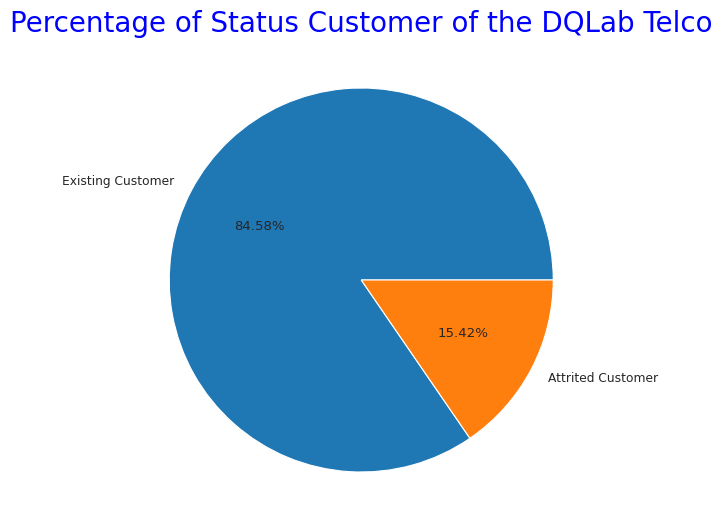

In [159]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Existing Customer','Attrited Customer']
Status = results['Status Prediction'].value_counts()
ax.pie(Status, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Status Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

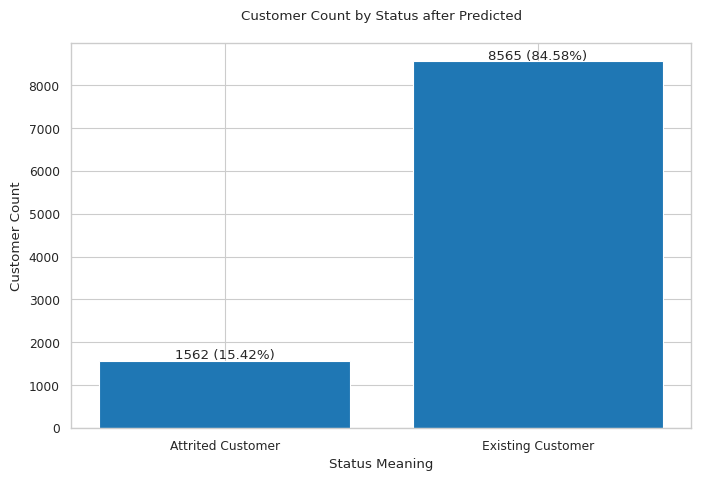

In [160]:
# Calculate percentages
total_customers = sum(results_summary['customer_cnt'])
percentages = [cnt / total_customers * 100 for cnt in results_summary['customer_cnt']]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_summary['Status Meaning'], results_summary['customer_cnt'])

# Annotate each bar with the number and percentage
for bar, count, percentage in zip(bars, results_summary['customer_cnt'], percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{count} ({percentage:.2f}%)', ha='center')

plt.xlabel('Status Meaning')
plt.ylabel('Customer Count')
plt.title('Customer Count by Status after Predicted\n')
plt.show()

## **7.5 Prediction (Model Algorithm 2)**

In [161]:
# lets predict!
predict = pd.Series(gbt.predict(pred_test), name = 'Status Prediction').astype(int)
results = pd.concat([df_test['CLIENTNUM'], predict], axis=1)
results = pd.merge(df, results, on='CLIENTNUM', how='left')

results.head()

,CLIENTNUM,idstatus,status,Customer_Age,Gender,Dependent_count,Educationid,Education_Level,Maritalid,Marital_Status,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Status Prediction
0,768805383,1,Existing Customer,45,Male,3,1,High School,1,Married,...,5,1,3,12691,777,11914,1144,42,0.061,1
1,818770008,1,Existing Customer,49,Female,5,2,Graduate,2,Single,...,6,1,2,8256,864,7392,1291,33,0.105,1
2,713982108,1,Existing Customer,51,Male,3,2,Graduate,1,Married,...,4,1,0,3418,0,3418,1887,20,0.000,1
3,769911858,1,Existing Customer,40,Female,4,1,High School,3,Unknown,...,3,4,1,3313,2517,796,1171,20,0.760,0
4,709106358,1,Existing Customer,40,Male,3,3,Uneducated,1,Married,...,5,1,0,4716,0,4716,816,28,0.000,0


In [162]:
# Check True Positive
true_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of True Positive: {len(true_positive)}')
print(f'Number of Total Transfer Amount Loss: ${true_positive.Total_Trans_Amt.sum()}')

Number of True Positive: 8359
Number of Total Transfer Amount Loss: $39214672


In [163]:
# Check True Negative
true_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of True Negative: {len(true_negative)}')
print(f'Potential Total Transfer Amount: ${true_negative.Total_Trans_Amt.sum()}')

Number of True Negative: 1389
Potential Total Transfer Amount: $4344701


In [164]:
# Check False Positive
false_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of False Positive: {len(false_positive)}')
print(f'Number of Total Transfer Amount Loss: ${false_positive.Total_Trans_Amt.sum()}')

Number of False Positive: 141
Number of Total Transfer Amount Loss: $349903


In [165]:
# Check False Negative
false_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of False Negative: {len(false_negative)}')
print(f'Number of Total Transfer Amount Loss: ${false_negative.Total_Trans_Amt.sum()}')

Number of False Negative: 238
Number of Total Transfer Amount Loss: $690906


### **Prediction Result**

In [166]:
# Summarize Predicted Result!
results_summary = results.groupby('Status Prediction').agg(customer_cnt=('CLIENTNUM','count')).reset_index()
results_summary['Status Meaning'] = ['Attrited Customer','Existing Customer']
results_summary = results_summary[['Status Prediction','Status Meaning','customer_cnt']]
print('Status Customer after predicted :')
results_summary

Status Customer after predicted :


,Status Prediction,Status Meaning,customer_cnt
0,0,Attrited Customer,1530
1,1,Existing Customer,8597


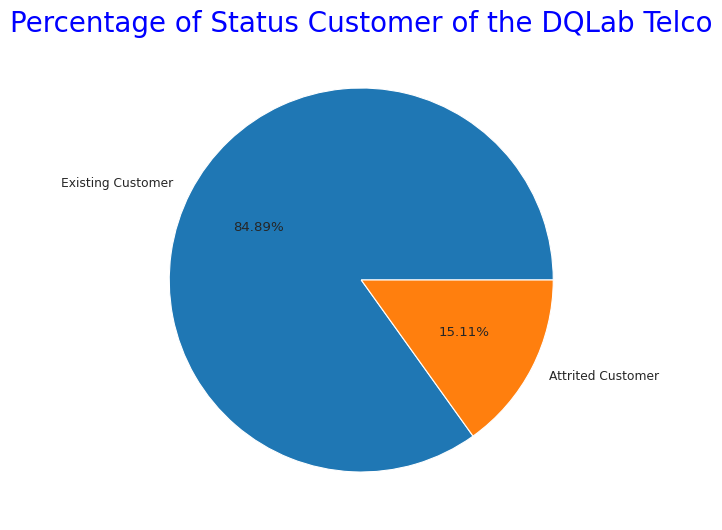

In [167]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Existing Customer','Attrited Customer']
Status = results['Status Prediction'].value_counts()
ax.pie(Status, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Status Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

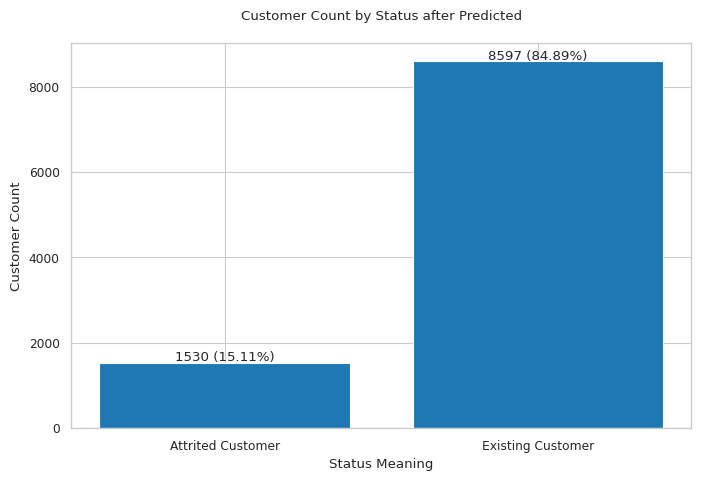

In [168]:
# Calculate percentages
total_customers = sum(results_summary['customer_cnt'])
percentages = [cnt / total_customers * 100 for cnt in results_summary['customer_cnt']]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_summary['Status Meaning'], results_summary['customer_cnt'])

# Annotate each bar with the number and percentage
for bar, count, percentage in zip(bars, results_summary['customer_cnt'], percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{count} ({percentage:.2f}%)', ha='center')

plt.xlabel('Status Meaning')
plt.ylabel('Customer Count')
plt.title('Customer Count by Status after Predicted\n')
plt.show()

## **7.6 Prediction (Model Algorithm 3)**

In [169]:
# lets predict!
predict = pd.Series(xgb.predict(pred_test), name = 'Status Prediction').astype(int)
results = pd.concat([df_test['CLIENTNUM'], predict], axis=1)
results = pd.merge(df, results, on='CLIENTNUM', how='left')

results.head()

,CLIENTNUM,idstatus,status,Customer_Age,Gender,Dependent_count,Educationid,Education_Level,Maritalid,Marital_Status,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Status Prediction
0,768805383,1,Existing Customer,45,Male,3,1,High School,1,Married,...,5,1,3,12691,777,11914,1144,42,0.061,1
1,818770008,1,Existing Customer,49,Female,5,2,Graduate,2,Single,...,6,1,2,8256,864,7392,1291,33,0.105,1
2,713982108,1,Existing Customer,51,Male,3,2,Graduate,1,Married,...,4,1,0,3418,0,3418,1887,20,0.000,1
3,769911858,1,Existing Customer,40,Female,4,1,High School,3,Unknown,...,3,4,1,3313,2517,796,1171,20,0.760,1
4,709106358,1,Existing Customer,40,Male,3,3,Uneducated,1,Married,...,5,1,0,4716,0,4716,816,28,0.000,0


In [170]:
# Check True Positive
true_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of True Positive: {len(true_positive)}')
print(f'Number of Total Transfer Amount Loss: ${true_positive.Total_Trans_Amt.sum()}')

Number of True Positive: 8366
Number of Total Transfer Amount Loss: $39239230


In [171]:
# Check True Negative
true_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of True Negative: {len(true_negative)}')
print(f'Potential Total Transfer Amount: ${true_negative.Total_Trans_Amt.sum()}')

Number of True Negative: 1388
Potential Total Transfer Amount: $4370308


In [172]:
# Check False Positive
false_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of False Positive: {len(false_positive)}')
print(f'Number of Total Transfer Amount Loss: ${false_positive.Total_Trans_Amt.sum()}')

Number of False Positive: 134
Number of Total Transfer Amount Loss: $325345


In [173]:
# Check False Negative
false_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of False Negative: {len(false_negative)}')
print(f'Number of Total Transfer Amount Loss: ${false_negative.Total_Trans_Amt.sum()}')

Number of False Negative: 239
Number of Total Transfer Amount Loss: $665299


In [174]:
# Summarize Predicted Result!
results_summary = results.groupby('Status Prediction').agg(customer_cnt=('CLIENTNUM','count')).reset_index()
results_summary['Status Meaning'] = ['Attrited Customer','Existing Customer']
results_summary = results_summary[['Status Prediction','Status Meaning','customer_cnt']]
print('Status Customer after predicted :')
results_summary

Status Customer after predicted :


,Status Prediction,Status Meaning,customer_cnt
0,0,Attrited Customer,1522
1,1,Existing Customer,8605


### **Prediction Result**

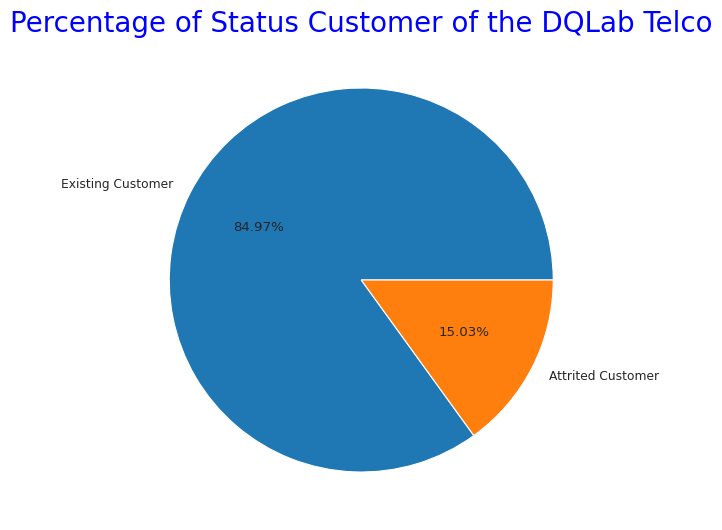

In [175]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Existing Customer','Attrited Customer']
Status = results['Status Prediction'].value_counts()
ax.pie(Status, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Status Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

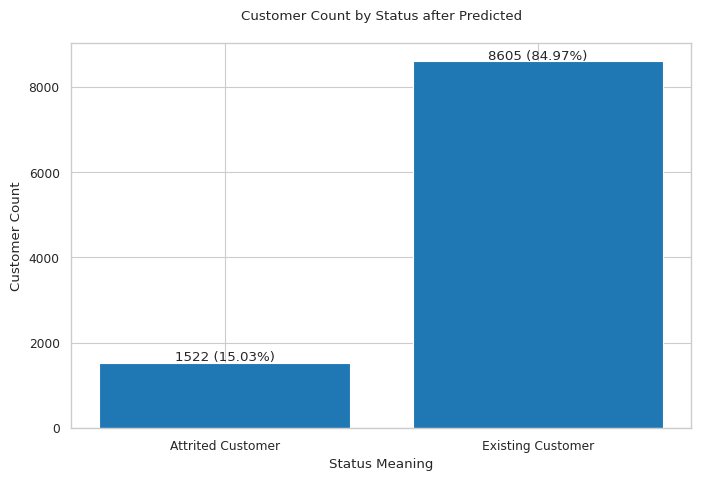

In [176]:
# Calculate percentages
total_customers = sum(results_summary['customer_cnt'])
percentages = [cnt / total_customers * 100 for cnt in results_summary['customer_cnt']]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_summary['Status Meaning'], results_summary['customer_cnt'])

# Annotate each bar with the number and percentage
for bar, count, percentage in zip(bars, results_summary['customer_cnt'], percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{count} ({percentage:.2f}%)', ha='center')

plt.xlabel('Status Meaning')
plt.ylabel('Customer Count')
plt.title('Customer Count by Status after Predicted\n')
plt.show()

## **7. Prediction (Model Algorithm 4)**

In [177]:
# lets predict!
predict = pd.Series(cat.predict(pred_test), name = 'Status Prediction').astype(int)
results = pd.concat([df_test['CLIENTNUM'], predict], axis=1)
results = pd.merge(df, results, on='CLIENTNUM', how='left')

results.head()

,CLIENTNUM,idstatus,status,Customer_Age,Gender,Dependent_count,Educationid,Education_Level,Maritalid,Marital_Status,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Status Prediction
0,768805383,1,Existing Customer,45,Male,3,1,High School,1,Married,...,5,1,3,12691,777,11914,1144,42,0.061,1
1,818770008,1,Existing Customer,49,Female,5,2,Graduate,2,Single,...,6,1,2,8256,864,7392,1291,33,0.105,1
2,713982108,1,Existing Customer,51,Male,3,2,Graduate,1,Married,...,4,1,0,3418,0,3418,1887,20,0.000,1
3,769911858,1,Existing Customer,40,Female,4,1,High School,3,Unknown,...,3,4,1,3313,2517,796,1171,20,0.760,1
4,709106358,1,Existing Customer,40,Male,3,3,Uneducated,1,Married,...,5,1,0,4716,0,4716,816,28,0.000,0


In [178]:
# Check True Positive
true_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of True Positive: {len(true_positive)}')
print(f'Number of Total Transfer Amount Loss: ${true_positive.Total_Trans_Amt.sum()}')

Number of True Positive: 8373
Number of Total Transfer Amount Loss: $39245064


In [179]:
# Check True Negative
true_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of True Negative: {len(true_negative)}')
print(f'Potential Total Transfer Amount: ${true_negative.Total_Trans_Amt.sum()}')

Number of True Negative: 1388
Potential Total Transfer Amount: $4362403


In [180]:
# Check False Positive
false_positive = results[(results['status']=='Existing Customer') & (results['Status Prediction']==0)].reset_index(drop=True)
print(f'Number of False Positive: {len(false_positive)}')
print(f'Number of Total Transfer Amount Loss: ${false_positive.Total_Trans_Amt.sum()}')

Number of False Positive: 127
Number of Total Transfer Amount Loss: $319511


In [181]:
# Check False Negative
false_negative = results[(results['status']=='Attrited Customer') & (results['Status Prediction']==1)].reset_index(drop=True)
print(f'Number of False Negative: {len(false_negative)}')
print(f'Number of Total Transfer Amount Loss: ${false_negative.Total_Trans_Amt.sum()}')

Number of False Negative: 239
Number of Total Transfer Amount Loss: $673204


In [182]:
# Summarize Predicted Result!
results_summary = results.groupby('Status Prediction').agg(customer_cnt=('CLIENTNUM','count')).reset_index()
results_summary['Status Meaning'] = ['Attrited Customer','Existing Customer']
results_summary = results_summary[['Status Prediction','Status Meaning','customer_cnt']]
print('Status Customer after predicted :')
results_summary

Status Customer after predicted :


,Status Prediction,Status Meaning,customer_cnt
0,0,Attrited Customer,1515
1,1,Existing Customer,8612


### **Prediction Result**

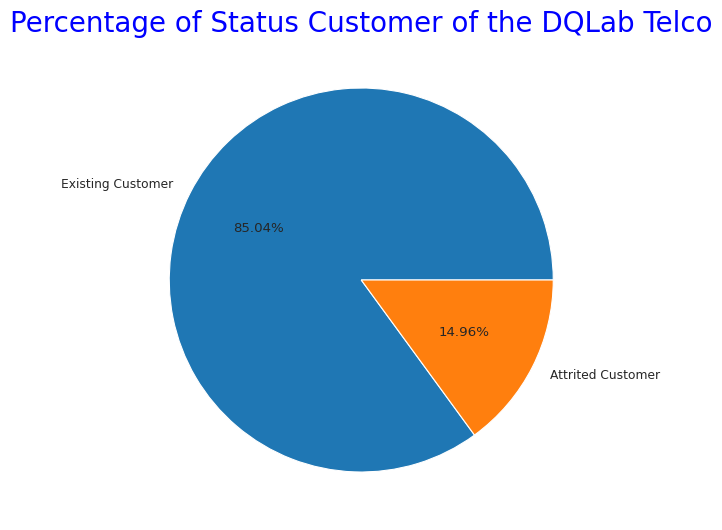

In [183]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Existing Customer','Attrited Customer']
Status = results['Status Prediction'].value_counts()
ax.pie(Status, labels=labels, autopct= '%.2f%%')
plt.title(label = 'Percentage of Status Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

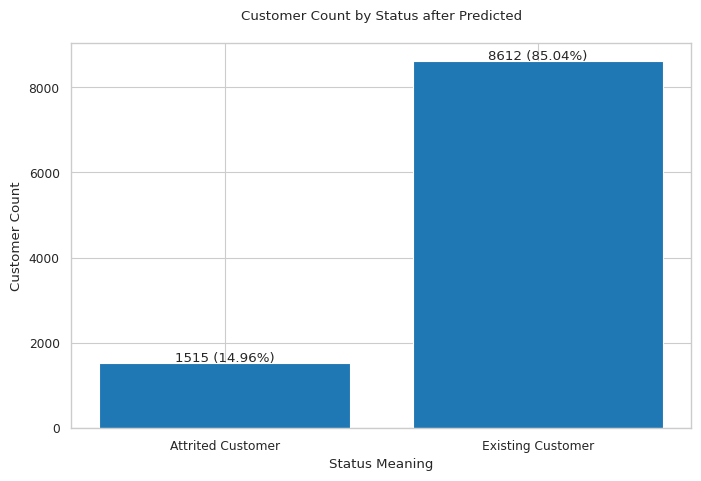

In [184]:
# Calculate percentages
total_customers = sum(results_summary['customer_cnt'])
percentages = [cnt / total_customers * 100 for cnt in results_summary['customer_cnt']]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_summary['Status Meaning'], results_summary['customer_cnt'])

# Annotate each bar with the number and percentage
for bar, count, percentage in zip(bars, results_summary['customer_cnt'], percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{count} ({percentage:.2f}%)', ha='center')

plt.xlabel('Status Meaning')
plt.ylabel('Customer Count')
plt.title('Customer Count by Status after Predicted\n')
plt.show()